# Machine Learning Project, 2021/2022
## Part 2 - Classification
### First problem

# Table of contents
1. [Multilayer Perceptrons](#MLP)

   1.2. [Multilayer Perceptrons weighted](#MLPweight)
   
   1.3. [Multilayer Perceptrons Focal Loss](#MLPloss) 
   

   
   
2. [Convolutional Neural Networks](#CNN)


3. [Kmeans Clustering](#Kmeans)

In [78]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import HuberRegressor, LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers.experimental import preprocessing

from tensorflow import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, Dropout
#from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split


In [79]:
# Load the training set and the test set
X_train = np.load("Xtrain_Classification_Part1.npy")
print("X train dimensions = ", np.shape(X_train))
Y_train = np.load("Ytrain_Classification_Part1.npy")
print("Y train dimensions = ", np.shape(Y_train))
X_test = np.load("Xtest_Classification_Part1.npy")
print("X test dimensions = ", np.shape(X_test))

X train dimensions =  (6470, 2500)
Y train dimensions =  (6470,)
X test dimensions =  (1164, 2500)


In [80]:
X_test_n = X_test / 255.0

Classified as:  1.0


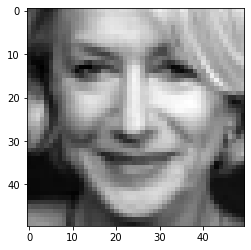

Classified as:  1.0


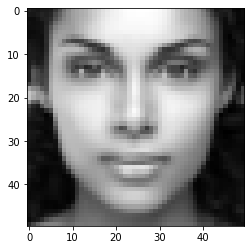

Classified as:  0.0


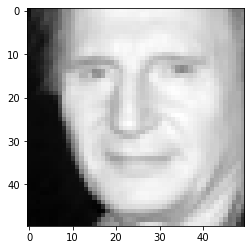

Classified as:  0.0


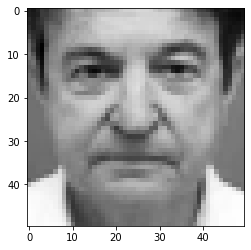

In [81]:
# Show image i
image_list = [0, 1, 2, 3]
for i in image_list:
    print("Classified as: ", Y_train[i])
    image = X_train[i,:]
    image = image.reshape(50, 50)
    plt.imshow(image, cmap='gray')
    plt.show()

In [82]:
print("No women samples = ", (Y_train == 1.0).sum(), " ", (Y_train == 1.0).sum()/len(Y_train), "%")
print("No men samples = ", (Y_train == 0.0).sum(), " ", (Y_train == 0.0).sum()/len(Y_train), "%")

No women samples =  3701   0.5720247295208656 %
No men samples =  2769   0.4279752704791345 %


In [83]:
def cross_validation(X_train, Y_train, i):
    
    n = np.shape(X_train)[0]
    n_folds = 10
    
    x_training_set = np.delete(X_train, list(range(i*int(n/n_folds),(i+1)*int(n/n_folds))), axis = 0)   # Delete the testing fold
    y_training_set = np.delete(Y_train, list(range(i*int(n/n_folds),(i+1)*int(n/n_folds))))

    x_testing_set = X_train[i*int(n/n_folds):(i+1)*int(n/n_folds) , : ]    # Consider only the testing fold
    y_testing_set = Y_train[i*int(n/n_folds):(i+1)*int(n/n_folds)]
    
    return x_training_set, y_training_set, x_testing_set, y_testing_set

In [84]:
def onehotencoding(data):
    
    X = np.zeros((len(data), 2))
    for i in range(len(data)):
        X[i,:] = [1, 0] if data[i]==0 else [0, 1]
    
    return (X)

## 1) Multilayer Perceptrons <a name="MLP"></a>

In [85]:
def model_NN (model, epochs, patience, ):
    
    class_names = ['Male', 'Female']

    # Normalize the dataset
    X_train_n = X_train / 255.0

    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train_n, Y_train, 0)
    
    # Convert labels into one-hot-encoding format
    y_training_set = onehotencoding(y_training_set)
    y_testing_set = onehotencoding(y_testing_set)

    # Define patience
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=patience, restore_best_weights=True)
    
    model.compile(optimizer='sgd',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])

    history = model.fit(x_training_set, y_training_set, epochs=epochs, callbacks=[callback], validation_data=(x_testing_set, y_testing_set))

    test_loss, test_acc = model.evaluate(x_testing_set,  y_testing_set, verbose=1)

    print('\nTest accuracy:', test_acc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(history.history['categorical_accuracy'], label='train')
    plt.plot(history.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 100])
    plt.legend()
    plt.show()
    
    return test_acc

Epoch 1/100
182/182 [==============================] - 1s 6ms/step - loss: 0.6228 - categorical_accuracy: 0.6584 - val_loss: 0.5740 - val_categorical_accuracy: 0.6708
Epoch 2/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5606 - categorical_accuracy: 0.7060 - val_loss: 0.5535 - val_categorical_accuracy: 0.7311
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5344 - categorical_accuracy: 0.7252 - val_loss: 0.5203 - val_categorical_accuracy: 0.7465
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5102 - categorical_accuracy: 0.7470 - val_loss: 0.5498 - val_categorical_accuracy: 0.6770
Epoch 5/100
182/182 [==============================] - 1s 5ms/step - loss: 0.4882 - categorical_accuracy: 0.7604 - val_loss: 0.5966 - val_categorical_accuracy: 0.6631
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 0.4697 - categorical_accuracy: 0.7702 - val_loss: 0.5967 - val_categorical_accuracy: 0.690

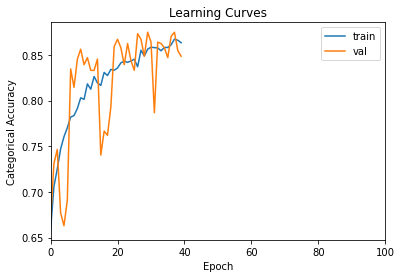

Epoch 1/100
182/182 [==============================] - 1s 4ms/step - loss: 0.6115 - categorical_accuracy: 0.6540 - val_loss: 0.5713 - val_categorical_accuracy: 0.7048
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5573 - categorical_accuracy: 0.7086 - val_loss: 0.5718 - val_categorical_accuracy: 0.6955
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5371 - categorical_accuracy: 0.7142 - val_loss: 0.4943 - val_categorical_accuracy: 0.7543
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5099 - categorical_accuracy: 0.7472 - val_loss: 0.4661 - val_categorical_accuracy: 0.7944
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4882 - categorical_accuracy: 0.7611 - val_loss: 0.4579 - val_categorical_accuracy: 0.8223
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4767 - categorical_accuracy: 0.7707 - val_loss: 0.4501 - val_categorical_accuracy: 0.762

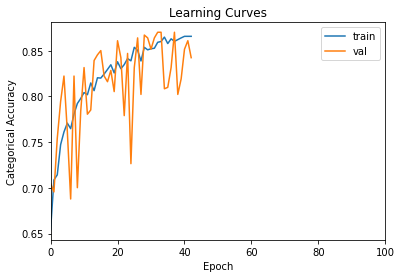

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6292 - categorical_accuracy: 0.6529 - val_loss: 0.5413 - val_categorical_accuracy: 0.7002
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5501 - categorical_accuracy: 0.7151 - val_loss: 0.5298 - val_categorical_accuracy: 0.7218
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5249 - categorical_accuracy: 0.7307 - val_loss: 0.4754 - val_categorical_accuracy: 0.7728
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4938 - categorical_accuracy: 0.7577 - val_loss: 0.5150 - val_categorical_accuracy: 0.7141
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4877 - categorical_accuracy: 0.7591 - val_loss: 0.4306 - val_categorical_accuracy: 0.8207
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4661 - categorical_accuracy: 0.7829 - val_loss: 0.5001 - val_categorical_accuracy: 0.729

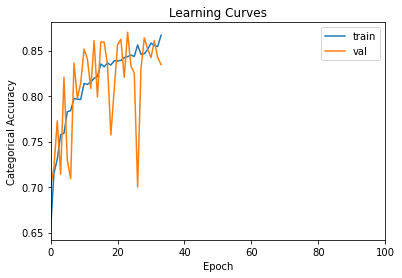

Epoch 1/100
182/182 [==============================] - 1s 6ms/step - loss: 0.6221 - categorical_accuracy: 0.6509 - val_loss: 0.5858 - val_categorical_accuracy: 0.6646
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5456 - categorical_accuracy: 0.7180 - val_loss: 0.5720 - val_categorical_accuracy: 0.6847
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5158 - categorical_accuracy: 0.7400 - val_loss: 0.4971 - val_categorical_accuracy: 0.7604
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5007 - categorical_accuracy: 0.7541 - val_loss: 0.4723 - val_categorical_accuracy: 0.7929
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4832 - categorical_accuracy: 0.7661 - val_loss: 0.5952 - val_categorical_accuracy: 0.6569
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4699 - categorical_accuracy: 0.7750 - val_loss: 0.4217 - val_categorical_accuracy: 0.822

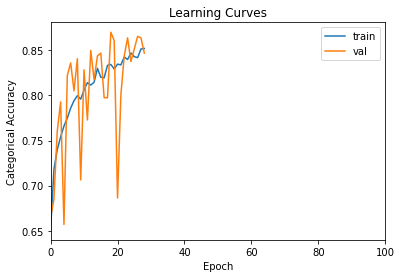

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6066 - categorical_accuracy: 0.6663 - val_loss: 0.5639 - val_categorical_accuracy: 0.7002
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5563 - categorical_accuracy: 0.7108 - val_loss: 0.5395 - val_categorical_accuracy: 0.7094
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5301 - categorical_accuracy: 0.7275 - val_loss: 0.5123 - val_categorical_accuracy: 0.7357
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5123 - categorical_accuracy: 0.7443 - val_loss: 0.4685 - val_categorical_accuracy: 0.7991
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4870 - categorical_accuracy: 0.7642 - val_loss: 0.4523 - val_categorical_accuracy: 0.7821
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4908 - categorical_accuracy: 0.7627 - val_loss: 0.6247 - val_categorical_accuracy: 0.647

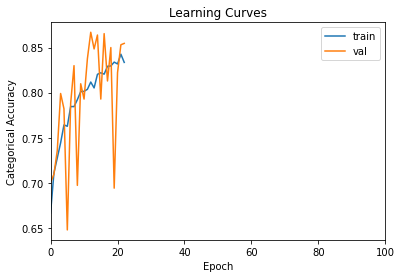


 
Model accuracy =  0.870169997215271


In [86]:
accuracy = []
for i in range(5):
    
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("\n \nModel accuracy = ", accuracy)

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6088 - categorical_accuracy: 0.6622 - val_loss: 0.6701 - val_categorical_accuracy: 0.5935
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5622 - categorical_accuracy: 0.7082 - val_loss: 0.5325 - val_categorical_accuracy: 0.7172
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5336 - categorical_accuracy: 0.7271 - val_loss: 0.5237 - val_categorical_accuracy: 0.7187
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5185 - categorical_accuracy: 0.7338 - val_loss: 0.4701 - val_categorical_accuracy: 0.8006
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4952 - categorical_accuracy: 0.7582 - val_loss: 0.4424 - val_categorical_accuracy: 0.7852
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4760 - categorical_accuracy: 0.7656 - val_loss: 0.4300 - val_categorical_accuracy: 0.803

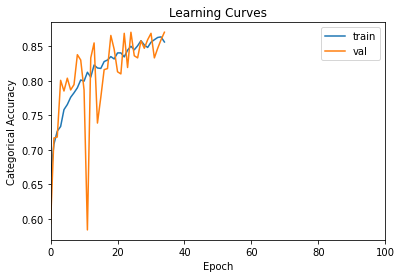

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6080 - categorical_accuracy: 0.6639 - val_loss: 0.5891 - val_categorical_accuracy: 0.6569
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5585 - categorical_accuracy: 0.7111 - val_loss: 0.5325 - val_categorical_accuracy: 0.7202
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5312 - categorical_accuracy: 0.7285 - val_loss: 0.5132 - val_categorical_accuracy: 0.7419
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5152 - categorical_accuracy: 0.7470 - val_loss: 0.5310 - val_categorical_accuracy: 0.7172
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4860 - categorical_accuracy: 0.7609 - val_loss: 0.6266 - val_categorical_accuracy: 0.6646
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4754 - categorical_accuracy: 0.7630 - val_loss: 0.4094 - val_categorical_accuracy: 0.828

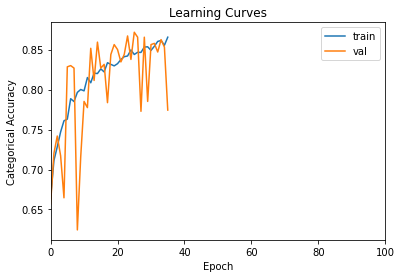

Epoch 1/100
182/182 [==============================] - 2s 8ms/step - loss: 0.6081 - categorical_accuracy: 0.6703 - val_loss: 0.5652 - val_categorical_accuracy: 0.6862
Epoch 2/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5614 - categorical_accuracy: 0.7044 - val_loss: 0.5939 - val_categorical_accuracy: 0.6600
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5323 - categorical_accuracy: 0.7318 - val_loss: 0.5116 - val_categorical_accuracy: 0.7419
Epoch 4/100
182/182 [==============================] - 1s 6ms/step - loss: 0.5106 - categorical_accuracy: 0.7482 - val_loss: 0.4741 - val_categorical_accuracy: 0.7852
Epoch 5/100
182/182 [==============================] - 1s 5ms/step - loss: 0.4969 - categorical_accuracy: 0.7527 - val_loss: 0.4635 - val_categorical_accuracy: 0.7913
Epoch 6/100
182/182 [==============================] - 1s 7ms/step - loss: 0.4757 - categorical_accuracy: 0.7709 - val_loss: 0.4570 - val_categorical_accuracy: 0.789

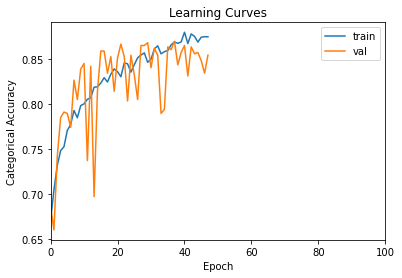

Epoch 1/100
182/182 [==============================] - 2s 7ms/step - loss: 0.6067 - categorical_accuracy: 0.6643 - val_loss: 0.6332 - val_categorical_accuracy: 0.6213
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5614 - categorical_accuracy: 0.7050 - val_loss: 0.5354 - val_categorical_accuracy: 0.7094
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5401 - categorical_accuracy: 0.7185 - val_loss: 0.5072 - val_categorical_accuracy: 0.7434
Epoch 4/100
182/182 [==============================] - 1s 6ms/step - loss: 0.5193 - categorical_accuracy: 0.7410 - val_loss: 0.4824 - val_categorical_accuracy: 0.7635
Epoch 5/100
182/182 [==============================] - 1s 6ms/step - loss: 0.4988 - categorical_accuracy: 0.7536 - val_loss: 0.4644 - val_categorical_accuracy: 0.7960
Epoch 6/100
182/182 [==============================] - 1s 6ms/step - loss: 0.4824 - categorical_accuracy: 0.7668 - val_loss: 0.5007 - val_categorical_accuracy: 0.740

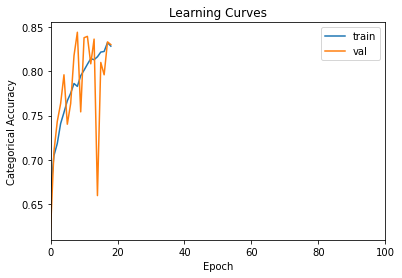

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6065 - categorical_accuracy: 0.6588 - val_loss: 0.5897 - val_categorical_accuracy: 0.6677
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5630 - categorical_accuracy: 0.7002 - val_loss: 0.5869 - val_categorical_accuracy: 0.6646
Epoch 3/100
182/182 [==============================] - 1s 6ms/step - loss: 0.5312 - categorical_accuracy: 0.7336 - val_loss: 0.4948 - val_categorical_accuracy: 0.7527
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5127 - categorical_accuracy: 0.7457 - val_loss: 0.4613 - val_categorical_accuracy: 0.7759
Epoch 5/100
182/182 [==============================] - 1s 5ms/step - loss: 0.4946 - categorical_accuracy: 0.7603 - val_loss: 0.4470 - val_categorical_accuracy: 0.7743
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 0.4803 - categorical_accuracy: 0.7670 - val_loss: 0.4310 - val_categorical_accuracy: 0.803

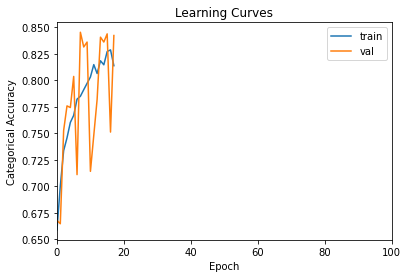

Model accuracy =  0.870169997215271


In [87]:
accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6090 - categorical_accuracy: 0.6631 - val_loss: 0.5633 - val_categorical_accuracy: 0.6893
Epoch 2/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5657 - categorical_accuracy: 0.7022 - val_loss: 0.6314 - val_categorical_accuracy: 0.6167
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5371 - categorical_accuracy: 0.7268 - val_loss: 0.5118 - val_categorical_accuracy: 0.7434
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5176 - categorical_accuracy: 0.7362 - val_loss: 0.4631 - val_categorical_accuracy: 0.7743
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4954 - categorical_accuracy: 0.7556 - val_loss: 0.4424 - val_categorical_accuracy: 0.8284
Epoch 6/100
182/182 [==============================] - 1s 7ms/step - loss: 0.4834 - categorical_accuracy: 0.7623 - val_loss: 0.4433 - val_categorical_accuracy: 0.799

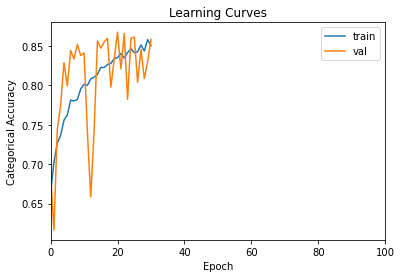

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6107 - categorical_accuracy: 0.6574 - val_loss: 0.5896 - val_categorical_accuracy: 0.6801
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5652 - categorical_accuracy: 0.7041 - val_loss: 0.5530 - val_categorical_accuracy: 0.7218
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5408 - categorical_accuracy: 0.7235 - val_loss: 0.5326 - val_categorical_accuracy: 0.7372
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5251 - categorical_accuracy: 0.7383 - val_loss: 0.4783 - val_categorical_accuracy: 0.7774
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5033 - categorical_accuracy: 0.7484 - val_loss: 0.4612 - val_categorical_accuracy: 0.7743
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4909 - categorical_accuracy: 0.7544 - val_loss: 0.4661 - val_categorical_accuracy: 0.758

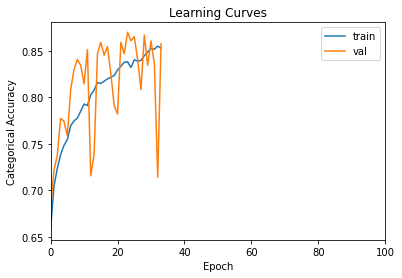

Epoch 1/100
182/182 [==============================] - 1s 6ms/step - loss: 0.6085 - categorical_accuracy: 0.6596 - val_loss: 0.5869 - val_categorical_accuracy: 0.6785
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5673 - categorical_accuracy: 0.7043 - val_loss: 0.5567 - val_categorical_accuracy: 0.6955
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5463 - categorical_accuracy: 0.7184 - val_loss: 0.5624 - val_categorical_accuracy: 0.6739
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5203 - categorical_accuracy: 0.7360 - val_loss: 0.4995 - val_categorical_accuracy: 0.7728
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4877 - categorical_accuracy: 0.7625 - val_loss: 0.7091 - val_categorical_accuracy: 0.6399
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4969 - categorical_accuracy: 0.7567 - val_loss: 0.5088 - val_categorical_accuracy: 0.721

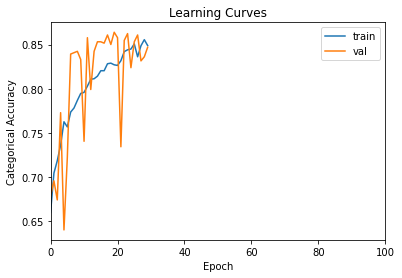

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6104 - categorical_accuracy: 0.6579 - val_loss: 0.5783 - val_categorical_accuracy: 0.7079
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5588 - categorical_accuracy: 0.7115 - val_loss: 0.5240 - val_categorical_accuracy: 0.7264
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5314 - categorical_accuracy: 0.7306 - val_loss: 0.4887 - val_categorical_accuracy: 0.7743
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5176 - categorical_accuracy: 0.7360 - val_loss: 0.4605 - val_categorical_accuracy: 0.7960
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4993 - categorical_accuracy: 0.7508 - val_loss: 0.5145 - val_categorical_accuracy: 0.7249
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4923 - categorical_accuracy: 0.7606 - val_loss: 0.5703 - val_categorical_accuracy: 0.673

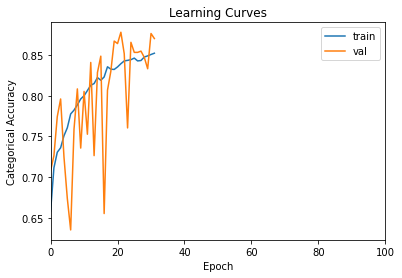

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6070 - categorical_accuracy: 0.6668 - val_loss: 0.5738 - val_categorical_accuracy: 0.6631
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5647 - categorical_accuracy: 0.7027 - val_loss: 0.5330 - val_categorical_accuracy: 0.7202
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5380 - categorical_accuracy: 0.7214 - val_loss: 0.5019 - val_categorical_accuracy: 0.7573
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5183 - categorical_accuracy: 0.7357 - val_loss: 0.5944 - val_categorical_accuracy: 0.6816
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5039 - categorical_accuracy: 0.7532 - val_loss: 0.4819 - val_categorical_accuracy: 0.7604
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4894 - categorical_accuracy: 0.7579 - val_loss: 0.4370 - val_categorical_accuracy: 0.823

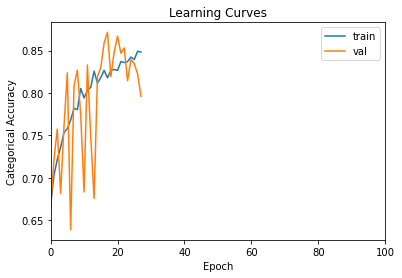

Model accuracy =  0.870169997215271


In [88]:
accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5944 - categorical_accuracy: 0.6804 - val_loss: 0.5553 - val_categorical_accuracy: 0.6924
Epoch 2/100
182/182 [==============================] - 1s 3ms/step - loss: 0.5532 - categorical_accuracy: 0.7118 - val_loss: 0.7359 - val_categorical_accuracy: 0.6090
Epoch 3/100
182/182 [==============================] - 1s 3ms/step - loss: 0.5391 - categorical_accuracy: 0.7230 - val_loss: 0.4953 - val_categorical_accuracy: 0.7604
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5084 - categorical_accuracy: 0.7510 - val_loss: 0.4856 - val_categorical_accuracy: 0.7512
Epoch 5/100
182/182 [==============================] - 1s 3ms/step - loss: 0.4967 - categorical_accuracy: 0.7537 - val_loss: 0.4591 - val_categorical_accuracy: 0.8053
Epoch 6/100
182/182 [==============================] - 1s 3ms/step - loss: 0.4758 - categorical_accuracy: 0.7676 - val_loss: 0.4539 - val_categorical_accuracy: 0.771

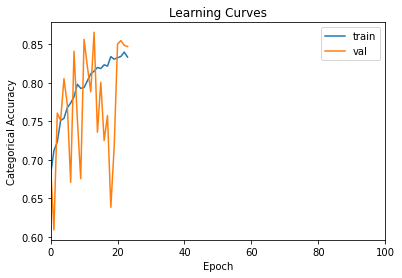

Epoch 1/100
182/182 [==============================] - 1s 4ms/step - loss: 0.6038 - categorical_accuracy: 0.6722 - val_loss: 0.6115 - val_categorical_accuracy: 0.6461
Epoch 2/100
182/182 [==============================] - 1s 3ms/step - loss: 0.5663 - categorical_accuracy: 0.7050 - val_loss: 0.5913 - val_categorical_accuracy: 0.6847
Epoch 3/100
182/182 [==============================] - 1s 3ms/step - loss: 0.5420 - categorical_accuracy: 0.7249 - val_loss: 0.5479 - val_categorical_accuracy: 0.7187
Epoch 4/100
182/182 [==============================] - 0s 3ms/step - loss: 0.5279 - categorical_accuracy: 0.7326 - val_loss: 0.4849 - val_categorical_accuracy: 0.7743
Epoch 5/100
182/182 [==============================] - 1s 3ms/step - loss: 0.5187 - categorical_accuracy: 0.7398 - val_loss: 0.4796 - val_categorical_accuracy: 0.7898
Epoch 6/100
182/182 [==============================] - 0s 3ms/step - loss: 0.4855 - categorical_accuracy: 0.7651 - val_loss: 0.4585 - val_categorical_accuracy: 0.789

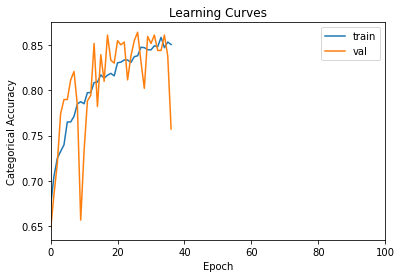

Epoch 1/100
182/182 [==============================] - 1s 4ms/step - loss: 0.6126 - categorical_accuracy: 0.6579 - val_loss: 0.5818 - val_categorical_accuracy: 0.6832
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5701 - categorical_accuracy: 0.6959 - val_loss: 0.5733 - val_categorical_accuracy: 0.6816
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5408 - categorical_accuracy: 0.7221 - val_loss: 0.5015 - val_categorical_accuracy: 0.7527
Epoch 4/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5195 - categorical_accuracy: 0.7343 - val_loss: 0.5234 - val_categorical_accuracy: 0.7172
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5215 - categorical_accuracy: 0.7378 - val_loss: 0.5205 - val_categorical_accuracy: 0.7156
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4934 - categorical_accuracy: 0.7563 - val_loss: 0.4480 - val_categorical_accuracy: 0.805

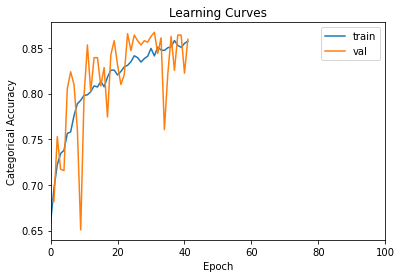

Epoch 1/100
182/182 [==============================] - 1s 4ms/step - loss: 0.6053 - categorical_accuracy: 0.6749 - val_loss: 0.5830 - val_categorical_accuracy: 0.7048
Epoch 2/100
182/182 [==============================] - 0s 3ms/step - loss: 0.5690 - categorical_accuracy: 0.7063 - val_loss: 0.5324 - val_categorical_accuracy: 0.7372
Epoch 3/100
182/182 [==============================] - 1s 3ms/step - loss: 0.5481 - categorical_accuracy: 0.7227 - val_loss: 0.5012 - val_categorical_accuracy: 0.7635
Epoch 4/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5187 - categorical_accuracy: 0.7445 - val_loss: 0.6207 - val_categorical_accuracy: 0.6662
Epoch 5/100
182/182 [==============================] - 0s 3ms/step - loss: 0.5089 - categorical_accuracy: 0.7450 - val_loss: 0.4555 - val_categorical_accuracy: 0.7913
Epoch 6/100
182/182 [==============================] - 1s 3ms/step - loss: 0.4948 - categorical_accuracy: 0.7560 - val_loss: 0.4711 - val_categorical_accuracy: 0.752

Epoch 50/100
182/182 [==============================] - 0s 3ms/step - loss: 0.3008 - categorical_accuracy: 0.8748 - val_loss: 0.3360 - val_categorical_accuracy: 0.8655
Epoch 51/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3340 - categorical_accuracy: 0.8733

Test accuracy: 0.8732612133026123


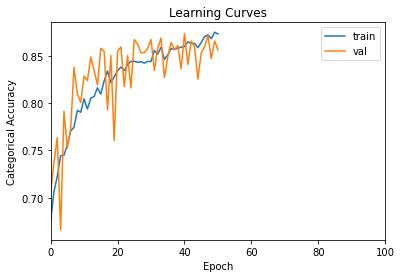

Epoch 1/100
182/182 [==============================] - 1s 3ms/step - loss: 0.6099 - categorical_accuracy: 0.6595 - val_loss: 0.6914 - val_categorical_accuracy: 0.5966
Epoch 2/100
182/182 [==============================] - 0s 3ms/step - loss: 0.5682 - categorical_accuracy: 0.6998 - val_loss: 0.5337 - val_categorical_accuracy: 0.7187
Epoch 3/100
182/182 [==============================] - 0s 3ms/step - loss: 0.5424 - categorical_accuracy: 0.7252 - val_loss: 0.5016 - val_categorical_accuracy: 0.7434
Epoch 4/100
182/182 [==============================] - 0s 3ms/step - loss: 0.5213 - categorical_accuracy: 0.7400 - val_loss: 0.5724 - val_categorical_accuracy: 0.6754
Epoch 5/100
182/182 [==============================] - 0s 3ms/step - loss: 0.4992 - categorical_accuracy: 0.7489 - val_loss: 0.5645 - val_categorical_accuracy: 0.7063
Epoch 6/100
182/182 [==============================] - 0s 3ms/step - loss: 0.4888 - categorical_accuracy: 0.7613 - val_loss: 0.5215 - val_categorical_accuracy: 0.707

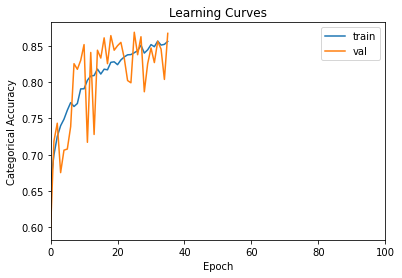

Model accuracy =  0.8670788407325745


In [89]:
accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
182/182 [==============================] - 8s 40ms/step - loss: 0.7039 - categorical_accuracy: 0.6522 - val_loss: 0.6486 - val_categorical_accuracy: 0.6151
Epoch 2/100
182/182 [==============================] - 7s 40ms/step - loss: 0.5389 - categorical_accuracy: 0.7239 - val_loss: 0.4825 - val_categorical_accuracy: 0.7759
Epoch 3/100
182/182 [==============================] - 7s 41ms/step - loss: 0.5039 - categorical_accuracy: 0.7532 - val_loss: 0.4593 - val_categorical_accuracy: 0.7836
Epoch 4/100
182/182 [==============================] - 8s 44ms/step - loss: 0.4817 - categorical_accuracy: 0.7711 - val_loss: 0.4496 - val_categorical_accuracy: 0.7774
Epoch 5/100
182/182 [==============================] - 8s 42ms/step - loss: 0.4518 - categorical_accuracy: 0.7883 - val_loss: 0.4162 - val_categorical_accuracy: 0.8300
Epoch 6/100
182/182 [==============================] - 7s 41ms/step - loss: 0.4609 - categorical_accuracy: 0.7845 - val_loss: 0.4130 - val_categorical_accuracy:

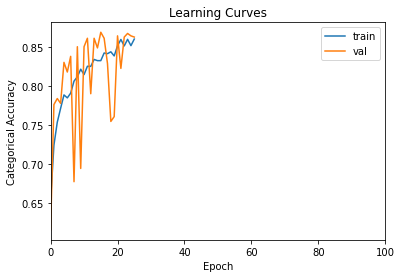

Epoch 1/100
182/182 [==============================] - 8s 40ms/step - loss: 0.6925 - categorical_accuracy: 0.6624 - val_loss: 0.5616 - val_categorical_accuracy: 0.6847
Epoch 2/100
182/182 [==============================] - 7s 40ms/step - loss: 0.5357 - categorical_accuracy: 0.7216 - val_loss: 0.5219 - val_categorical_accuracy: 0.7110
Epoch 3/100
182/182 [==============================] - 7s 41ms/step - loss: 0.5011 - categorical_accuracy: 0.7558 - val_loss: 0.5282 - val_categorical_accuracy: 0.6971
Epoch 4/100
182/182 [==============================] - 8s 42ms/step - loss: 0.4804 - categorical_accuracy: 0.7688 - val_loss: 0.5344 - val_categorical_accuracy: 0.7202
Epoch 5/100
182/182 [==============================] - 8s 45ms/step - loss: 0.4692 - categorical_accuracy: 0.7779 - val_loss: 0.4535 - val_categorical_accuracy: 0.7728
Epoch 6/100
182/182 [==============================] - 8s 46ms/step - loss: 0.4495 - categorical_accuracy: 0.7871 - val_loss: 0.5058 - val_categorical_accuracy:

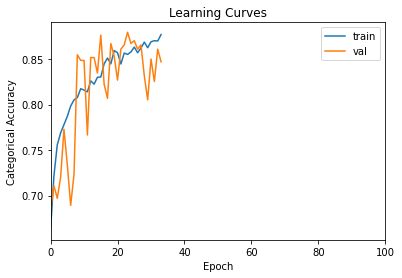

Epoch 1/100
182/182 [==============================] - 8s 41ms/step - loss: 0.6890 - categorical_accuracy: 0.6565 - val_loss: 0.5384 - val_categorical_accuracy: 0.7079
Epoch 2/100
182/182 [==============================] - 7s 39ms/step - loss: 0.5399 - categorical_accuracy: 0.7324 - val_loss: 0.4917 - val_categorical_accuracy: 0.7635
Epoch 3/100
182/182 [==============================] - 7s 40ms/step - loss: 0.5011 - categorical_accuracy: 0.7556 - val_loss: 0.6299 - val_categorical_accuracy: 0.6414
Epoch 4/100
182/182 [==============================] - 7s 40ms/step - loss: 0.4898 - categorical_accuracy: 0.7673 - val_loss: 0.4622 - val_categorical_accuracy: 0.7543
Epoch 5/100
182/182 [==============================] - 7s 39ms/step - loss: 0.4608 - categorical_accuracy: 0.7785 - val_loss: 0.6108 - val_categorical_accuracy: 0.6584
Epoch 6/100
182/182 [==============================] - 7s 40ms/step - loss: 0.4505 - categorical_accuracy: 0.7895 - val_loss: 0.6988 - val_categorical_accuracy:

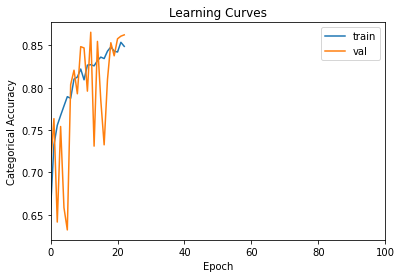

Epoch 1/100
182/182 [==============================] - 8s 40ms/step - loss: 0.7125 - categorical_accuracy: 0.6467 - val_loss: 0.5871 - val_categorical_accuracy: 0.6940
Epoch 2/100
182/182 [==============================] - 7s 40ms/step - loss: 0.5341 - categorical_accuracy: 0.7314 - val_loss: 0.5328 - val_categorical_accuracy: 0.6971
Epoch 3/100
182/182 [==============================] - 7s 40ms/step - loss: 0.5008 - categorical_accuracy: 0.7486 - val_loss: 0.4640 - val_categorical_accuracy: 0.7604
Epoch 4/100
182/182 [==============================] - 7s 40ms/step - loss: 0.4761 - categorical_accuracy: 0.7714 - val_loss: 0.4275 - val_categorical_accuracy: 0.8192
Epoch 5/100
182/182 [==============================] - 7s 40ms/step - loss: 0.4588 - categorical_accuracy: 0.7838 - val_loss: 0.4633 - val_categorical_accuracy: 0.7635
Epoch 6/100
182/182 [==============================] - 7s 40ms/step - loss: 0.4486 - categorical_accuracy: 0.7903 - val_loss: 0.4232 - val_categorical_accuracy:

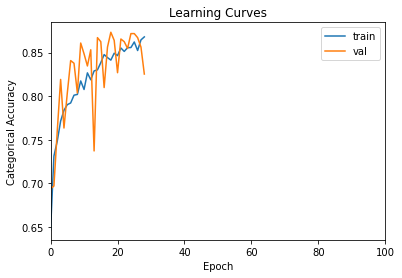

Epoch 1/100
182/182 [==============================] - 7s 38ms/step - loss: 0.6736 - categorical_accuracy: 0.6577 - val_loss: 0.5305 - val_categorical_accuracy: 0.7110
Epoch 2/100
182/182 [==============================] - 7s 38ms/step - loss: 0.5351 - categorical_accuracy: 0.7268 - val_loss: 0.6817 - val_categorical_accuracy: 0.6213
Epoch 3/100
182/182 [==============================] - 7s 39ms/step - loss: 0.5058 - categorical_accuracy: 0.7479 - val_loss: 0.4527 - val_categorical_accuracy: 0.8006
Epoch 4/100
182/182 [==============================] - 8s 45ms/step - loss: 0.4936 - categorical_accuracy: 0.7563 - val_loss: 0.4382 - val_categorical_accuracy: 0.8053
Epoch 5/100
182/182 [==============================] - 8s 44ms/step - loss: 0.4627 - categorical_accuracy: 0.7821 - val_loss: 0.5223 - val_categorical_accuracy: 0.7063
Epoch 6/100
182/182 [==============================] - 8s 45ms/step - loss: 0.4500 - categorical_accuracy: 0.7838 - val_loss: 0.4017 - val_categorical_accuracy:

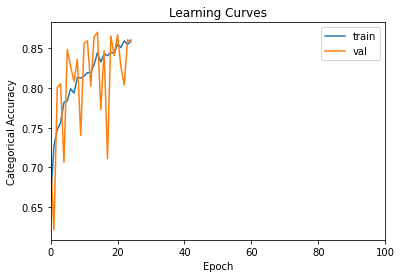

Model accuracy =  0.870169997215271


In [90]:
 
accuracy = []
for i in range(5):
        # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3000, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
182/182 [==============================] - 11s 56ms/step - loss: 0.6075 - categorical_accuracy: 0.6653 - val_loss: 0.5413 - val_categorical_accuracy: 0.7280
Epoch 2/100
182/182 [==============================] - 10s 53ms/step - loss: 0.5466 - categorical_accuracy: 0.7214 - val_loss: 0.5572 - val_categorical_accuracy: 0.7141
Epoch 3/100
182/182 [==============================] - 10s 53ms/step - loss: 0.5147 - categorical_accuracy: 0.7439 - val_loss: 0.4560 - val_categorical_accuracy: 0.8145
Epoch 4/100
182/182 [==============================] - 10s 53ms/step - loss: 0.4918 - categorical_accuracy: 0.7567 - val_loss: 0.4389 - val_categorical_accuracy: 0.8269
Epoch 5/100
182/182 [==============================] - 10s 53ms/step - loss: 0.4737 - categorical_accuracy: 0.7738 - val_loss: 0.4202 - val_categorical_accuracy: 0.8068
Epoch 6/100
182/182 [==============================] - 10s 55ms/step - loss: 0.4546 - categorical_accuracy: 0.7841 - val_loss: 0.4748 - val_categorical_acc

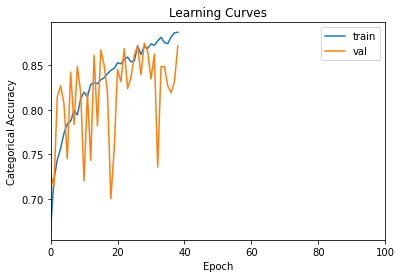

Epoch 1/100
182/182 [==============================] - 10s 52ms/step - loss: 0.6207 - categorical_accuracy: 0.6555 - val_loss: 0.5472 - val_categorical_accuracy: 0.7094
Epoch 2/100
182/182 [==============================] - 9s 50ms/step - loss: 0.5355 - categorical_accuracy: 0.7283 - val_loss: 0.7681 - val_categorical_accuracy: 0.5827
Epoch 3/100
182/182 [==============================] - 9s 48ms/step - loss: 0.5163 - categorical_accuracy: 0.7415 - val_loss: 0.4606 - val_categorical_accuracy: 0.8037
Epoch 4/100
182/182 [==============================] - 10s 54ms/step - loss: 0.4791 - categorical_accuracy: 0.7688 - val_loss: 0.4304 - val_categorical_accuracy: 0.8269
Epoch 5/100
182/182 [==============================] - 9s 52ms/step - loss: 0.4761 - categorical_accuracy: 0.7713 - val_loss: 0.4596 - val_categorical_accuracy: 0.7821
Epoch 6/100
182/182 [==============================] - 9s 51ms/step - loss: 0.4548 - categorical_accuracy: 0.7795 - val_loss: 0.4131 - val_categorical_accurac

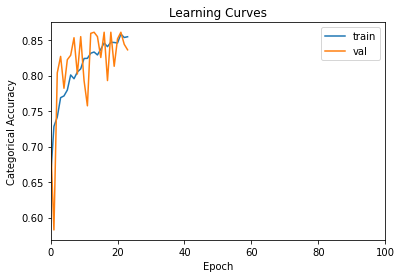

Epoch 1/100
182/182 [==============================] - 10s 53ms/step - loss: 0.6085 - categorical_accuracy: 0.6725 - val_loss: 0.6008 - val_categorical_accuracy: 0.6584
Epoch 2/100
182/182 [==============================] - 9s 48ms/step - loss: 0.5407 - categorical_accuracy: 0.7184 - val_loss: 0.5578 - val_categorical_accuracy: 0.7094
Epoch 3/100
182/182 [==============================] - 9s 48ms/step - loss: 0.5172 - categorical_accuracy: 0.7426 - val_loss: 0.5005 - val_categorical_accuracy: 0.7326
Epoch 4/100
182/182 [==============================] - 9s 48ms/step - loss: 0.4952 - categorical_accuracy: 0.7537 - val_loss: 0.4431 - val_categorical_accuracy: 0.8269
Epoch 5/100
182/182 [==============================] - 9s 48ms/step - loss: 0.4821 - categorical_accuracy: 0.7632 - val_loss: 0.4426 - val_categorical_accuracy: 0.8192
Epoch 6/100
182/182 [==============================] - 9s 48ms/step - loss: 0.4503 - categorical_accuracy: 0.7860 - val_loss: 0.4995 - val_categorical_accuracy

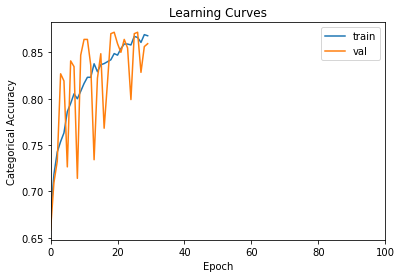

Epoch 1/100
182/182 [==============================] - 10s 51ms/step - loss: 0.6262 - categorical_accuracy: 0.6550 - val_loss: 0.7076 - val_categorical_accuracy: 0.5920
Epoch 2/100
182/182 [==============================] - 9s 48ms/step - loss: 0.5406 - categorical_accuracy: 0.7228 - val_loss: 0.4863 - val_categorical_accuracy: 0.7759
Epoch 3/100
182/182 [==============================] - 9s 48ms/step - loss: 0.5111 - categorical_accuracy: 0.7438 - val_loss: 0.4705 - val_categorical_accuracy: 0.7666
Epoch 4/100
182/182 [==============================] - 9s 48ms/step - loss: 0.4913 - categorical_accuracy: 0.7577 - val_loss: 0.4382 - val_categorical_accuracy: 0.8253
Epoch 5/100
182/182 [==============================] - 9s 48ms/step - loss: 0.4675 - categorical_accuracy: 0.7730 - val_loss: 0.4133 - val_categorical_accuracy: 0.8192
Epoch 6/100
182/182 [==============================] - 9s 51ms/step - loss: 0.4466 - categorical_accuracy: 0.7955 - val_loss: 0.5244 - val_categorical_accuracy

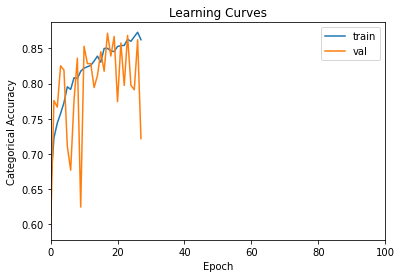

Epoch 1/100
182/182 [==============================] - 11s 56ms/step - loss: 0.6145 - categorical_accuracy: 0.6675 - val_loss: 0.5372 - val_categorical_accuracy: 0.7187
Epoch 2/100
182/182 [==============================] - 9s 51ms/step - loss: 0.5379 - categorical_accuracy: 0.7239 - val_loss: 0.4979 - val_categorical_accuracy: 0.7543
Epoch 3/100
182/182 [==============================] - 9s 50ms/step - loss: 0.5115 - categorical_accuracy: 0.7405 - val_loss: 0.5722 - val_categorical_accuracy: 0.6600
Epoch 4/100
182/182 [==============================] - 9s 50ms/step - loss: 0.4796 - categorical_accuracy: 0.7709 - val_loss: 0.4333 - val_categorical_accuracy: 0.8083
Epoch 5/100
182/182 [==============================] - 9s 52ms/step - loss: 0.4690 - categorical_accuracy: 0.7726 - val_loss: 0.4653 - val_categorical_accuracy: 0.7419
Epoch 6/100
182/182 [==============================] - 9s 51ms/step - loss: 0.4511 - categorical_accuracy: 0.7881 - val_loss: 0.4088 - val_categorical_accuracy

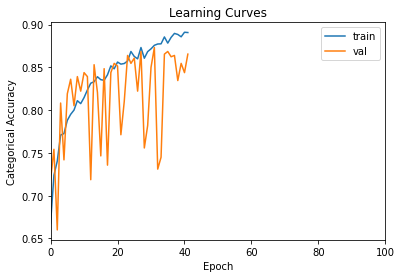

Model accuracy =  0.8717156052589417


In [91]:
# Define Model

    
accuracy = []
for i in range(5):
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1500, activation='relu'),
        tf.keras.layers.Dense(1500, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6188 - categorical_accuracy: 0.6502 - val_loss: 0.5741 - val_categorical_accuracy: 0.6971
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5659 - categorical_accuracy: 0.7015 - val_loss: 0.5603 - val_categorical_accuracy: 0.7233
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5422 - categorical_accuracy: 0.7257 - val_loss: 0.5145 - val_categorical_accuracy: 0.7357
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5206 - categorical_accuracy: 0.7386 - val_loss: 0.4876 - val_categorical_accuracy: 0.7713
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5054 - categorical_accuracy: 0.7505 - val_loss: 0.4618 - val_categorical_accuracy: 0.7913
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4905 - categorical_accuracy: 0.7599 - val_loss: 0.4532 - val_categorical_accuracy: 0.788

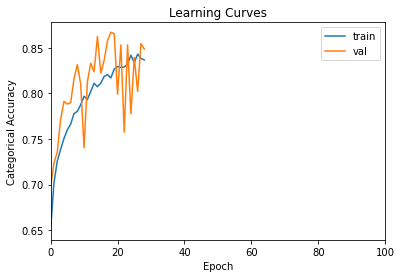

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6171 - categorical_accuracy: 0.6507 - val_loss: 0.5778 - val_categorical_accuracy: 0.6553
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5695 - categorical_accuracy: 0.6993 - val_loss: 0.5742 - val_categorical_accuracy: 0.6878
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5404 - categorical_accuracy: 0.7228 - val_loss: 0.5277 - val_categorical_accuracy: 0.7311
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5234 - categorical_accuracy: 0.7369 - val_loss: 0.4898 - val_categorical_accuracy: 0.7527
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5120 - categorical_accuracy: 0.7448 - val_loss: 0.5136 - val_categorical_accuracy: 0.7218
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4880 - categorical_accuracy: 0.7613 - val_loss: 0.4537 - val_categorical_accuracy: 0.782

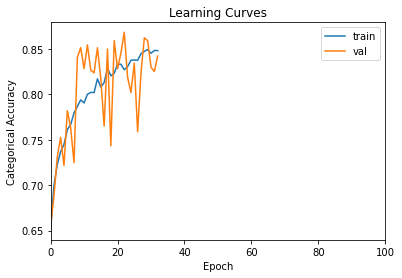

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6140 - categorical_accuracy: 0.6516 - val_loss: 0.5767 - val_categorical_accuracy: 0.6940
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5749 - categorical_accuracy: 0.6914 - val_loss: 0.5691 - val_categorical_accuracy: 0.6785
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5408 - categorical_accuracy: 0.7242 - val_loss: 0.5277 - val_categorical_accuracy: 0.7032
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5215 - categorical_accuracy: 0.7405 - val_loss: 0.4852 - val_categorical_accuracy: 0.7883
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5042 - categorical_accuracy: 0.7494 - val_loss: 0.4540 - val_categorical_accuracy: 0.8037
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5025 - categorical_accuracy: 0.7494 - val_loss: 0.4316 - val_categorical_accuracy: 0.803

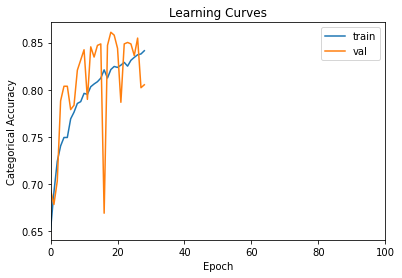

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6135 - categorical_accuracy: 0.6610 - val_loss: 0.5772 - val_categorical_accuracy: 0.7002
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5775 - categorical_accuracy: 0.6943 - val_loss: 0.5500 - val_categorical_accuracy: 0.6986
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5497 - categorical_accuracy: 0.7192 - val_loss: 0.5178 - val_categorical_accuracy: 0.7342
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5275 - categorical_accuracy: 0.7386 - val_loss: 0.4821 - val_categorical_accuracy: 0.7728
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5030 - categorical_accuracy: 0.7546 - val_loss: 0.4637 - val_categorical_accuracy: 0.7929
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5013 - categorical_accuracy: 0.7551 - val_loss: 0.4636 - val_categorical_accuracy: 0.796

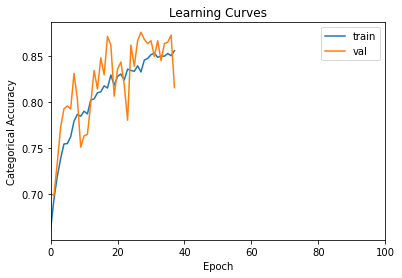

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6124 - categorical_accuracy: 0.6576 - val_loss: 0.5787 - val_categorical_accuracy: 0.6862
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5641 - categorical_accuracy: 0.7012 - val_loss: 0.5669 - val_categorical_accuracy: 0.6770
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5410 - categorical_accuracy: 0.7259 - val_loss: 0.5083 - val_categorical_accuracy: 0.7465
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5230 - categorical_accuracy: 0.7345 - val_loss: 0.4804 - val_categorical_accuracy: 0.7558
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5060 - categorical_accuracy: 0.7500 - val_loss: 0.4669 - val_categorical_accuracy: 0.7929
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4820 - categorical_accuracy: 0.7664 - val_loss: 0.7311 - val_categorical_accuracy: 0.584

Epoch 50/100
182/182 [==============================] - 1s 4ms/step - loss: 0.3045 - categorical_accuracy: 0.8695 - val_loss: 0.3457 - val_categorical_accuracy: 0.8594
Epoch 51/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2997 - categorical_accuracy: 0.8698 - val_loss: 0.3691 - val_categorical_accuracy: 0.8377
Epoch 52/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3225 - categorical_accuracy: 0.8794

Test accuracy: 0.8794435858726501


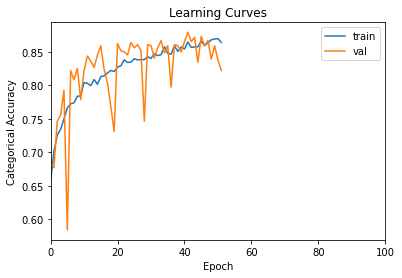

Model accuracy =  0.8686244487762451


In [92]:
accuracy = []
for i in range(5):
    
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6240 - categorical_accuracy: 0.6562 - val_loss: 0.5492 - val_categorical_accuracy: 0.6785
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5553 - categorical_accuracy: 0.7106 - val_loss: 0.5325 - val_categorical_accuracy: 0.7125
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5262 - categorical_accuracy: 0.7376 - val_loss: 0.5746 - val_categorical_accuracy: 0.6971
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5083 - categorical_accuracy: 0.7494 - val_loss: 0.5853 - val_categorical_accuracy: 0.6631
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4865 - categorical_accuracy: 0.7613 - val_loss: 0.4370 - val_categorical_accuracy: 0.8176
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4703 - categorical_accuracy: 0.7805 - val_loss: 0.4910 - val_categorical_accuracy: 0.741

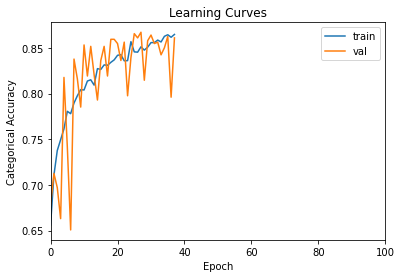

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6027 - categorical_accuracy: 0.6680 - val_loss: 0.6176 - val_categorical_accuracy: 0.6631
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5563 - categorical_accuracy: 0.7103 - val_loss: 0.5294 - val_categorical_accuracy: 0.7372
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5279 - categorical_accuracy: 0.7402 - val_loss: 0.5236 - val_categorical_accuracy: 0.7280
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5069 - categorical_accuracy: 0.7429 - val_loss: 0.4672 - val_categorical_accuracy: 0.7898
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4866 - categorical_accuracy: 0.7658 - val_loss: 0.4508 - val_categorical_accuracy: 0.8006
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4710 - categorical_accuracy: 0.7743 - val_loss: 0.4800 - val_categorical_accuracy: 0.749

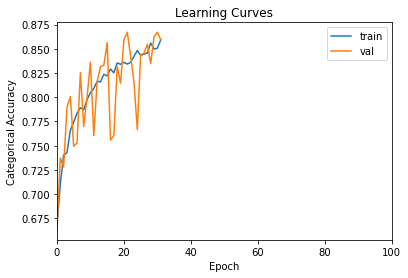

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6171 - categorical_accuracy: 0.6564 - val_loss: 0.5782 - val_categorical_accuracy: 0.6646
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5638 - categorical_accuracy: 0.7041 - val_loss: 0.5241 - val_categorical_accuracy: 0.7311
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5285 - categorical_accuracy: 0.7330 - val_loss: 0.5033 - val_categorical_accuracy: 0.7450
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5116 - categorical_accuracy: 0.7429 - val_loss: 0.4957 - val_categorical_accuracy: 0.7496
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4848 - categorical_accuracy: 0.7642 - val_loss: 0.4466 - val_categorical_accuracy: 0.7697
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 0.4626 - categorical_accuracy: 0.7810 - val_loss: 0.4397 - val_categorical_accuracy: 0.808

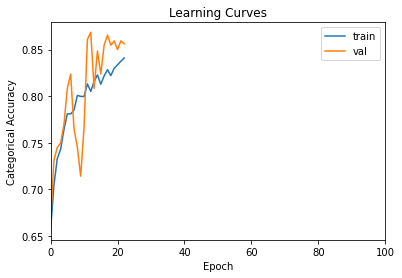

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6172 - categorical_accuracy: 0.6655 - val_loss: 0.5980 - val_categorical_accuracy: 0.6538
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5539 - categorical_accuracy: 0.7084 - val_loss: 0.5239 - val_categorical_accuracy: 0.7249
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5286 - categorical_accuracy: 0.7292 - val_loss: 0.5999 - val_categorical_accuracy: 0.6646
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5145 - categorical_accuracy: 0.7405 - val_loss: 0.4990 - val_categorical_accuracy: 0.7403
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4842 - categorical_accuracy: 0.7604 - val_loss: 0.4475 - val_categorical_accuracy: 0.7913
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4732 - categorical_accuracy: 0.7687 - val_loss: 0.4868 - val_categorical_accuracy: 0.743

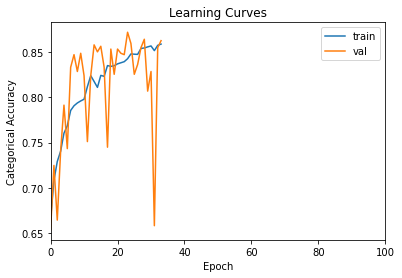

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6210 - categorical_accuracy: 0.6608 - val_loss: 0.5668 - val_categorical_accuracy: 0.7063
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5549 - categorical_accuracy: 0.7081 - val_loss: 0.5241 - val_categorical_accuracy: 0.7295
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5281 - categorical_accuracy: 0.7352 - val_loss: 0.5011 - val_categorical_accuracy: 0.7573
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5098 - categorical_accuracy: 0.7448 - val_loss: 0.4831 - val_categorical_accuracy: 0.7635
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4922 - categorical_accuracy: 0.7597 - val_loss: 0.4756 - val_categorical_accuracy: 0.7666
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4766 - categorical_accuracy: 0.7704 - val_loss: 0.4244 - val_categorical_accuracy: 0.819

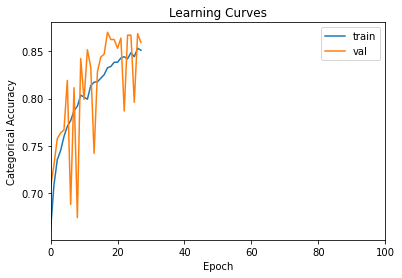

Model accuracy =  0.8686244487762451


In [93]:

accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6123 - categorical_accuracy: 0.6741 - val_loss: 0.6376 - val_categorical_accuracy: 0.6105
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5565 - categorical_accuracy: 0.7130 - val_loss: 0.6851 - val_categorical_accuracy: 0.6121
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5290 - categorical_accuracy: 0.7312 - val_loss: 0.5245 - val_categorical_accuracy: 0.7218
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5109 - categorical_accuracy: 0.7494 - val_loss: 0.4602 - val_categorical_accuracy: 0.7743
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4966 - categorical_accuracy: 0.7573 - val_loss: 0.4701 - val_categorical_accuracy: 0.7604
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4762 - categorical_accuracy: 0.7704 - val_loss: 0.4989 - val_categorical_accuracy: 0.726

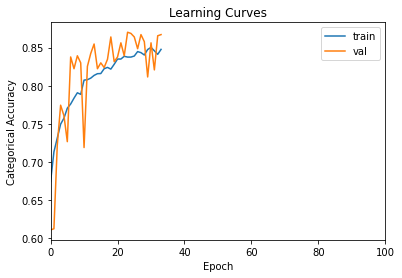

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6272 - categorical_accuracy: 0.6557 - val_loss: 0.5585 - val_categorical_accuracy: 0.6878
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5604 - categorical_accuracy: 0.7039 - val_loss: 0.5321 - val_categorical_accuracy: 0.7311
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5366 - categorical_accuracy: 0.7283 - val_loss: 0.4810 - val_categorical_accuracy: 0.7805
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5041 - categorical_accuracy: 0.7494 - val_loss: 0.5216 - val_categorical_accuracy: 0.7156
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4890 - categorical_accuracy: 0.7577 - val_loss: 0.4406 - val_categorical_accuracy: 0.8114
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4760 - categorical_accuracy: 0.7695 - val_loss: 0.5800 - val_categorical_accuracy: 0.683

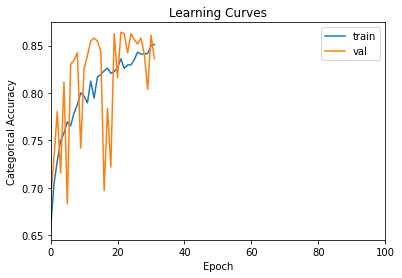

Epoch 1/100
182/182 [==============================] - 1s 4ms/step - loss: 0.6226 - categorical_accuracy: 0.6608 - val_loss: 0.5625 - val_categorical_accuracy: 0.6940
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5689 - categorical_accuracy: 0.7043 - val_loss: 0.5287 - val_categorical_accuracy: 0.7141
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5230 - categorical_accuracy: 0.7342 - val_loss: 0.4814 - val_categorical_accuracy: 0.7697
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5171 - categorical_accuracy: 0.7434 - val_loss: 0.4758 - val_categorical_accuracy: 0.7543
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4916 - categorical_accuracy: 0.7609 - val_loss: 0.4417 - val_categorical_accuracy: 0.8099
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4916 - categorical_accuracy: 0.7560 - val_loss: 0.5124 - val_categorical_accuracy: 0.717

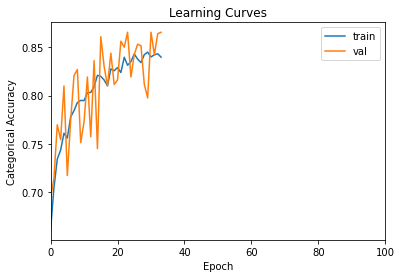

Epoch 1/100
182/182 [==============================] - 1s 4ms/step - loss: 0.6264 - categorical_accuracy: 0.6581 - val_loss: 0.5968 - val_categorical_accuracy: 0.6584
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5546 - categorical_accuracy: 0.7057 - val_loss: 0.5154 - val_categorical_accuracy: 0.7342
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5266 - categorical_accuracy: 0.7335 - val_loss: 0.4754 - val_categorical_accuracy: 0.7898
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5143 - categorical_accuracy: 0.7426 - val_loss: 0.4861 - val_categorical_accuracy: 0.7465
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4952 - categorical_accuracy: 0.7644 - val_loss: 0.4417 - val_categorical_accuracy: 0.8161
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 0.4809 - categorical_accuracy: 0.7685 - val_loss: 0.4307 - val_categorical_accuracy: 0.806

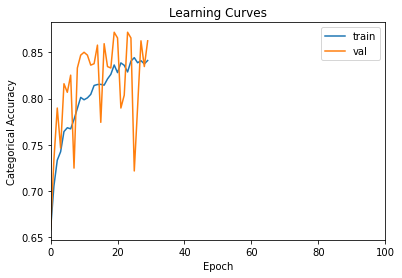

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6217 - categorical_accuracy: 0.6486 - val_loss: 0.5720 - val_categorical_accuracy: 0.6770
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5566 - categorical_accuracy: 0.7089 - val_loss: 0.5200 - val_categorical_accuracy: 0.7496
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5349 - categorical_accuracy: 0.7257 - val_loss: 0.4992 - val_categorical_accuracy: 0.7682
Epoch 4/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5142 - categorical_accuracy: 0.7441 - val_loss: 0.4631 - val_categorical_accuracy: 0.7883
Epoch 5/100
182/182 [==============================] - 1s 5ms/step - loss: 0.4973 - categorical_accuracy: 0.7597 - val_loss: 0.4774 - val_categorical_accuracy: 0.7713
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4776 - categorical_accuracy: 0.7695 - val_loss: 0.4264 - val_categorical_accuracy: 0.822

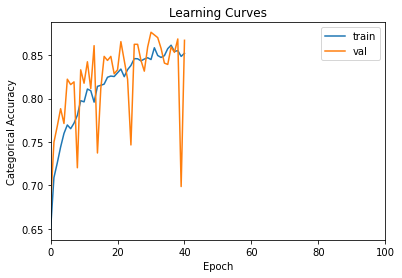

Model accuracy =  0.870169997215271


In [94]:


accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
182/182 [==============================] - 1s 6ms/step - loss: 0.7792 - categorical_accuracy: 0.6275 - val_loss: 0.5648 - val_categorical_accuracy: 0.6878
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5649 - categorical_accuracy: 0.7067 - val_loss: 0.5207 - val_categorical_accuracy: 0.7233
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5464 - categorical_accuracy: 0.7201 - val_loss: 0.4888 - val_categorical_accuracy: 0.7852
Epoch 4/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5217 - categorical_accuracy: 0.7362 - val_loss: 0.4991 - val_categorical_accuracy: 0.7295
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5059 - categorical_accuracy: 0.7489 - val_loss: 0.4838 - val_categorical_accuracy: 0.7512
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4977 - categorical_accuracy: 0.7597 - val_loss: 0.4235 - val_categorical_accuracy: 0.817

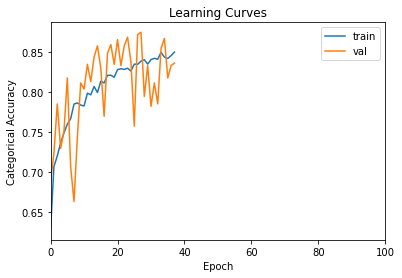

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.7965 - categorical_accuracy: 0.6407 - val_loss: 0.8646 - val_categorical_accuracy: 0.5734
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5627 - categorical_accuracy: 0.7065 - val_loss: 0.5475 - val_categorical_accuracy: 0.6955
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5438 - categorical_accuracy: 0.7244 - val_loss: 0.4971 - val_categorical_accuracy: 0.7527
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5256 - categorical_accuracy: 0.7366 - val_loss: 0.4538 - val_categorical_accuracy: 0.8114
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5021 - categorical_accuracy: 0.7541 - val_loss: 0.4329 - val_categorical_accuracy: 0.8253
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4777 - categorical_accuracy: 0.7752 - val_loss: 0.4240 - val_categorical_accuracy: 0.820

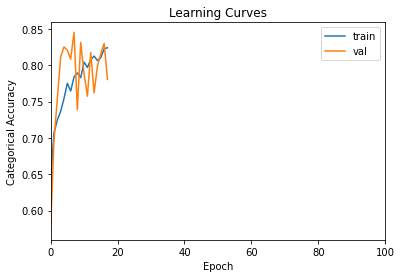

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.7841 - categorical_accuracy: 0.6352 - val_loss: 0.7776 - val_categorical_accuracy: 0.5765
Epoch 2/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5718 - categorical_accuracy: 0.6964 - val_loss: 0.5259 - val_categorical_accuracy: 0.7218
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5276 - categorical_accuracy: 0.7367 - val_loss: 0.4972 - val_categorical_accuracy: 0.7481
Epoch 4/100
182/182 [==============================] - 1s 6ms/step - loss: 0.5172 - categorical_accuracy: 0.7412 - val_loss: 0.4830 - val_categorical_accuracy: 0.7481
Epoch 5/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5049 - categorical_accuracy: 0.7493 - val_loss: 0.4761 - val_categorical_accuracy: 0.7496
Epoch 6/100
182/182 [==============================] - 1s 6ms/step - loss: 0.5004 - categorical_accuracy: 0.7546 - val_loss: 0.4544 - val_categorical_accuracy: 0.765

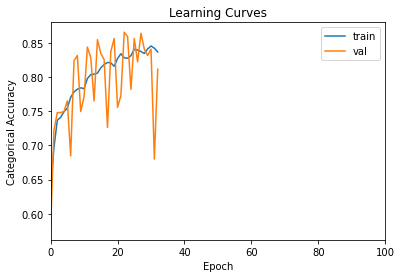

Epoch 1/100
182/182 [==============================] - 1s 6ms/step - loss: 0.7631 - categorical_accuracy: 0.6598 - val_loss: 1.0092 - val_categorical_accuracy: 0.5641
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5762 - categorical_accuracy: 0.7008 - val_loss: 0.5554 - val_categorical_accuracy: 0.7032
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5355 - categorical_accuracy: 0.7316 - val_loss: 0.4765 - val_categorical_accuracy: 0.7883
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5225 - categorical_accuracy: 0.7424 - val_loss: 0.4806 - val_categorical_accuracy: 0.7527
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5069 - categorical_accuracy: 0.7505 - val_loss: 0.4788 - val_categorical_accuracy: 0.7512
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 0.4875 - categorical_accuracy: 0.7628 - val_loss: 0.4513 - val_categorical_accuracy: 0.772

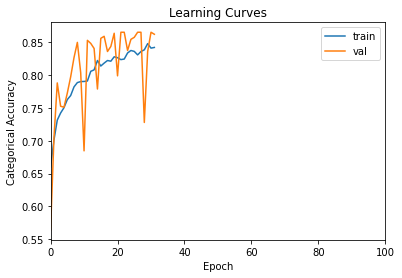

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.7842 - categorical_accuracy: 0.6413 - val_loss: 0.6323 - val_categorical_accuracy: 0.6321
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5716 - categorical_accuracy: 0.6993 - val_loss: 0.5136 - val_categorical_accuracy: 0.7512
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5352 - categorical_accuracy: 0.7299 - val_loss: 0.4862 - val_categorical_accuracy: 0.7728
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5259 - categorical_accuracy: 0.7297 - val_loss: 0.6534 - val_categorical_accuracy: 0.6476
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5089 - categorical_accuracy: 0.7484 - val_loss: 0.4523 - val_categorical_accuracy: 0.7759
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4784 - categorical_accuracy: 0.7687 - val_loss: 0.5626 - val_categorical_accuracy: 0.690

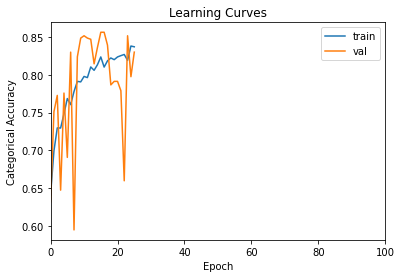

Model accuracy =  0.8655332326889038


In [95]:


accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='selu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6769 - categorical_accuracy: 0.6516 - val_loss: 0.5735 - val_categorical_accuracy: 0.6801
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5627 - categorical_accuracy: 0.7079 - val_loss: 0.5165 - val_categorical_accuracy: 0.7388
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5271 - categorical_accuracy: 0.7364 - val_loss: 0.5017 - val_categorical_accuracy: 0.7543
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5077 - categorical_accuracy: 0.7481 - val_loss: 0.4796 - val_categorical_accuracy: 0.7604
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4954 - categorical_accuracy: 0.7543 - val_loss: 0.4745 - val_categorical_accuracy: 0.7527
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4849 - categorical_accuracy: 0.7654 - val_loss: 0.4280 - val_categorical_accuracy: 0.820

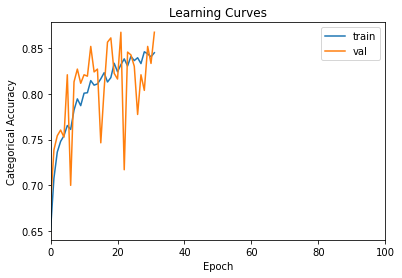

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6726 - categorical_accuracy: 0.6490 - val_loss: 0.5564 - val_categorical_accuracy: 0.7048
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5540 - categorical_accuracy: 0.7144 - val_loss: 0.5174 - val_categorical_accuracy: 0.7589
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5343 - categorical_accuracy: 0.7331 - val_loss: 0.7013 - val_categorical_accuracy: 0.5981
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5102 - categorical_accuracy: 0.7469 - val_loss: 0.4552 - val_categorical_accuracy: 0.8114
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4892 - categorical_accuracy: 0.7618 - val_loss: 0.6119 - val_categorical_accuracy: 0.6584
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4762 - categorical_accuracy: 0.7711 - val_loss: 0.5697 - val_categorical_accuracy: 0.689

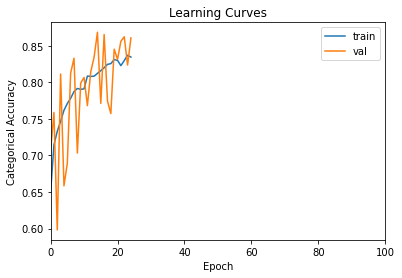

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6741 - categorical_accuracy: 0.6498 - val_loss: 0.5737 - val_categorical_accuracy: 0.7032
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5511 - categorical_accuracy: 0.7189 - val_loss: 0.5499 - val_categorical_accuracy: 0.6862
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5314 - categorical_accuracy: 0.7314 - val_loss: 0.5069 - val_categorical_accuracy: 0.7372
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5090 - categorical_accuracy: 0.7482 - val_loss: 0.4524 - val_categorical_accuracy: 0.8083
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5072 - categorical_accuracy: 0.7505 - val_loss: 0.5430 - val_categorical_accuracy: 0.7017
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4901 - categorical_accuracy: 0.7634 - val_loss: 0.4413 - val_categorical_accuracy: 0.799

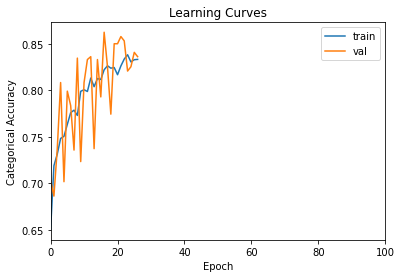

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6575 - categorical_accuracy: 0.6531 - val_loss: 0.5613 - val_categorical_accuracy: 0.6847
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5650 - categorical_accuracy: 0.7101 - val_loss: 0.5092 - val_categorical_accuracy: 0.7543
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5247 - categorical_accuracy: 0.7393 - val_loss: 0.7912 - val_categorical_accuracy: 0.5951
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5052 - categorical_accuracy: 0.7525 - val_loss: 0.5091 - val_categorical_accuracy: 0.7326
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4942 - categorical_accuracy: 0.7635 - val_loss: 0.7587 - val_categorical_accuracy: 0.6059
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4822 - categorical_accuracy: 0.7688 - val_loss: 0.4387 - val_categorical_accuracy: 0.799

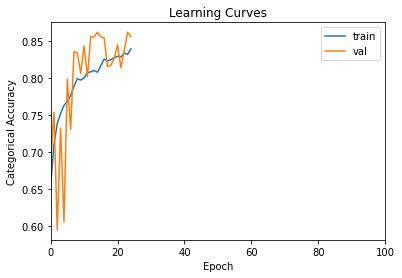

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.7099 - categorical_accuracy: 0.6516 - val_loss: 0.5646 - val_categorical_accuracy: 0.6862
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5551 - categorical_accuracy: 0.7110 - val_loss: 0.5371 - val_categorical_accuracy: 0.7048
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5383 - categorical_accuracy: 0.7252 - val_loss: 0.5091 - val_categorical_accuracy: 0.7311
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5069 - categorical_accuracy: 0.7405 - val_loss: 0.4686 - val_categorical_accuracy: 0.7512
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4947 - categorical_accuracy: 0.7565 - val_loss: 0.4864 - val_categorical_accuracy: 0.7434
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4820 - categorical_accuracy: 0.7646 - val_loss: 0.4463 - val_categorical_accuracy: 0.766

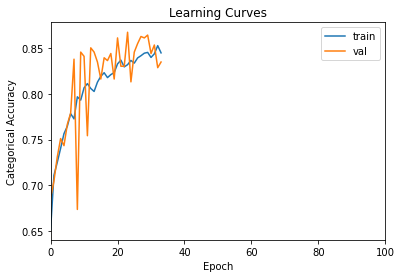

Model accuracy =  0.8670788407325745


In [96]:

accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='elu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
182/182 [==============================] - 2s 6ms/step - loss: 0.6269 - categorical_accuracy: 0.6402 - val_loss: 0.5959 - val_categorical_accuracy: 0.6461
Epoch 2/100
182/182 [==============================] - 1s 6ms/step - loss: 0.5878 - categorical_accuracy: 0.6861 - val_loss: 0.5803 - val_categorical_accuracy: 0.6662
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5618 - categorical_accuracy: 0.7050 - val_loss: 0.5337 - val_categorical_accuracy: 0.7342
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5416 - categorical_accuracy: 0.7268 - val_loss: 0.5110 - val_categorical_accuracy: 0.7434
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5240 - categorical_accuracy: 0.7335 - val_loss: 0.4875 - val_categorical_accuracy: 0.7805
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5016 - categorical_accuracy: 0.7493 - val_loss: 0.4570 - val_categorical_accuracy: 0.796

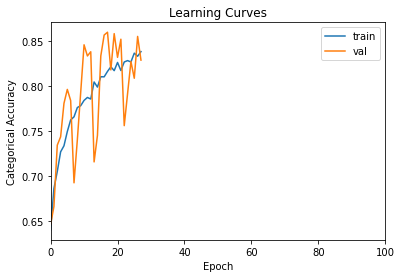

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6221 - categorical_accuracy: 0.6467 - val_loss: 0.5815 - val_categorical_accuracy: 0.6723
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5764 - categorical_accuracy: 0.6955 - val_loss: 0.5767 - val_categorical_accuracy: 0.6847
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5577 - categorical_accuracy: 0.7118 - val_loss: 0.5359 - val_categorical_accuracy: 0.7233
Epoch 4/100
182/182 [==============================] - 1s 7ms/step - loss: 0.5275 - categorical_accuracy: 0.7374 - val_loss: 0.4908 - val_categorical_accuracy: 0.7790categorical_accu
Epoch 5/100
182/182 [==============================] - 1s 6ms/step - loss: 0.5110 - categorical_accuracy: 0.7415 - val_loss: 0.4909 - val_categorical_accuracy: 0.7774
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4997 - categorical_accuracy: 0.7518 - val_loss: 0.4829 - val_categorical

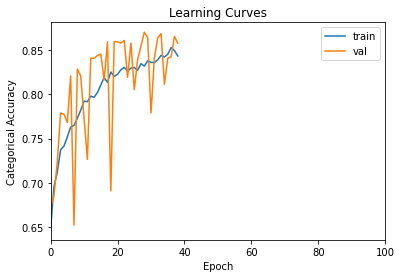

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6204 - categorical_accuracy: 0.6507 - val_loss: 0.5864 - val_categorical_accuracy: 0.6708
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5777 - categorical_accuracy: 0.6967 - val_loss: 0.6137 - val_categorical_accuracy: 0.6569
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5530 - categorical_accuracy: 0.7160 - val_loss: 0.5179 - val_categorical_accuracy: 0.7512
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5341 - categorical_accuracy: 0.7283 - val_loss: 0.4915 - val_categorical_accuracy: 0.7543
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5200 - categorical_accuracy: 0.7429 - val_loss: 0.4950 - val_categorical_accuracy: 0.7527
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4965 - categorical_accuracy: 0.7601 - val_loss: 0.6039 - val_categorical_accuracy: 0.673

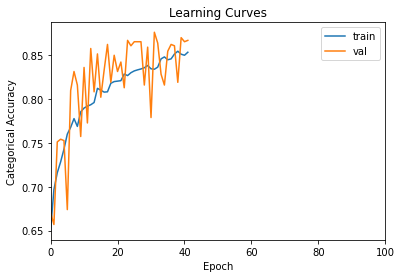

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6252 - categorical_accuracy: 0.6526 - val_loss: 0.5796 - val_categorical_accuracy: 0.6754
Epoch 2/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5704 - categorical_accuracy: 0.7015 - val_loss: 0.5400 - val_categorical_accuracy: 0.7249
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5436 - categorical_accuracy: 0.7225 - val_loss: 0.6485 - val_categorical_accuracy: 0.6105
Epoch 4/100
182/182 [==============================] - 1s 6ms/step - loss: 0.5280 - categorical_accuracy: 0.7335 - val_loss: 0.5097 - val_categorical_accuracy: 0.7264
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5047 - categorical_accuracy: 0.7555 - val_loss: 0.4555 - val_categorical_accuracy: 0.8006
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4901 - categorical_accuracy: 0.7601 - val_loss: 0.4640 - val_categorical_accuracy: 0.802

Epoch 50/100
182/182 [==============================] - 1s 5ms/step - loss: 0.3154 - categorical_accuracy: 0.8628 - val_loss: 0.3330 - val_categorical_accuracy: 0.8532
Epoch 51/100
182/182 [==============================] - 1s 5ms/step - loss: 0.3194 - categorical_accuracy: 0.8588 - val_loss: 0.5951 - val_categorical_accuracy: 0.6847
Epoch 52/100
182/182 [==============================] - 1s 5ms/step - loss: 0.3151 - categorical_accuracy: 0.8648 - val_loss: 0.3326 - val_categorical_accuracy: 0.8624
Epoch 53/100
182/182 [==============================] - 1s 4ms/step - loss: 0.3101 - categorical_accuracy: 0.8650 - val_loss: 0.4011 - val_categorical_accuracy: 0.8362
Epoch 54/100
182/182 [==============================] - 1s 5ms/step - loss: 0.3044 - categorical_accuracy: 0.8671 - val_loss: 0.3530 - val_categorical_accuracy: 0.8501
Epoch 55/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3319 - categorical_accuracy: 0.8702

Test accuracy: 0.870169997215271


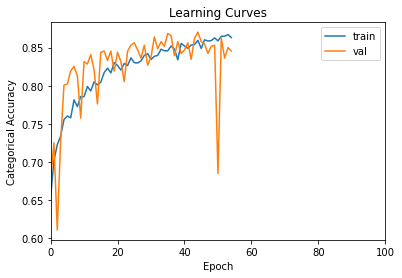

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.6197 - categorical_accuracy: 0.6509 - val_loss: 0.5777 - val_categorical_accuracy: 0.6770
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5810 - categorical_accuracy: 0.6847 - val_loss: 0.5557 - val_categorical_accuracy: 0.7002
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5575 - categorical_accuracy: 0.7141 - val_loss: 0.5478 - val_categorical_accuracy: 0.7017
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5375 - categorical_accuracy: 0.7208 - val_loss: 0.5449 - val_categorical_accuracy: 0.7048
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5137 - categorical_accuracy: 0.7445 - val_loss: 0.5114 - val_categorical_accuracy: 0.7403
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.4965 - categorical_accuracy: 0.7549 - val_loss: 0.4480 - val_categorical_accuracy: 0.796

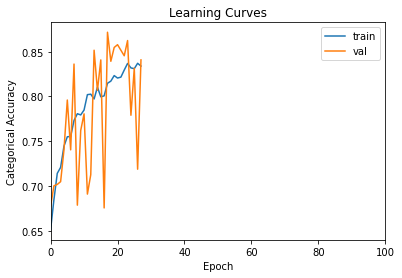

Model accuracy =  0.870169997215271


In [97]:

accuracy = []
for i in range(5):
    # Define Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_NN(model, epochs=100, patience=10)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### 1.2) Multilayer Perceptrons weighted <a name="MLPweight"></a>

In [98]:
def model_NN_weighted (model, epochs, patience, weight_men, weight_women):
    
    class_names = ['Male', 'Female']

    # Normalize the dataset
    X_train_n = X_train / 255.0

    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train_n, Y_train, 0)
    
    # Convert labels into one-hot-encoding format
    y_training_set = onehotencoding(y_training_set)
    y_testing_set = onehotencoding(y_testing_set)

    # Define patience
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=patience, restore_best_weights=True)
    
    # Define class weights for unbalanced datasets
    class_weight = {0.0: weight_men,
                1.0: weight_women}
    
    model.compile(optimizer='sgd',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])

    history = model.fit(x_training_set, y_training_set, epochs=epochs, callbacks=[callback], class_weight=class_weight, validation_data=(x_testing_set, y_testing_set))

    test_loss, test_acc = model.evaluate(x_testing_set,  y_testing_set, verbose=2)

    print('\nTest accuracy:', test_acc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(history.history['categorical_accuracy'], label='train')
    plt.plot(history.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 100])
    plt.legend()
    plt.show()
    
    return test_acc

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.3115 - categorical_accuracy: 0.6449 - val_loss: 0.6024 - val_categorical_accuracy: 0.6801
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2852 - categorical_accuracy: 0.6998 - val_loss: 0.5803 - val_categorical_accuracy: 0.6754
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2727 - categorical_accuracy: 0.7211 - val_loss: 0.5943 - val_categorical_accuracy: 0.6971
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2623 - categorical_accuracy: 0.7343 - val_loss: 0.4967 - val_categorical_accuracy: 0.7635
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2536 - categorical_accuracy: 0.7496 - val_loss: 0.4938 - val_categorical_accuracy: 0.7589
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2442 - categorical_accuracy: 0.7615 - val_loss: 0.4952 - val_categorical_accuracy: 0.752

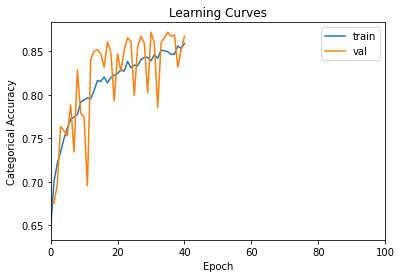

Epoch 1/100
182/182 [==============================] - 1s 6ms/step - loss: 0.3053 - categorical_accuracy: 0.6557 - val_loss: 0.6234 - val_categorical_accuracy: 0.6739
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2863 - categorical_accuracy: 0.6888 - val_loss: 0.6353 - val_categorical_accuracy: 0.6646
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2741 - categorical_accuracy: 0.7177 - val_loss: 0.5322 - val_categorical_accuracy: 0.7156
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2592 - categorical_accuracy: 0.7379 - val_loss: 0.5428 - val_categorical_accuracy: 0.7326
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2512 - categorical_accuracy: 0.7579 - val_loss: 0.5246 - val_categorical_accuracy: 0.7357
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2424 - categorical_accuracy: 0.7644 - val_loss: 0.4578 - val_categorical_accuracy: 0.820

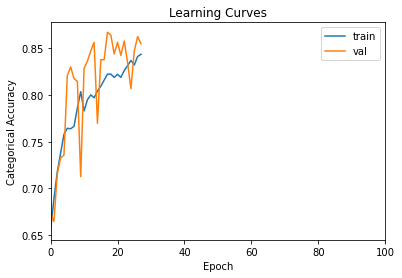

Epoch 1/100
182/182 [==============================] - 2s 7ms/step - loss: 0.2978 - categorical_accuracy: 0.6728 - val_loss: 0.5581 - val_categorical_accuracy: 0.7094
Epoch 2/100
182/182 [==============================] - 1s 6ms/step - loss: 0.2740 - categorical_accuracy: 0.7178 - val_loss: 0.5223 - val_categorical_accuracy: 0.7372
Epoch 3/100
182/182 [==============================] - 1s 6ms/step - loss: 0.2624 - categorical_accuracy: 0.7326 - val_loss: 0.4886 - val_categorical_accuracy: 0.7743
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2521 - categorical_accuracy: 0.7494 - val_loss: 0.5175 - val_categorical_accuracy: 0.7156
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2382 - categorical_accuracy: 0.7649 - val_loss: 0.4387 - val_categorical_accuracy: 0.8161
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 0.2262 - categorical_accuracy: 0.7769 - val_loss: 0.4583 - val_categorical_accuracy: 0.775

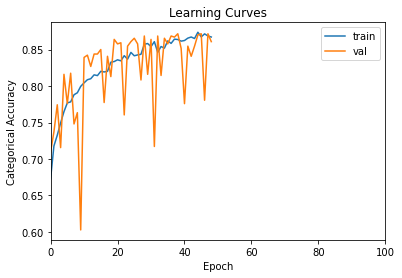

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.3047 - categorical_accuracy: 0.6531 - val_loss: 0.6182 - val_categorical_accuracy: 0.6522
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2824 - categorical_accuracy: 0.7017 - val_loss: 0.5605 - val_categorical_accuracy: 0.6893
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2706 - categorical_accuracy: 0.7223 - val_loss: 0.5193 - val_categorical_accuracy: 0.7326
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2552 - categorical_accuracy: 0.7455 - val_loss: 0.5169 - val_categorical_accuracy: 0.7326
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2432 - categorical_accuracy: 0.7604 - val_loss: 0.5092 - val_categorical_accuracy: 0.7264
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2403 - categorical_accuracy: 0.7625 - val_loss: 0.4409 - val_categorical_accuracy: 0.809

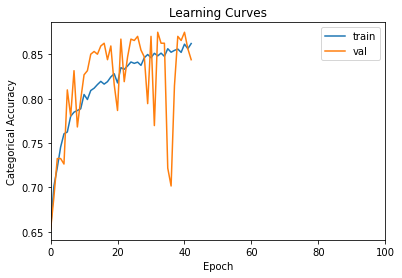

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.3009 - categorical_accuracy: 0.6624 - val_loss: 0.5827 - val_categorical_accuracy: 0.6615
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2794 - categorical_accuracy: 0.7043 - val_loss: 0.5952 - val_categorical_accuracy: 0.6352
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2669 - categorical_accuracy: 0.7208 - val_loss: 0.5155 - val_categorical_accuracy: 0.7342
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2557 - categorical_accuracy: 0.7441 - val_loss: 0.5312 - val_categorical_accuracy: 0.7141
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2501 - categorical_accuracy: 0.7451 - val_loss: 0.5228 - val_categorical_accuracy: 0.7202
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.2437 - categorical_accuracy: 0.7555 - val_loss: 0.4808 - val_categorical_accuracy: 0.746

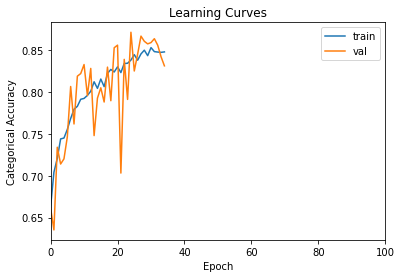

Model accuracy =  0.8717156052589417


In [99]:

accuracy = []
for i in range(5):
    # Define Model

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_NN_weighted(model, epochs=100, patience=10, weight_men=0.5720, weight_women=0.4279) 
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

Epoch 1/100
182/182 [==============================] - 8s 41ms/step - loss: 0.3106 - categorical_accuracy: 0.6476 - val_loss: 0.5417 - val_categorical_accuracy: 0.7079
Epoch 2/100
182/182 [==============================] - 7s 39ms/step - loss: 0.2710 - categorical_accuracy: 0.7099 - val_loss: 0.4995 - val_categorical_accuracy: 0.7620
Epoch 3/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2527 - categorical_accuracy: 0.7412 - val_loss: 0.4934 - val_categorical_accuracy: 0.7465
Epoch 4/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2382 - categorical_accuracy: 0.7642 - val_loss: 0.4489 - val_categorical_accuracy: 0.8083
Epoch 5/100
182/182 [==============================] - 8s 42ms/step - loss: 0.2429 - categorical_accuracy: 0.7544 - val_loss: 0.4388 - val_categorical_accuracy: 0.8068
Epoch 6/100
182/182 [==============================] - 8s 45ms/step - loss: 0.2213 - categorical_accuracy: 0.7855 - val_loss: 0.4283 - val_categorical_accuracy:

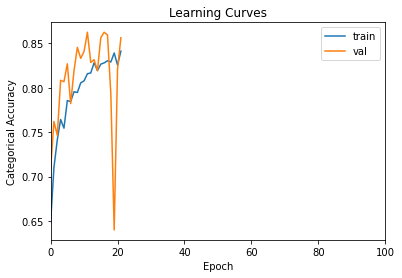

Epoch 1/100
182/182 [==============================] - 8s 40ms/step - loss: 0.3075 - categorical_accuracy: 0.6524 - val_loss: 0.5434 - val_categorical_accuracy: 0.7218
Epoch 2/100
182/182 [==============================] - 7s 41ms/step - loss: 0.2639 - categorical_accuracy: 0.7208 - val_loss: 0.5142 - val_categorical_accuracy: 0.7450
Epoch 3/100
182/182 [==============================] - 8s 44ms/step - loss: 0.2523 - categorical_accuracy: 0.7409 - val_loss: 0.5220 - val_categorical_accuracy: 0.7357
Epoch 4/100
182/182 [==============================] - 7s 39ms/step - loss: 0.2478 - categorical_accuracy: 0.7532 - val_loss: 0.5006 - val_categorical_accuracy: 0.7450
Epoch 5/100
182/182 [==============================] - 7s 39ms/step - loss: 0.2332 - categorical_accuracy: 0.7620 - val_loss: 0.4936 - val_categorical_accuracy: 0.7481
Epoch 6/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2231 - categorical_accuracy: 0.7774 - val_loss: 0.9191 - val_categorical_accuracy:

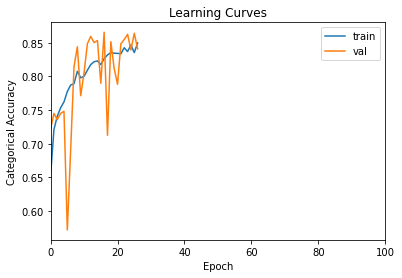

Epoch 1/100
182/182 [==============================] - 8s 40ms/step - loss: 0.3086 - categorical_accuracy: 0.6583 - val_loss: 0.5886 - val_categorical_accuracy: 0.6538
Epoch 2/100
182/182 [==============================] - 7s 39ms/step - loss: 0.2713 - categorical_accuracy: 0.7168 - val_loss: 0.4962 - val_categorical_accuracy: 0.7620
Epoch 3/100
182/182 [==============================] - 7s 39ms/step - loss: 0.2530 - categorical_accuracy: 0.7417 - val_loss: 0.4953 - val_categorical_accuracy: 0.7527
Epoch 4/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2432 - categorical_accuracy: 0.7575 - val_loss: 0.4463 - val_categorical_accuracy: 0.8130
Epoch 5/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2330 - categorical_accuracy: 0.7575 - val_loss: 0.4596 - val_categorical_accuracy: 0.7666
Epoch 6/100
182/182 [==============================] - 9s 48ms/step - loss: 0.2291 - categorical_accuracy: 0.7786 - val_loss: 0.4225 - val_categorical_accuracy:

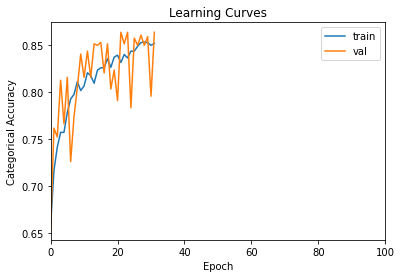

Epoch 1/100
182/182 [==============================] - 8s 41ms/step - loss: 0.3112 - categorical_accuracy: 0.6512 - val_loss: 0.5587 - val_categorical_accuracy: 0.7187
Epoch 2/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2704 - categorical_accuracy: 0.7093 - val_loss: 0.5007 - val_categorical_accuracy: 0.7450
Epoch 3/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2517 - categorical_accuracy: 0.7453 - val_loss: 0.5007 - val_categorical_accuracy: 0.7434
Epoch 4/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2369 - categorical_accuracy: 0.7699 - val_loss: 0.4659 - val_categorical_accuracy: 0.7713
Epoch 5/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2298 - categorical_accuracy: 0.7700 - val_loss: 0.4244 - val_categorical_accuracy: 0.8377
Epoch 6/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2275 - categorical_accuracy: 0.7755 - val_loss: 0.4496 - val_categorical_accuracy:

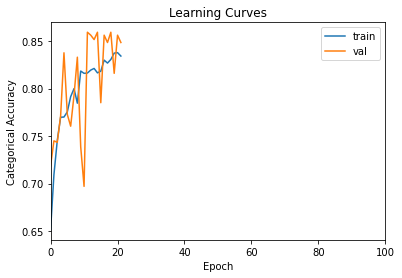

Epoch 1/100
182/182 [==============================] - 8s 42ms/step - loss: 0.3047 - categorical_accuracy: 0.6651 - val_loss: 0.5854 - val_categorical_accuracy: 0.7048
Epoch 2/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2667 - categorical_accuracy: 0.7280 - val_loss: 0.5009 - val_categorical_accuracy: 0.7558
Epoch 3/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2570 - categorical_accuracy: 0.7331 - val_loss: 0.5151 - val_categorical_accuracy: 0.7403
Epoch 4/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2425 - categorical_accuracy: 0.7613 - val_loss: 0.5153 - val_categorical_accuracy: 0.7326
Epoch 5/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2379 - categorical_accuracy: 0.7565 - val_loss: 0.6645 - val_categorical_accuracy: 0.6600
Epoch 6/100
182/182 [==============================] - 7s 40ms/step - loss: 0.2202 - categorical_accuracy: 0.7884 - val_loss: 0.4245 - val_categorical_accuracy:

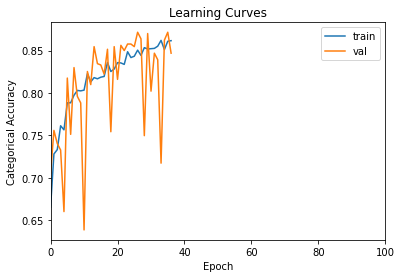

Model accuracy =  0.8639876246452332


In [100]:
# Define Model

accuracy = []
for i in range(5):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3000, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_NN_weighted(model, epochs=100, patience=10, weight_men=0.6, weight_women=0.4) 
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)



### 1.3) Multilayer Perceptrons Focal Loss <a name="MLPloss"></a>

In [101]:
def model_MLP_loss (model, epochs, patience, alpha, gamma):

    class_names = ['Male', 'Female']

    # Normalize the dataset
    X_train_n = X_train / 255.0

    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train_n, Y_train, 0)
    
    # Convert labels into one-hot-encoding format
    y_training_set = onehotencoding(y_training_set)
    y_testing_set = onehotencoding(y_testing_set)

    # Define patience
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=patience, restore_best_weights=True)
    
    
    model.compile(optimizer='sgd',
                  loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=alpha, gamma=gamma),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])

    history = model.fit(x_training_set, y_training_set, epochs=epochs, callbacks=[callback], validation_data=(x_testing_set, y_testing_set))

    test_loss, test_acc = model.evaluate(x_testing_set,  y_testing_set, verbose=2)

    print('\nTest accuracy:', test_acc)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(history.history['categorical_accuracy'], label='train')
    plt.plot(history.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 100])
    plt.legend()
    plt.show()
    
    return test_acc

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.3818 - categorical_accuracy: 0.6182 - val_loss: 0.1245 - val_categorical_accuracy: 0.6677
Epoch 2/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1235 - categorical_accuracy: 0.6871 - val_loss: 0.1164 - val_categorical_accuracy: 0.7202
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1194 - categorical_accuracy: 0.7072 - val_loss: 0.1128 - val_categorical_accuracy: 0.7172
Epoch 4/100
182/182 [==============================] - 1s 6ms/step - loss: 0.1169 - categorical_accuracy: 0.7227 - val_loss: 0.1104 - val_categorical_accuracy: 0.7264
Epoch 5/100
182/182 [==============================] - 1s 6ms/step - loss: 0.1159 - categorical_accuracy: 0.7113 - val_loss: 0.1162 - val_categorical_accuracy: 0.7156
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1120 - categorical_accuracy: 0.7378 - val_loss: 0.1143 - val_categorical_accuracy: 0.711

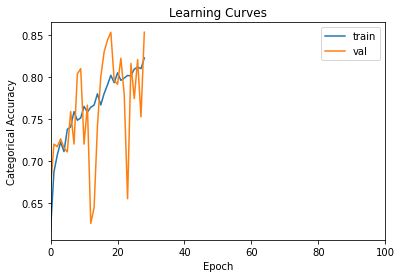

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1794 - categorical_accuracy: 0.5732 - val_loss: 0.1262 - val_categorical_accuracy: 0.6631
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1335 - categorical_accuracy: 0.6419 - val_loss: 0.1317 - val_categorical_accuracy: 0.6352
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1307 - categorical_accuracy: 0.6543 - val_loss: 0.1290 - val_categorical_accuracy: 0.6600
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1261 - categorical_accuracy: 0.6874 - val_loss: 0.1176 - val_categorical_accuracy: 0.7187
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1313 - categorical_accuracy: 0.6541 - val_loss: 0.1292 - val_categorical_accuracy: 0.6553
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1271 - categorical_accuracy: 0.6655 - val_loss: 0.1223 - val_categorical_accuracy: 0.684

Epoch 50/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0752 - categorical_accuracy: 0.8497 - val_loss: 0.0874 - val_categorical_accuracy: 0.8315
Epoch 51/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0729 - categorical_accuracy: 0.8516 - val_loss: 0.0760 - val_categorical_accuracy: 0.8485
Epoch 52/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0742 - categorical_accuracy: 0.8535 - val_loss: 0.0735 - val_categorical_accuracy: 0.8733
Epoch 53/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0749 - categorical_accuracy: 0.8502 - val_loss: 0.0811 - val_categorical_accuracy: 0.8408
Epoch 54/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0726 - categorical_accuracy: 0.8520 - val_loss: 0.0781 - val_categorical_accuracy: 0.8423
Epoch 55/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0746 - categorical_accuracy: 0.8494 - val_loss: 0.0731 - val_categorical_accuracy:

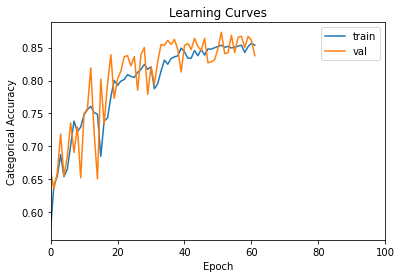

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 3.8137 - categorical_accuracy: 0.4319 - val_loss: 3.8562 - val_categorical_accuracy: 0.4513
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 3.8562 - categorical_accuracy: 0.4290 - val_loss: 3.8562 - val_categorical_accuracy: 0.4513
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 3.8562 - categorical_accuracy: 0.4290 - val_loss: 3.8562 - val_categorical_accuracy: 0.4513
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 3.8562 - categorical_accuracy: 0.4290 - val_loss: 3.8562 - val_categorical_accuracy: 0.4513
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 3.8562 - categorical_accuracy: 0.4290 - val_loss: 3.8562 - val_categorical_accuracy: 0.4513
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 3.8562 - categorical_accuracy: 0.4290 - val_loss: 3.8562 - val_categorical_accuracy: 0.451

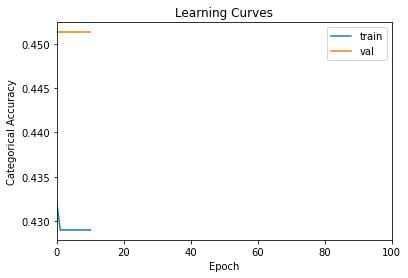

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1750 - categorical_accuracy: 0.6105 - val_loss: 0.1371 - val_categorical_accuracy: 0.6321
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1256 - categorical_accuracy: 0.6818 - val_loss: 0.1227 - val_categorical_accuracy: 0.6646
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1194 - categorical_accuracy: 0.7069 - val_loss: 0.1185 - val_categorical_accuracy: 0.6909
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1171 - categorical_accuracy: 0.7081 - val_loss: 0.1113 - val_categorical_accuracy: 0.7388
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1140 - categorical_accuracy: 0.7345 - val_loss: 0.1008 - val_categorical_accuracy: 0.7728
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1117 - categorical_accuracy: 0.7369 - val_loss: 0.0961 - val_categorical_accuracy: 0.765

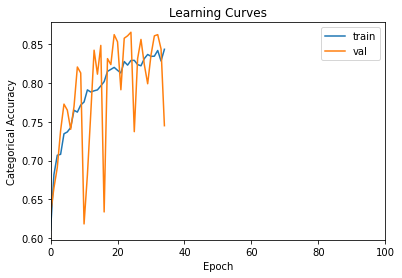

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1729 - categorical_accuracy: 0.6081 - val_loss: 0.1288 - val_categorical_accuracy: 0.6569
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1279 - categorical_accuracy: 0.6674 - val_loss: 0.1205 - val_categorical_accuracy: 0.6893
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1207 - categorical_accuracy: 0.6912 - val_loss: 0.1207 - val_categorical_accuracy: 0.6723
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1199 - categorical_accuracy: 0.6936 - val_loss: 0.1158 - val_categorical_accuracy: 0.6986
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1153 - categorical_accuracy: 0.7177 - val_loss: 0.1581 - val_categorical_accuracy: 0.6445
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1125 - categorical_accuracy: 0.7393 - val_loss: 0.1125 - val_categorical_accuracy: 0.706

Epoch 50/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0747 - categorical_accuracy: 0.8420 - val_loss: 0.0836 - val_categorical_accuracy: 0.8377
Epoch 51/100
182/182 [==============================] - ETA: 0s - loss: 0.0737 - categorical_accuracy: 0.85 - ETA: 0s - loss: 0.0737 - categorical_accuracy: 0.84 - 1s 5ms/step - loss: 0.0734 - categorical_accuracy: 0.8499 - val_loss: 0.0750 - val_categorical_accuracy: 0.8501
Epoch 52/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0744 - categorical_accuracy: 0.8446 - val_loss: 0.0788 - val_categorical_accuracy: 0.8547
21/21 - 0s - loss: 0.0754 - categorical_accuracy: 0.8717

Test accuracy: 0.8717156052589417


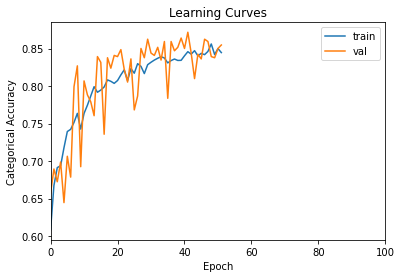

Model accuracy =  0.8655332326889038


In [102]:
# Define Model

accuracy = []
for i in range(5):
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_MLP_loss(model, epochs=100, patience=10, alpha=0.25, gamma=2.0)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)
    


Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.2026 - categorical_accuracy: 0.5710 - val_loss: 0.1652 - val_categorical_accuracy: 0.6306
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1644 - categorical_accuracy: 0.6074 - val_loss: 0.1713 - val_categorical_accuracy: 0.5626
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1698 - categorical_accuracy: 0.5811 - val_loss: 0.1643 - val_categorical_accuracy: 0.6244
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1621 - categorical_accuracy: 0.6397 - val_loss: 0.1559 - val_categorical_accuracy: 0.6615
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1546 - categorical_accuracy: 0.6672 - val_loss: 0.1484 - val_categorical_accuracy: 0.7172
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1500 - categorical_accuracy: 0.6940 - val_loss: 0.1531 - val_categorical_accuracy: 0.653

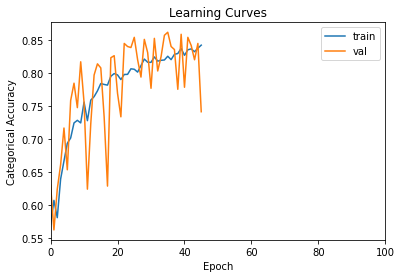

Epoch 1/100
182/182 [==============================] - 1s 6ms/step - loss: 0.3064 - categorical_accuracy: 0.5707 - val_loss: 0.1614 - val_categorical_accuracy: 0.5626
Epoch 2/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1541 - categorical_accuracy: 0.6526 - val_loss: 0.1457 - val_categorical_accuracy: 0.6847
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1498 - categorical_accuracy: 0.6809 - val_loss: 0.1444 - val_categorical_accuracy: 0.7002
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1528 - categorical_accuracy: 0.6402 - val_loss: 0.1482 - val_categorical_accuracy: 0.6847
Epoch 5/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1443 - categorical_accuracy: 0.6957 - val_loss: 0.1338 - val_categorical_accuracy: 0.7172
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1360 - categorical_accuracy: 0.7257 - val_loss: 0.1290 - val_categorical_accuracy: 0.745

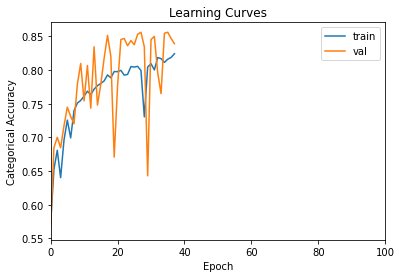

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1935 - categorical_accuracy: 0.6181 - val_loss: 0.1587 - val_categorical_accuracy: 0.6507
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1501 - categorical_accuracy: 0.6765 - val_loss: 0.1438 - val_categorical_accuracy: 0.6801
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1468 - categorical_accuracy: 0.6917 - val_loss: 0.1402 - val_categorical_accuracy: 0.7280
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1416 - categorical_accuracy: 0.7129 - val_loss: 0.1380 - val_categorical_accuracy: 0.7249
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1368 - categorical_accuracy: 0.7318 - val_loss: 0.1279 - val_categorical_accuracy: 0.7604
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1549 - categorical_accuracy: 0.6466 - val_loss: 0.1298 - val_categorical_accuracy: 0.766

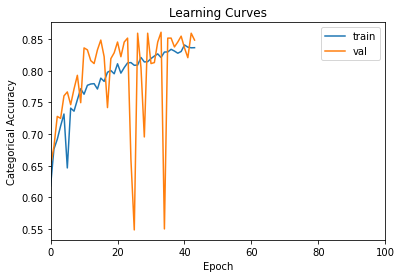

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1879 - categorical_accuracy: 0.6153 - val_loss: 0.1586 - val_categorical_accuracy: 0.6631
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1514 - categorical_accuracy: 0.6686 - val_loss: 0.1441 - val_categorical_accuracy: 0.6801
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1443 - categorical_accuracy: 0.7029 - val_loss: 0.1417 - val_categorical_accuracy: 0.7249
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1418 - categorical_accuracy: 0.7103 - val_loss: 0.1347 - val_categorical_accuracy: 0.7311
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1384 - categorical_accuracy: 0.7192 - val_loss: 0.1636 - val_categorical_accuracy: 0.6785
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1403 - categorical_accuracy: 0.7058 - val_loss: 0.1316 - val_categorical_accuracy: 0.738

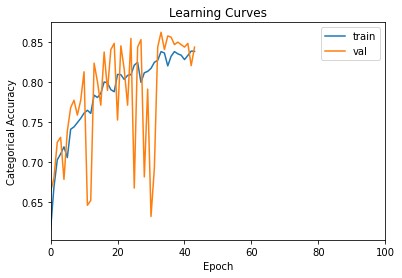

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1940 - categorical_accuracy: 0.6062 - val_loss: 0.1549 - val_categorical_accuracy: 0.6445
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1519 - categorical_accuracy: 0.6706 - val_loss: 0.1437 - val_categorical_accuracy: 0.6893
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1449 - categorical_accuracy: 0.7002 - val_loss: 0.1483 - val_categorical_accuracy: 0.6862
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1418 - categorical_accuracy: 0.7079 - val_loss: 0.1360 - val_categorical_accuracy: 0.7141
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1423 - categorical_accuracy: 0.7089 - val_loss: 0.1476 - val_categorical_accuracy: 0.7172
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1355 - categorical_accuracy: 0.7364 - val_loss: 0.1203 - val_categorical_accuracy: 0.760

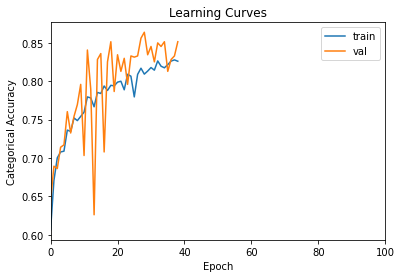

Model accuracy =  0.8624420166015625


In [103]:
# Define Model

accuracy = []
for i in range(5):
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_MLP_loss(model, epochs=100, patience=10, alpha=0.50, gamma=2.0)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)
    


Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1255 - categorical_accuracy: 0.6318 - val_loss: 0.0750 - val_categorical_accuracy: 0.6708
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0755 - categorical_accuracy: 0.6881 - val_loss: 0.0732 - val_categorical_accuracy: 0.6816
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0729 - categorical_accuracy: 0.7072 - val_loss: 0.0677 - val_categorical_accuracy: 0.7527
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0700 - categorical_accuracy: 0.7276 - val_loss: 0.0657 - val_categorical_accuracy: 0.7666
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0680 - categorical_accuracy: 0.7438 - val_loss: 0.0618 - val_categorical_accuracy: 0.7589
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0671 - categorical_accuracy: 0.7539 - val_loss: 0.0827 - val_categorical_accuracy: 0.664

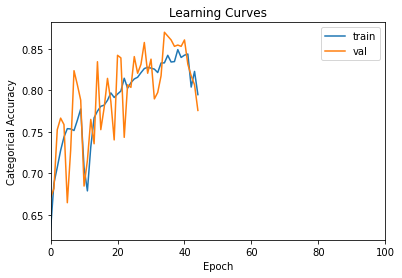

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0929 - categorical_accuracy: 0.6328 - val_loss: 0.0885 - val_categorical_accuracy: 0.6074
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0761 - categorical_accuracy: 0.6893 - val_loss: 0.0736 - val_categorical_accuracy: 0.7156
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0735 - categorical_accuracy: 0.7098 - val_loss: 0.0672 - val_categorical_accuracy: 0.7573
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0725 - categorical_accuracy: 0.7151 - val_loss: 0.0668 - val_categorical_accuracy: 0.7604
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0687 - categorical_accuracy: 0.7472 - val_loss: 0.0684 - val_categorical_accuracy: 0.7790
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0672 - categorical_accuracy: 0.7498 - val_loss: 0.0609 - val_categorical_accuracy: 0.813

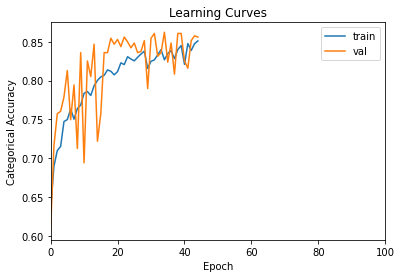

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0861 - categorical_accuracy: 0.6368 - val_loss: 0.0776 - val_categorical_accuracy: 0.6785
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0770 - categorical_accuracy: 0.6856 - val_loss: 0.0761 - val_categorical_accuracy: 0.6893
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0743 - categorical_accuracy: 0.7058 - val_loss: 0.0685 - val_categorical_accuracy: 0.7450
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0716 - categorical_accuracy: 0.7166 - val_loss: 0.0669 - val_categorical_accuracy: 0.7666
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0699 - categorical_accuracy: 0.7276 - val_loss: 0.0752 - val_categorical_accuracy: 0.6708
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0668 - categorical_accuracy: 0.7539 - val_loss: 0.0608 - val_categorical_accuracy: 0.803

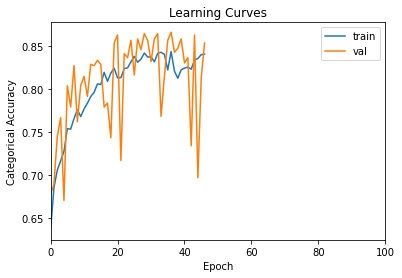

Epoch 1/100
182/182 [==============================] - 1s 6ms/step - loss: 0.1596 - categorical_accuracy: 0.6325 - val_loss: 0.0774 - val_categorical_accuracy: 0.6476
Epoch 2/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0764 - categorical_accuracy: 0.6876 - val_loss: 0.0725 - val_categorical_accuracy: 0.7110
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0745 - categorical_accuracy: 0.7029 - val_loss: 0.0696 - val_categorical_accuracy: 0.7187
Epoch 4/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0725 - categorical_accuracy: 0.7135 - val_loss: 0.0675 - val_categorical_accuracy: 0.7450
Epoch 5/100
182/182 [==============================] - ETA: 0s - loss: 0.0713 - categorical_accuracy: 0.72 - 1s 5ms/step - loss: 0.0713 - categorical_accuracy: 0.7261 - val_loss: 0.0679 - val_categorical_accuracy: 0.7434
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0672 - categorical_accuracy: 0.748

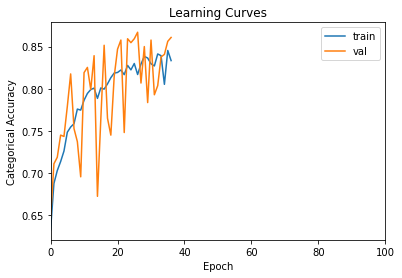

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0964 - categorical_accuracy: 0.6275 - val_loss: 0.0960 - val_categorical_accuracy: 0.6121
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0767 - categorical_accuracy: 0.6892 - val_loss: 0.0770 - val_categorical_accuracy: 0.6708
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0729 - categorical_accuracy: 0.7111 - val_loss: 0.0741 - val_categorical_accuracy: 0.7141
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0705 - categorical_accuracy: 0.7281 - val_loss: 0.1015 - val_categorical_accuracy: 0.5781
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0694 - categorical_accuracy: 0.7342 - val_loss: 0.0635 - val_categorical_accuracy: 0.7867
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0674 - categorical_accuracy: 0.7496 - val_loss: 0.0730 - val_categorical_accuracy: 0.690

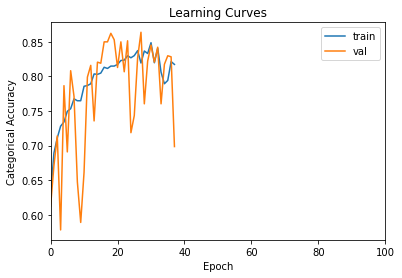

Model accuracy =  0.8655332326889038


In [104]:
# Define Model

accuracy = []
for i in range(5):
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_MLP_loss(model, epochs=100, patience=10, alpha=0.10, gamma=2.0)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)
    


Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.7165 - categorical_accuracy: 0.6127 - val_loss: 0.0901 - val_categorical_accuracy: 0.6553
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0894 - categorical_accuracy: 0.6715 - val_loss: 0.0882 - val_categorical_accuracy: 0.6955
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0864 - categorical_accuracy: 0.6972 - val_loss: 0.0897 - val_categorical_accuracy: 0.6522
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0825 - categorical_accuracy: 0.7201 - val_loss: 0.0777 - val_categorical_accuracy: 0.7264
Epoch 5/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0799 - categorical_accuracy: 0.7323 - val_loss: 0.1115 - val_categorical_accuracy: 0.5580
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0790 - categorical_accuracy: 0.7414 - val_loss: 0.1114 - val_categorical_accuracy: 0.554

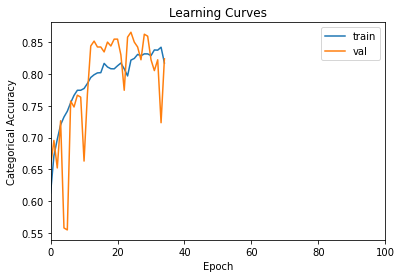

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1470 - categorical_accuracy: 0.5916 - val_loss: 0.1035 - val_categorical_accuracy: 0.6275
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0903 - categorical_accuracy: 0.6710 - val_loss: 0.0852 - val_categorical_accuracy: 0.6986
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0862 - categorical_accuracy: 0.7050 - val_loss: 0.1028 - val_categorical_accuracy: 0.6275
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0855 - categorical_accuracy: 0.7027 - val_loss: 0.0812 - val_categorical_accuracy: 0.7125
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0836 - categorical_accuracy: 0.7117 - val_loss: 0.1203 - val_categorical_accuracy: 0.4529
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0843 - categorical_accuracy: 0.7086 - val_loss: 0.0778 - val_categorical_accuracy: 0.749

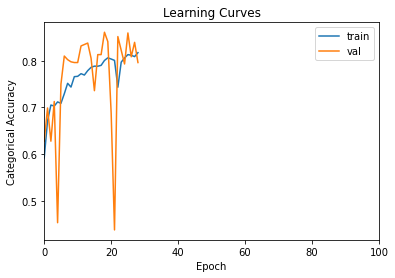

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1038 - categorical_accuracy: 0.6400 - val_loss: 0.0892 - val_categorical_accuracy: 0.6507
Epoch 2/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0875 - categorical_accuracy: 0.6880 - val_loss: 0.0825 - val_categorical_accuracy: 0.6924
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0845 - categorical_accuracy: 0.7019 - val_loss: 0.0821 - val_categorical_accuracy: 0.7032
Epoch 4/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0865 - categorical_accuracy: 0.7029 - val_loss: 0.0792 - val_categorical_accuracy: 0.7450
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0837 - categorical_accuracy: 0.7185 - val_loss: 0.0819 - val_categorical_accuracy: 0.7496
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0812 - categorical_accuracy: 0.7199 - val_loss: 0.0726 - val_categorical_accuracy: 0.777

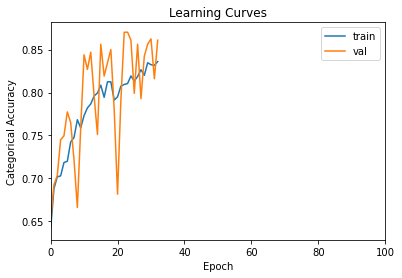

Epoch 1/100
182/182 [==============================] - 1s 6ms/step - loss: 0.1226 - categorical_accuracy: 0.6256 - val_loss: 0.0887 - val_categorical_accuracy: 0.6553
Epoch 2/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0888 - categorical_accuracy: 0.6804 - val_loss: 0.0849 - val_categorical_accuracy: 0.6955
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0847 - categorical_accuracy: 0.7063 - val_loss: 0.0787 - val_categorical_accuracy: 0.7280
Epoch 4/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0842 - categorical_accuracy: 0.7081 - val_loss: 0.1252 - val_categorical_accuracy: 0.5100
Epoch 5/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0801 - categorical_accuracy: 0.7331 - val_loss: 0.0710 - val_categorical_accuracy: 0.7728
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 0.0794 - categorical_accuracy: 0.7436 - val_loss: 0.0735 - val_categorical_accuracy: 0.769

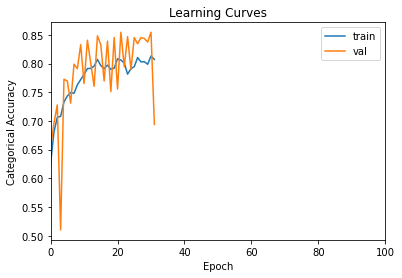

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1430 - categorical_accuracy: 0.6205 - val_loss: 0.0877 - val_categorical_accuracy: 0.6723
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0882 - categorical_accuracy: 0.6924 - val_loss: 0.0832 - val_categorical_accuracy: 0.6893
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0848 - categorical_accuracy: 0.7125 - val_loss: 0.0809 - val_categorical_accuracy: 0.7110
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0836 - categorical_accuracy: 0.7129 - val_loss: 0.0766 - val_categorical_accuracy: 0.7512
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0825 - categorical_accuracy: 0.7211 - val_loss: 0.0736 - val_categorical_accuracy: 0.7666
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.0784 - categorical_accuracy: 0.7436 - val_loss: 0.0821 - val_categorical_accuracy: 0.690

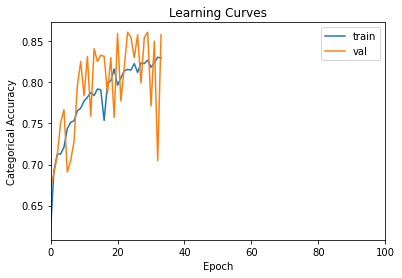

Model accuracy =  0.8608964681625366


In [105]:
# Define Model


accuracy = []
for i in range(5):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_MLP_loss(model, epochs=100, patience=10, alpha=0.25, gamma=2.5)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)



Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 3.0742 - categorical_accuracy: 0.4262 - val_loss: 3.0498 - val_categorical_accuracy: 0.4374
Epoch 2/100
182/182 [==============================] - 1s 5ms/step - loss: 3.0666 - categorical_accuracy: 0.4269 - val_loss: 3.0498 - val_categorical_accuracy: 0.4374
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 3.0666 - categorical_accuracy: 0.4269 - val_loss: 3.0498 - val_categorical_accuracy: 0.4374
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 3.0666 - categorical_accuracy: 0.4269 - val_loss: 3.0498 - val_categorical_accuracy: 0.4374
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 3.0666 - categorical_accuracy: 0.4269 - val_loss: 3.0498 - val_categorical_accuracy: 0.4374
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 3.0666 - categorical_accuracy: 0.4269 - val_loss: 3.0498 - val_categorical_accuracy: 0.437

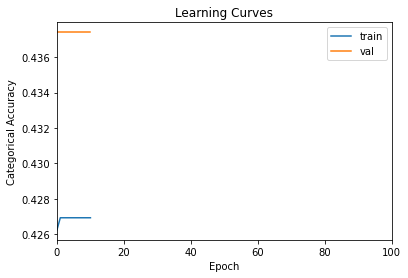

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.8829 - categorical_accuracy: 0.6224 - val_loss: 0.2043 - val_categorical_accuracy: 0.6368
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1923 - categorical_accuracy: 0.6861 - val_loss: 0.1908 - val_categorical_accuracy: 0.6692
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1846 - categorical_accuracy: 0.7041 - val_loss: 0.1886 - val_categorical_accuracy: 0.6971
Epoch 4/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1779 - categorical_accuracy: 0.7220 - val_loss: 0.1748 - val_categorical_accuracy: 0.7063
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1837 - categorical_accuracy: 0.7075 - val_loss: 0.1644 - val_categorical_accuracy: 0.7558
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1687 - categorical_accuracy: 0.7376 - val_loss: 0.1679 - val_categorical_accuracy: 0.735

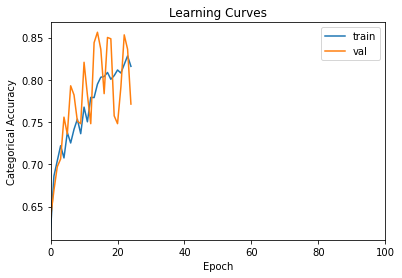

Epoch 1/100
182/182 [==============================] - 1s 6ms/step - loss: 0.2665 - categorical_accuracy: 0.6139 - val_loss: 0.1923 - val_categorical_accuracy: 0.6692
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1928 - categorical_accuracy: 0.6862 - val_loss: 0.1854 - val_categorical_accuracy: 0.6816
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.1920 - categorical_accuracy: 0.6694 - val_loss: 0.1797 - val_categorical_accuracy: 0.6924
Epoch 4/100
182/182 [==============================] - 1s 7ms/step - loss: 0.1838 - categorical_accuracy: 0.7043 - val_loss: 0.1710 - val_categorical_accuracy: 0.7342
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1828 - categorical_accuracy: 0.7108 - val_loss: 0.1690 - val_categorical_accuracy: 0.7496
Epoch 6/100
182/182 [==============================] - 1s 6ms/step - loss: 0.1838 - categorical_accuracy: 0.6844 - val_loss: 0.2218 - val_categorical_accuracy: 0.456

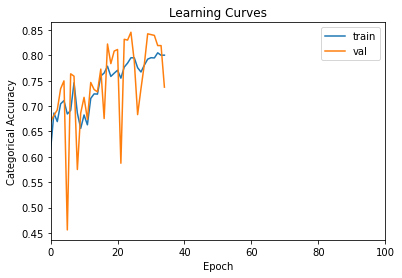

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.2626 - categorical_accuracy: 0.6306 - val_loss: 0.1924 - val_categorical_accuracy: 0.6584
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1937 - categorical_accuracy: 0.6756 - val_loss: 0.1886 - val_categorical_accuracy: 0.6723
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1862 - categorical_accuracy: 0.6996 - val_loss: 0.1959 - val_categorical_accuracy: 0.7434
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1803 - categorical_accuracy: 0.7125 - val_loss: 0.1664 - val_categorical_accuracy: 0.7465
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1810 - categorical_accuracy: 0.7146 - val_loss: 0.1777 - val_categorical_accuracy: 0.7048
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1822 - categorical_accuracy: 0.7019 - val_loss: 0.1599 - val_categorical_accuracy: 0.748

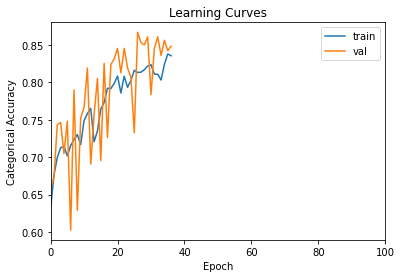

Epoch 1/100
182/182 [==============================] - 1s 5ms/step - loss: 0.2262 - categorical_accuracy: 0.6321 - val_loss: 0.2257 - val_categorical_accuracy: 0.5147
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1920 - categorical_accuracy: 0.6783 - val_loss: 0.2075 - val_categorical_accuracy: 0.6213
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1870 - categorical_accuracy: 0.6883 - val_loss: 0.1675 - val_categorical_accuracy: 0.7527
Epoch 4/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1817 - categorical_accuracy: 0.7091 - val_loss: 0.1696 - val_categorical_accuracy: 0.7434
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1826 - categorical_accuracy: 0.7163 - val_loss: 0.1581 - val_categorical_accuracy: 0.7728
Epoch 6/100
182/182 [==============================] - 1s 4ms/step - loss: 0.1850 - categorical_accuracy: 0.6960 - val_loss: 0.1774 - val_categorical_accuracy: 0.704

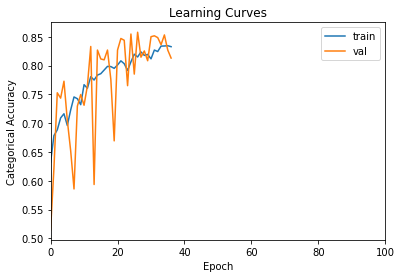

Model accuracy =  0.8562596440315247


In [106]:
# Define Model
accuracy = []
for i in range(5):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    acc = model_MLP_loss(model, epochs=100, patience=10, alpha=0.8, gamma=1.2)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)
    


## 2) Convolutional Neural Networks with Different Configurations <a name="CNN"></a>

In [107]:
#Reshape data
X_train_CNN = X_train.reshape(-1, 50, 50, 1)
X_test_CNN = X_test.reshape(-1, 50, 50, 1)
print('X_train shape: ',X_train_CNN.shape)
print('X_test shape: ',X_test_CNN.shape)

X_train_CNN = X_train_CNN.astype('float32')
X_test_CNN = X_test_CNN.astype('float32')
X_train_CNN = X_train_CNN / 255.
X_test_CNN = X_test_CNN / 255.

X_train shape:  (6470, 50, 50, 1)
X_test shape:  (1164, 50, 50, 1)


In [108]:
def model_CNN (model, epochs, batch_size, patience):
    
    class_names = ['Male', 'Female']
    
    # Cross-validation:
    x_training_set, y_training_set, x_testing_set, y_testing_set = cross_validation(X_train_CNN, Y_train, 1)

    print(x_training_set.shape)
    print(x_testing_set.shape)
    
    # Convert labels into one-hot-encoding format
    y_training_set = onehotencoding(y_training_set)
    y_testing_set = onehotencoding(y_testing_set)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience = patience, restore_best_weights = True)

    train = model.fit(x_training_set, y_training_set, batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[callback],validation_data=(x_testing_set, y_testing_set))
    test_eval = model.evaluate(x_testing_set, y_testing_set, verbose=0)

    print('\nTest accuracy:', test_eval)
    
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.plot(train.history['categorical_accuracy'], label='train')
    plt.plot(train.history['val_categorical_accuracy'], label='val')
    plt.xlim([0, 20])
    plt.legend()
    plt.show()
    
    return test_eval[1]

### 1st CNN model <a name="CNN1"></a>
    We will use three convolutional layers:
        -The first layer will have 32 3x3 filters,
        -The second layer will have 64 3x3 filters and
        -The third layer will have 128 3x3 filters.
    In addition, there are three max-pooling layers each of size 2 x 2.
    We add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries.

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 25s 266ms/step - loss: 0.5479 - categorical_accuracy: 0.7137 - val_loss: 0.4423 - val_categorical_accuracy: 0.7929
Epoch 2/20
91/91 [==============================] - 24s 266ms/step - loss: 0.3725 - categorical_accuracy: 0.8334 - val_loss: 0.3726 - val_categorical_accuracy: 0.8253
Epoch 3/20
91/91 [==============================] - 24s 267ms/step - loss: 0.3037 - categorical_accuracy: 0.8676 - val_loss: 0.3361 - val_categorical_accuracy: 0.8563
Epoch 4/20
91/91 [==============================] - 24s 267ms/step - loss: 0.2475 - categorical_accuracy: 0.8935 - val_loss: 0.3157 - val_categorical_accuracy: 0.8655
Epoch 5/20
91/91 [==============================] - 25s 270ms/step - loss: 0.2180 - categorical_accuracy: 0.9100 - val_loss: 0.3343 - val_categorical_accuracy: 0.8702
Epoch 6/20
91/91 [==============================] - 26s 284ms/step - loss: 0.1688 - categorical_accuracy: 0.9361 - val_loss: 0.359

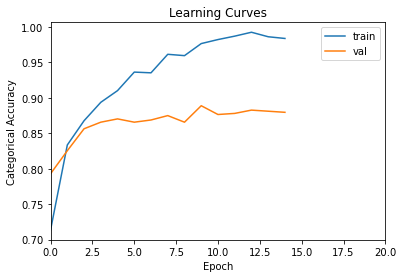

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 25s 269ms/step - loss: 0.5758 - categorical_accuracy: 0.6880 - val_loss: 0.4792 - val_categorical_accuracy: 0.7697
Epoch 2/20
91/91 [==============================] - 26s 282ms/step - loss: 0.4020 - categorical_accuracy: 0.8162 - val_loss: 0.4120 - val_categorical_accuracy: 0.8083
Epoch 3/20
91/91 [==============================] - 25s 272ms/step - loss: 0.3272 - categorical_accuracy: 0.8583 - val_loss: 0.3431 - val_categorical_accuracy: 0.8408
Epoch 4/20
91/91 [==============================] - 25s 275ms/step - loss: 0.2696 - categorical_accuracy: 0.8853 - val_loss: 0.3189 - val_categorical_accuracy: 0.8702
Epoch 5/20
91/91 [==============================] - 26s 286ms/step - loss: 0.2409 - categorical_accuracy: 0.9035 - val_loss: 0.3274 - val_categorical_accuracy: 0.8655
Epoch 6/20
91/91 [==============================] - 25s 269ms/step - loss: 0.1946 - categorical_accuracy: 0.9222 - val_loss: 0.309

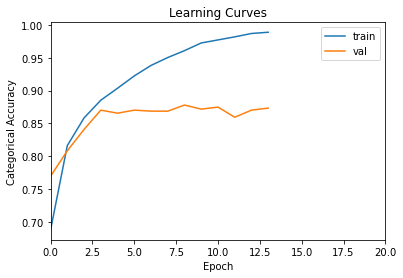

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 26s 284ms/step - loss: 0.5623 - categorical_accuracy: 0.7036 - val_loss: 0.4875 - val_categorical_accuracy: 0.7743
Epoch 2/20
91/91 [==============================] - 25s 274ms/step - loss: 0.4126 - categorical_accuracy: 0.8162 - val_loss: 0.4395 - val_categorical_accuracy: 0.8022
Epoch 3/20
91/91 [==============================] - 26s 280ms/step - loss: 0.3364 - categorical_accuracy: 0.8545 - val_loss: 0.3862 - val_categorical_accuracy: 0.8269
Epoch 4/20
91/91 [==============================] - 25s 270ms/step - loss: 0.2925 - categorical_accuracy: 0.8772 - val_loss: 0.3702 - val_categorical_accuracy: 0.8439
Epoch 5/20
91/91 [==============================] - 25s 269ms/step - loss: 0.2540 - categorical_accuracy: 0.8925 - val_loss: 0.3421 - val_categorical_accuracy: 0.8454
Epoch 6/20
91/91 [==============================] - 26s 285ms/step - loss: 0.2136 - categorical_accuracy: 0.9143 - val_loss: 0.359

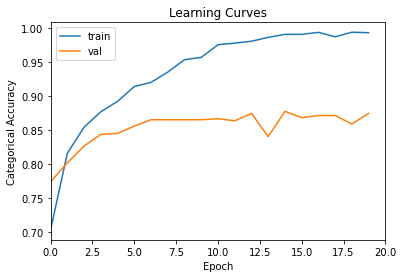

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 25s 270ms/step - loss: 0.5787 - categorical_accuracy: 0.6905 - val_loss: 0.4876 - val_categorical_accuracy: 0.7728
Epoch 2/20
91/91 [==============================] - 24s 268ms/step - loss: 0.4256 - categorical_accuracy: 0.8068 - val_loss: 0.3983 - val_categorical_accuracy: 0.8192
Epoch 3/20
91/91 [==============================] - 24s 268ms/step - loss: 0.3363 - categorical_accuracy: 0.8578 - val_loss: 0.3593 - val_categorical_accuracy: 0.8346
Epoch 4/20
91/91 [==============================] - 25s 269ms/step - loss: 0.3018 - categorical_accuracy: 0.8729 - val_loss: 0.3711 - val_categorical_accuracy: 0.8377
Epoch 5/20
91/91 [==============================] - 26s 281ms/step - loss: 0.2479 - categorical_accuracy: 0.8970 - val_loss: 0.3816 - val_categorical_accuracy: 0.8377
Epoch 6/20
91/91 [==============================] - 25s 272ms/step - loss: 0.2233 - categorical_accuracy: 0.9102 - val_loss: 0.337

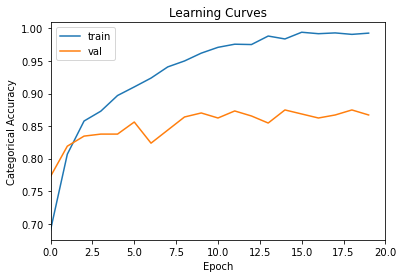

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 25s 271ms/step - loss: 0.5464 - categorical_accuracy: 0.7123 - val_loss: 0.4999 - val_categorical_accuracy: 0.7852
Epoch 2/20
91/91 [==============================] - 25s 278ms/step - loss: 0.3868 - categorical_accuracy: 0.8264 - val_loss: 0.4164 - val_categorical_accuracy: 0.8253
Epoch 3/20
91/91 [==============================] - 25s 272ms/step - loss: 0.3212 - categorical_accuracy: 0.8664 - val_loss: 0.4019 - val_categorical_accuracy: 0.8269
Epoch 4/20
91/91 [==============================] - 25s 272ms/step - loss: 0.2846 - categorical_accuracy: 0.8827 - val_loss: 0.3388 - val_categorical_accuracy: 0.8655
Epoch 5/20
91/91 [==============================] - 24s 267ms/step - loss: 0.2465 - categorical_accuracy: 0.8956 - val_loss: 0.3498 - val_categorical_accuracy: 0.8532
Epoch 6/20
91/91 [==============================] - 25s 276ms/step - loss: 0.2155 - categorical_accuracy: 0.9121 - val_loss: 0.386

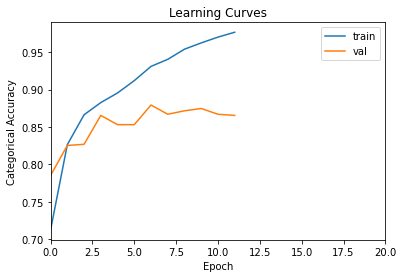

Model accuracy =  0.8778979778289795


In [109]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 2
patience = 5


accuracy = []
for i in range(5):
    
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)


### 2nd CNN model<a name="CNN2"></a>
    We will use a similar approach but without the Leaky ReLu activation function.

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 23s 244ms/step - loss: 0.6617 - categorical_accuracy: 0.6660 - val_loss: 0.4984 - val_categorical_accuracy: 0.7527
Epoch 2/20
91/91 [==============================] - 22s 241ms/step - loss: 0.4289 - categorical_accuracy: 0.8049 - val_loss: 0.4334 - val_categorical_accuracy: 0.8130
Epoch 3/20
91/91 [==============================] - 22s 240ms/step - loss: 0.3491 - categorical_accuracy: 0.8509 - val_loss: 0.3769 - val_categorical_accuracy: 0.8223
Epoch 4/20
91/91 [==============================] - 22s 241ms/step - loss: 0.3005 - categorical_accuracy: 0.8745 - val_loss: 0.3565 - val_categorical_accuracy: 0.8532
Epoch 5/20
91/91 [==============================] - 22s 243ms/step - loss: 0.2580 - categorical_accuracy: 0.8930 - val_loss: 0.3501 - val_categorical_accuracy: 0.8501
Epoch 6/20
91/91 [==============================] - 22s 240ms/step - loss: 0.2362 - categorical_accuracy: 0.9042 - val_loss: 0.344

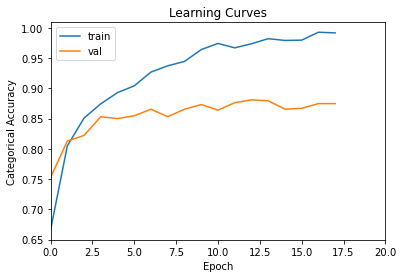

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 23s 242ms/step - loss: 0.6325 - categorical_accuracy: 0.6802 - val_loss: 0.4804 - val_categorical_accuracy: 0.7697
Epoch 2/20
91/91 [==============================] - 22s 241ms/step - loss: 0.4210 - categorical_accuracy: 0.8138 - val_loss: 0.4296 - val_categorical_accuracy: 0.8037
Epoch 3/20
91/91 [==============================] - 22s 245ms/step - loss: 0.3401 - categorical_accuracy: 0.8545 - val_loss: 0.4026 - val_categorical_accuracy: 0.8253
Epoch 4/20
91/91 [==============================] - 22s 241ms/step - loss: 0.2844 - categorical_accuracy: 0.8779 - val_loss: 0.3527 - val_categorical_accuracy: 0.8470
Epoch 5/20
91/91 [==============================] - 22s 240ms/step - loss: 0.2482 - categorical_accuracy: 0.8987 - val_loss: 0.3539 - val_categorical_accuracy: 0.8547
Epoch 6/20
91/91 [==============================] - 22s 246ms/step - loss: 0.2118 - categorical_accuracy: 0.9104 - val_loss: 0.466

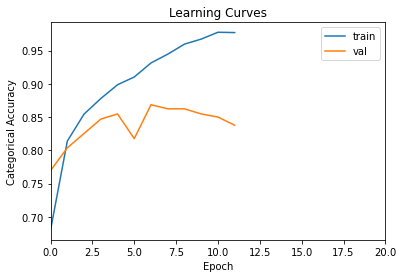

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 22s 241ms/step - loss: 0.6290 - categorical_accuracy: 0.6886 - val_loss: 0.4795 - val_categorical_accuracy: 0.7821
Epoch 2/20
91/91 [==============================] - 22s 240ms/step - loss: 0.4185 - categorical_accuracy: 0.8138 - val_loss: 0.4134 - val_categorical_accuracy: 0.8207
Epoch 3/20
91/91 [==============================] - 22s 240ms/step - loss: 0.3430 - categorical_accuracy: 0.8518 - val_loss: 0.3786 - val_categorical_accuracy: 0.8408
Epoch 4/20
91/91 [==============================] - 22s 240ms/step - loss: 0.2883 - categorical_accuracy: 0.8793 - val_loss: 0.3759 - val_categorical_accuracy: 0.8393
Epoch 5/20
91/91 [==============================] - 23s 252ms/step - loss: 0.2686 - categorical_accuracy: 0.8873 - val_loss: 0.4149 - val_categorical_accuracy: 0.8284
Epoch 6/20
91/91 [==============================] - 22s 246ms/step - loss: 0.2356 - categorical_accuracy: 0.9054 - val_loss: 0.402

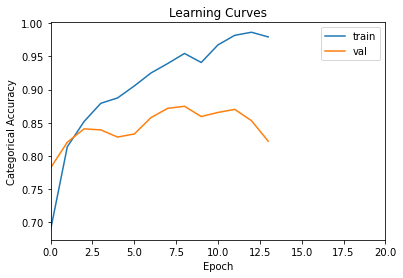

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 22s 241ms/step - loss: 0.5740 - categorical_accuracy: 0.7122 - val_loss: 0.5110 - val_categorical_accuracy: 0.7790
Epoch 2/20
91/91 [==============================] - 22s 240ms/step - loss: 0.3993 - categorical_accuracy: 0.8281 - val_loss: 0.4198 - val_categorical_accuracy: 0.8223
Epoch 3/20
91/91 [==============================] - 22s 240ms/step - loss: 0.3310 - categorical_accuracy: 0.8602 - val_loss: 0.3630 - val_categorical_accuracy: 0.8377
Epoch 4/20
91/91 [==============================] - 22s 246ms/step - loss: 0.2668 - categorical_accuracy: 0.8841 - val_loss: 0.3484 - val_categorical_accuracy: 0.8547
Epoch 5/20
91/91 [==============================] - 22s 242ms/step - loss: 0.2411 - categorical_accuracy: 0.9038 - val_loss: 0.3547 - val_categorical_accuracy: 0.8624
Epoch 6/20
91/91 [==============================] - 22s 241ms/step - loss: 0.2029 - categorical_accuracy: 0.9225 - val_loss: 0.336

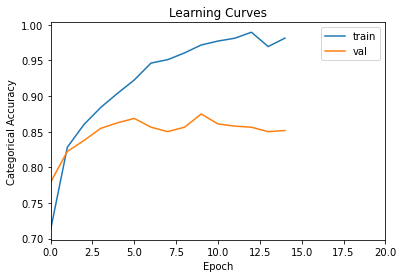

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 24s 261ms/step - loss: 0.5947 - categorical_accuracy: 0.7024 - val_loss: 0.4692 - val_categorical_accuracy: 0.8022
Epoch 2/20
91/91 [==============================] - 22s 243ms/step - loss: 0.3972 - categorical_accuracy: 0.8300 - val_loss: 0.4299 - val_categorical_accuracy: 0.8130
Epoch 3/20
91/91 [==============================] - 22s 239ms/step - loss: 0.3398 - categorical_accuracy: 0.8544 - val_loss: 0.3952 - val_categorical_accuracy: 0.8269
Epoch 4/20
91/91 [==============================] - 22s 239ms/step - loss: 0.2867 - categorical_accuracy: 0.8812 - val_loss: 0.3630 - val_categorical_accuracy: 0.8439
Epoch 5/20
91/91 [==============================] - 22s 240ms/step - loss: 0.2445 - categorical_accuracy: 0.9028 - val_loss: 0.4157 - val_categorical_accuracy: 0.8439
Epoch 6/20
91/91 [==============================] - 23s 247ms/step - loss: 0.2193 - categorical_accuracy: 0.9128 - val_loss: 0.459

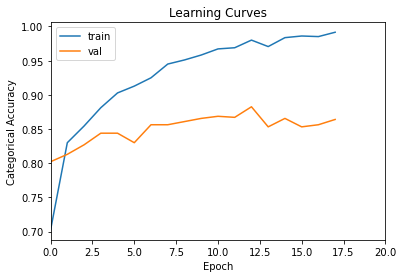

Model accuracy =  0.874806821346283


In [110]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 2
patience = 5


accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))                 
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer                 
    model.add(Dense(num_classes, activation='softmax')) #Output layer
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])


    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### 3rd CNN model<a name="CNN3"></a>
    Testing a model with only one convolutional layer and no Leaky ReLu activation function.

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 9s 92ms/step - loss: 0.6808 - categorical_accuracy: 0.6663 - val_loss: 0.5095 - val_categorical_accuracy: 0.7558
Epoch 2/20
91/91 [==============================] - 9s 94ms/step - loss: 0.4446 - categorical_accuracy: 0.7992 - val_loss: 0.4115 - val_categorical_accuracy: 0.8114
Epoch 3/20
91/91 [==============================] - 8s 92ms/step - loss: 0.3648 - categorical_accuracy: 0.8432 - val_loss: 0.3942 - val_categorical_accuracy: 0.8346
Epoch 4/20
91/91 [==============================] - 8s 92ms/step - loss: 0.3192 - categorical_accuracy: 0.8635 - val_loss: 0.3617 - val_categorical_accuracy: 0.8563
Epoch 5/20
91/91 [==============================] - 8s 91ms/step - loss: 0.2849 - categorical_accuracy: 0.8806 - val_loss: 0.3545 - val_categorical_accuracy: 0.8671
Epoch 6/20
91/91 [==============================] - 9s 95ms/step - loss: 0.2630 - categorical_accuracy: 0.8892 - val_loss: 0.3508 - val_cate

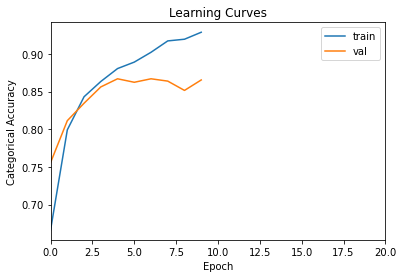

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 9s 93ms/step - loss: 0.7399 - categorical_accuracy: 0.6437 - val_loss: 0.5166 - val_categorical_accuracy: 0.7403
Epoch 2/20
91/91 [==============================] - 10s 109ms/step - loss: 0.4531 - categorical_accuracy: 0.7951 - val_loss: 0.4305 - val_categorical_accuracy: 0.8145
Epoch 3/20
91/91 [==============================] - 9s 95ms/step - loss: 0.3782 - categorical_accuracy: 0.8375 - val_loss: 0.3924 - val_categorical_accuracy: 0.8346
Epoch 4/20
91/91 [==============================] - 8s 91ms/step - loss: 0.3317 - categorical_accuracy: 0.8619 - val_loss: 0.3760 - val_categorical_accuracy: 0.8578
Epoch 5/20
91/91 [==============================] - 8s 92ms/step - loss: 0.3055 - categorical_accuracy: 0.8736 - val_loss: 0.3795 - val_categorical_accuracy: 0.8439
Epoch 6/20
91/91 [==============================] - 8s 92ms/step - loss: 0.2746 - categorical_accuracy: 0.8848 - val_loss: 0.3559 - val_ca

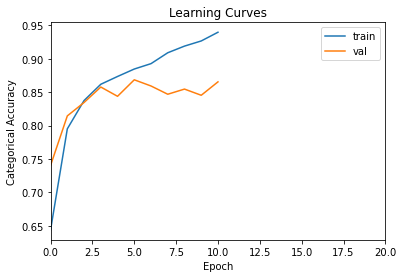

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 9s 92ms/step - loss: 0.7129 - categorical_accuracy: 0.6615 - val_loss: 0.5353 - val_categorical_accuracy: 0.7110
Epoch 2/20
91/91 [==============================] - 8s 91ms/step - loss: 0.4866 - categorical_accuracy: 0.7706 - val_loss: 0.4895 - val_categorical_accuracy: 0.7543
Epoch 3/20
91/91 [==============================] - 9s 96ms/step - loss: 0.4083 - categorical_accuracy: 0.8231 - val_loss: 0.4294 - val_categorical_accuracy: 0.8053
Epoch 4/20
91/91 [==============================] - 9s 102ms/step - loss: 0.3780 - categorical_accuracy: 0.8375 - val_loss: 0.3954 - val_categorical_accuracy: 0.8393
Epoch 5/20
91/91 [==============================] - 9s 95ms/step - loss: 0.3414 - categorical_accuracy: 0.8566 - val_loss: 0.3953 - val_categorical_accuracy: 0.8362
Epoch 6/20
91/91 [==============================] - 9s 94ms/step - loss: 0.3029 - categorical_accuracy: 0.8714 - val_loss: 0.3601 - val_cat

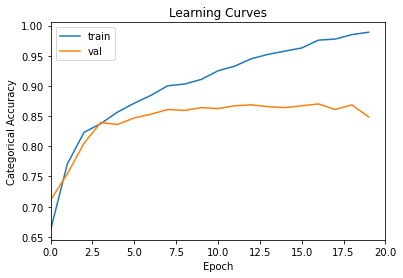

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 9s 93ms/step - loss: 0.6252 - categorical_accuracy: 0.7046 - val_loss: 0.4733 - val_categorical_accuracy: 0.8022
Epoch 2/20
91/91 [==============================] - 8s 92ms/step - loss: 0.4202 - categorical_accuracy: 0.8162 - val_loss: 0.4103 - val_categorical_accuracy: 0.8300
Epoch 3/20
91/91 [==============================] - 8s 92ms/step - loss: 0.3505 - categorical_accuracy: 0.8501 - val_loss: 0.4087 - val_categorical_accuracy: 0.8300
Epoch 4/20
91/91 [==============================] - 8s 91ms/step - loss: 0.3058 - categorical_accuracy: 0.8736 - val_loss: 0.3699 - val_categorical_accuracy: 0.8470
Epoch 5/20
91/91 [==============================] - 8s 92ms/step - loss: 0.2740 - categorical_accuracy: 0.8872 - val_loss: 0.3391 - val_categorical_accuracy: 0.8563
Epoch 6/20
91/91 [==============================] - 8s 91ms/step - loss: 0.2507 - categorical_accuracy: 0.8988 - val_loss: 0.3803 - val_cate

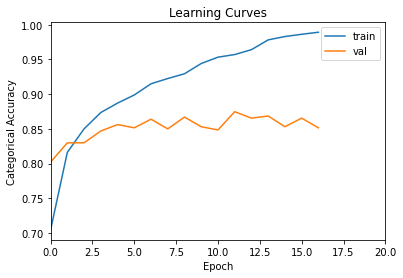

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 9s 93ms/step - loss: 0.7952 - categorical_accuracy: 0.6730 - val_loss: 0.4825 - val_categorical_accuracy: 0.7573
Epoch 2/20
91/91 [==============================] - 8s 91ms/step - loss: 0.4136 - categorical_accuracy: 0.8164 - val_loss: 0.4153 - val_categorical_accuracy: 0.8037
Epoch 3/20
91/91 [==============================] - 8s 92ms/step - loss: 0.3369 - categorical_accuracy: 0.8533 - val_loss: 0.3706 - val_categorical_accuracy: 0.8485
Epoch 4/20
91/91 [==============================] - 8s 92ms/step - loss: 0.2993 - categorical_accuracy: 0.8755 - val_loss: 0.3564 - val_categorical_accuracy: 0.8563
Epoch 5/20
91/91 [==============================] - 9s 100ms/step - loss: 0.2699 - categorical_accuracy: 0.8896 - val_loss: 0.3676 - val_categorical_accuracy: 0.8578
Epoch 6/20
91/91 [==============================] - 10s 113ms/step - loss: 0.2452 - categorical_accuracy: 0.9006 - val_loss: 0.3660 - val_c

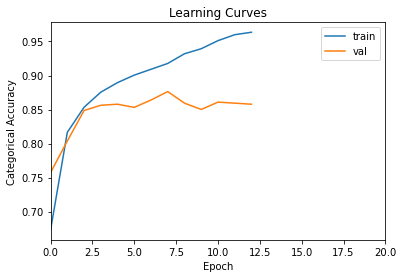

Model accuracy =  0.8686244487762451


In [111]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 2
patience = 5

accuracy = []
for i in range(5):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same'))
    model.add(MaxPooling2D((2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])


    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### 4th CNN model <a name="CNN4"></a>
    We will use two convolutional layers:
        -The first layer will have 32 3x3 filters,
        -The second layer will have 64 3x3 filters and
    In addition, there are three max-pooling layers each of size 2 x 2.
    We add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries.

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 19s 201ms/step - loss: 0.5572 - categorical_accuracy: 0.7041 - val_loss: 0.4353 - val_categorical_accuracy: 0.7960
Epoch 2/20
91/91 [==============================] - 20s 220ms/step - loss: 0.3655 - categorical_accuracy: 0.8362 - val_loss: 0.4303 - val_categorical_accuracy: 0.8114
Epoch 3/20
91/91 [==============================] - 19s 213ms/step - loss: 0.2986 - categorical_accuracy: 0.8736 - val_loss: 0.3575 - val_categorical_accuracy: 0.8532
Epoch 4/20
91/91 [==============================] - 18s 200ms/step - loss: 0.2614 - categorical_accuracy: 0.8896 - val_loss: 0.3370 - val_categorical_accuracy: 0.8485
Epoch 5/20
91/91 [==============================] - 18s 200ms/step - loss: 0.2235 - categorical_accuracy: 0.9074 - val_loss: 0.3472 - val_categorical_accuracy: 0.8640
Epoch 6/20
91/91 [==============================] - 18s 201ms/step - loss: 0.1964 - categorical_accuracy: 0.9215 - val_loss: 0.342

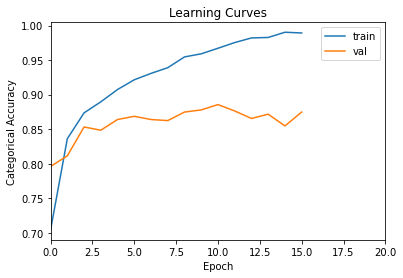

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 21s 224ms/step - loss: 0.5103 - categorical_accuracy: 0.7446 - val_loss: 0.4280 - val_categorical_accuracy: 0.8068
Epoch 2/20
91/91 [==============================] - 20s 222ms/step - loss: 0.3666 - categorical_accuracy: 0.8384 - val_loss: 0.3962 - val_categorical_accuracy: 0.8161
Epoch 3/20
91/91 [==============================] - 19s 211ms/step - loss: 0.3192 - categorical_accuracy: 0.8657 - val_loss: 0.4084 - val_categorical_accuracy: 0.8207
Epoch 4/20
91/91 [==============================] - 19s 213ms/step - loss: 0.2722 - categorical_accuracy: 0.8868 - val_loss: 0.3506 - val_categorical_accuracy: 0.8516
Epoch 5/20
91/91 [==============================] - 19s 208ms/step - loss: 0.2336 - categorical_accuracy: 0.9052 - val_loss: 0.3478 - val_categorical_accuracy: 0.8454
Epoch 6/20
91/91 [==============================] - 18s 200ms/step - loss: 0.2181 - categorical_accuracy: 0.9122 - val_loss: 0.381

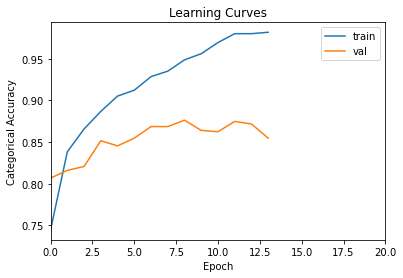

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 19s 197ms/step - loss: 0.5969 - categorical_accuracy: 0.6725 - val_loss: 0.4565 - val_categorical_accuracy: 0.7929
Epoch 2/20
91/91 [==============================] - 19s 214ms/step - loss: 0.4130 - categorical_accuracy: 0.8126 - val_loss: 0.4351 - val_categorical_accuracy: 0.7929
Epoch 3/20
91/91 [==============================] - 18s 198ms/step - loss: 0.3368 - categorical_accuracy: 0.8539 - val_loss: 0.5897 - val_categorical_accuracy: 0.7481
Epoch 4/20
91/91 [==============================] - 18s 199ms/step - loss: 0.3241 - categorical_accuracy: 0.8616 - val_loss: 0.3544 - val_categorical_accuracy: 0.8377
Epoch 5/20
91/91 [==============================] - 18s 200ms/step - loss: 0.2719 - categorical_accuracy: 0.8830 - val_loss: 0.3819 - val_categorical_accuracy: 0.8377
Epoch 6/20
91/91 [==============================] - 18s 199ms/step - loss: 0.2439 - categorical_accuracy: 0.8995 - val_loss: 0.349

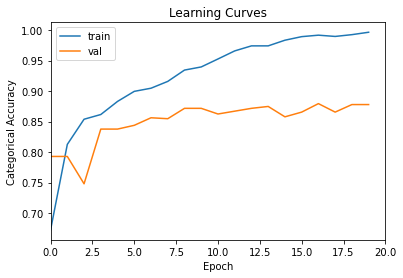

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 19s 200ms/step - loss: 0.5674 - categorical_accuracy: 0.6924 - val_loss: 0.4861 - val_categorical_accuracy: 0.7805
Epoch 2/20
91/91 [==============================] - 19s 204ms/step - loss: 0.3981 - categorical_accuracy: 0.8240 - val_loss: 0.4387 - val_categorical_accuracy: 0.7790
Epoch 3/20
91/91 [==============================] - 18s 203ms/step - loss: 0.3382 - categorical_accuracy: 0.8544 - val_loss: 0.3703 - val_categorical_accuracy: 0.8284
Epoch 4/20
91/91 [==============================] - 19s 206ms/step - loss: 0.2989 - categorical_accuracy: 0.8717 - val_loss: 0.3507 - val_categorical_accuracy: 0.8532
Epoch 5/20
91/91 [==============================] - 18s 203ms/step - loss: 0.2692 - categorical_accuracy: 0.8877 - val_loss: 0.3331 - val_categorical_accuracy: 0.8671
Epoch 6/20
91/91 [==============================] - 19s 204ms/step - loss: 0.2407 - categorical_accuracy: 0.9013 - val_loss: 0.363

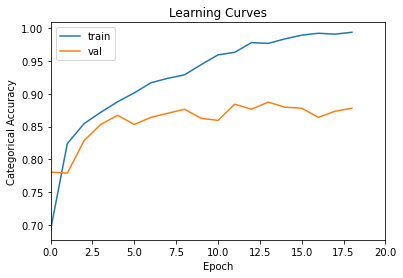

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 19s 203ms/step - loss: 0.5088 - categorical_accuracy: 0.7434 - val_loss: 0.4448 - val_categorical_accuracy: 0.8068
Epoch 2/20
91/91 [==============================] - 18s 198ms/step - loss: 0.3760 - categorical_accuracy: 0.8317 - val_loss: 0.3920 - val_categorical_accuracy: 0.8207
Epoch 3/20
91/91 [==============================] - 18s 198ms/step - loss: 0.3101 - categorical_accuracy: 0.8673 - val_loss: 0.3609 - val_categorical_accuracy: 0.8501
Epoch 4/20
91/91 [==============================] - 18s 198ms/step - loss: 0.2664 - categorical_accuracy: 0.8903 - val_loss: 0.3598 - val_categorical_accuracy: 0.8470
Epoch 5/20
91/91 [==============================] - 19s 204ms/step - loss: 0.2398 - categorical_accuracy: 0.8985 - val_loss: 0.3207 - val_categorical_accuracy: 0.8655
Epoch 6/20
91/91 [==============================] - 18s 199ms/step - loss: 0.2113 - categorical_accuracy: 0.9141 - val_loss: 0.327

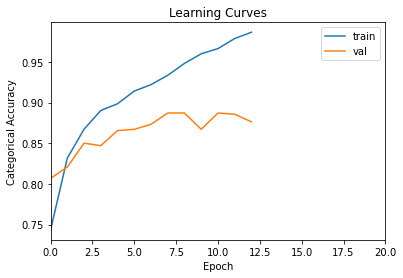

Model accuracy =  0.885625958442688


In [112]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 2
patience = 5

accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### 5th CNN model <a name="CNN4"></a>
    We will use two convolutional layers:
        -The first layer will have 64 3x3 filters,
        -The second layer will have 32 3x3 filters and
    In addition, there are three max-pooling layers each of size 2 x 2.
    We add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries.

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 27s 296ms/step - loss: 0.5684 - categorical_accuracy: 0.6953 - val_loss: 0.4596 - val_categorical_accuracy: 0.7975
Epoch 2/20
91/91 [==============================] - 26s 287ms/step - loss: 0.4115 - categorical_accuracy: 0.8169 - val_loss: 0.4052 - val_categorical_accuracy: 0.8161
Epoch 3/20
91/91 [==============================] - 26s 284ms/step - loss: 0.3458 - categorical_accuracy: 0.8530 - val_loss: 0.3829 - val_categorical_accuracy: 0.8130
Epoch 4/20
91/91 [==============================] - 31s 336ms/step - loss: 0.3089 - categorical_accuracy: 0.8695 - val_loss: 0.3669 - val_categorical_accuracy: 0.8362
Epoch 5/20
91/91 [==============================] - 31s 339ms/step - loss: 0.2833 - categorical_accuracy: 0.8786 - val_loss: 0.3545 - val_categorical_accuracy: 0.8408
Epoch 6/20
91/91 [==============================] - 31s 341ms/step - loss: 0.2447 - categorical_accuracy: 0.8961 - val_loss: 0.345

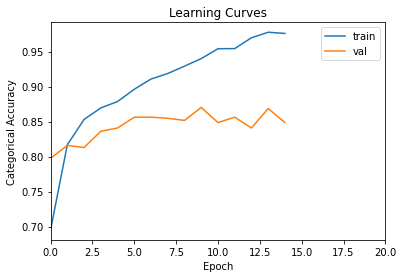

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 27s 291ms/step - loss: 0.5566 - categorical_accuracy: 0.7094 - val_loss: 0.4486 - val_categorical_accuracy: 0.7852
Epoch 2/20
91/91 [==============================] - 26s 289ms/step - loss: 0.3936 - categorical_accuracy: 0.8243 - val_loss: 0.4076 - val_categorical_accuracy: 0.8130
Epoch 3/20
91/91 [==============================] - 26s 286ms/step - loss: 0.3350 - categorical_accuracy: 0.8600 - val_loss: 0.3898 - val_categorical_accuracy: 0.8192
Epoch 4/20
91/91 [==============================] - 26s 284ms/step - loss: 0.3046 - categorical_accuracy: 0.8693 - val_loss: 0.3657 - val_categorical_accuracy: 0.8408
Epoch 5/20
91/91 [==============================] - 26s 285ms/step - loss: 0.2723 - categorical_accuracy: 0.8865 - val_loss: 0.3877 - val_categorical_accuracy: 0.8547
Epoch 6/20
91/91 [==============================] - 26s 285ms/step - loss: 0.2641 - categorical_accuracy: 0.8909 - val_loss: 0.329

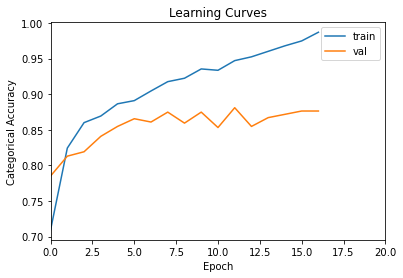

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 26s 283ms/step - loss: 0.5262 - categorical_accuracy: 0.7269 - val_loss: 0.4780 - val_categorical_accuracy: 0.7944
Epoch 2/20
91/91 [==============================] - 28s 309ms/step - loss: 0.3978 - categorical_accuracy: 0.8200 - val_loss: 0.4096 - val_categorical_accuracy: 0.8207
Epoch 3/20
91/91 [==============================] - 26s 288ms/step - loss: 0.3360 - categorical_accuracy: 0.8590 - val_loss: 0.3958 - val_categorical_accuracy: 0.8284
Epoch 4/20
91/91 [==============================] - 26s 286ms/step - loss: 0.3106 - categorical_accuracy: 0.8647 - val_loss: 0.3521 - val_categorical_accuracy: 0.8470
Epoch 5/20
91/91 [==============================] - 26s 286ms/step - loss: 0.2638 - categorical_accuracy: 0.8889 - val_loss: 0.3574 - val_categorical_accuracy: 0.8501
Epoch 6/20
91/91 [==============================] - 27s 295ms/step - loss: 0.2482 - categorical_accuracy: 0.8975 - val_loss: 0.333

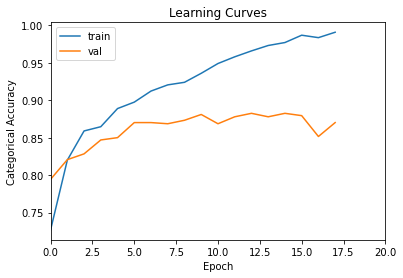

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 27s 291ms/step - loss: 0.5753 - categorical_accuracy: 0.6886 - val_loss: 0.4685 - val_categorical_accuracy: 0.7852
Epoch 2/20
91/91 [==============================] - 27s 300ms/step - loss: 0.4020 - categorical_accuracy: 0.8188 - val_loss: 0.4234 - val_categorical_accuracy: 0.8207
Epoch 3/20
91/91 [==============================] - 27s 294ms/step - loss: 0.3493 - categorical_accuracy: 0.8504 - val_loss: 0.3875 - val_categorical_accuracy: 0.8284
Epoch 4/20
91/91 [==============================] - 26s 282ms/step - loss: 0.3035 - categorical_accuracy: 0.8724 - val_loss: 0.4286 - val_categorical_accuracy: 0.8300
Epoch 5/20
91/91 [==============================] - 26s 282ms/step - loss: 0.2708 - categorical_accuracy: 0.8851 - val_loss: 0.3473 - val_categorical_accuracy: 0.8501
Epoch 6/20
91/91 [==============================] - 26s 282ms/step - loss: 0.2423 - categorical_accuracy: 0.9009 - val_loss: 0.337

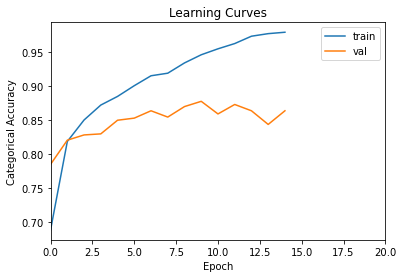

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 27s 284ms/step - loss: 0.6024 - categorical_accuracy: 0.6522 - val_loss: 0.4707 - val_categorical_accuracy: 0.7944
Epoch 2/20
91/91 [==============================] - 26s 283ms/step - loss: 0.4239 - categorical_accuracy: 0.8102 - val_loss: 0.4181 - val_categorical_accuracy: 0.8037
Epoch 3/20
91/91 [==============================] - 26s 287ms/step - loss: 0.3653 - categorical_accuracy: 0.8415 - val_loss: 0.4052 - val_categorical_accuracy: 0.8192
Epoch 4/20
91/91 [==============================] - 26s 283ms/step - loss: 0.3342 - categorical_accuracy: 0.8566 - val_loss: 0.3892 - val_categorical_accuracy: 0.8284
Epoch 5/20
91/91 [==============================] - 26s 287ms/step - loss: 0.3004 - categorical_accuracy: 0.8753 - val_loss: 0.3850 - val_categorical_accuracy: 0.8439
Epoch 6/20
91/91 [==============================] - 26s 282ms/step - loss: 0.2794 - categorical_accuracy: 0.8837 - val_loss: 0.383

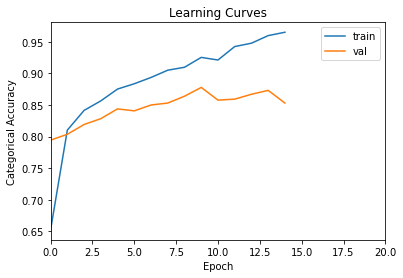

Model accuracy =  0.8778979778289795


In [113]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 2
patience = 5

accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### 6th CNN model <a name="CNN4"></a>
    We will use two convolutional layers:
        -The first layer will have 32 3x3 filters (activation none),
        -The second layer will have 64 3x3 filters (activation none) and
    In addition, there are three max-pooling layers each of size 2 x 2.
    We add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries.

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 20s 210ms/step - loss: 0.5141 - categorical_accuracy: 0.7393 - val_loss: 0.4524 - val_categorical_accuracy: 0.7960
Epoch 2/20
91/91 [==============================] - 18s 201ms/step - loss: 0.3705 - categorical_accuracy: 0.8384 - val_loss: 0.3921 - val_categorical_accuracy: 0.8192
Epoch 3/20
91/91 [==============================] - 18s 200ms/step - loss: 0.3193 - categorical_accuracy: 0.8611 - val_loss: 0.4468 - val_categorical_accuracy: 0.8176
Epoch 4/20
91/91 [==============================] - 18s 201ms/step - loss: 0.2860 - categorical_accuracy: 0.8837 - val_loss: 0.3887 - val_categorical_accuracy: 0.8377
Epoch 5/20
91/91 [==============================] - 18s 202ms/step - loss: 0.2620 - categorical_accuracy: 0.8918 - val_loss: 0.3557 - val_categorical_accuracy: 0.8547
Epoch 6/20
91/91 [==============================] - 18s 203ms/step - loss: 0.2354 - categorical_accuracy: 0.9030 - val_loss: 0.343

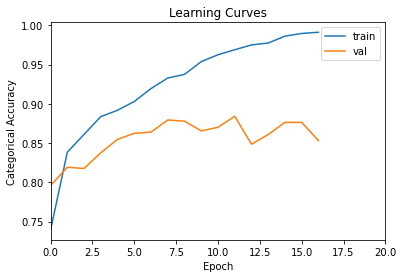

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 19s 204ms/step - loss: 0.5629 - categorical_accuracy: 0.6998 - val_loss: 0.4893 - val_categorical_accuracy: 0.7774
Epoch 2/20
91/91 [==============================] - 18s 199ms/step - loss: 0.3902 - categorical_accuracy: 0.8279 - val_loss: 0.5149 - val_categorical_accuracy: 0.7821
Epoch 3/20
91/91 [==============================] - 18s 199ms/step - loss: 0.3346 - categorical_accuracy: 0.8576 - val_loss: 0.3822 - val_categorical_accuracy: 0.8300
Epoch 4/20
91/91 [==============================] - 18s 201ms/step - loss: 0.2810 - categorical_accuracy: 0.8818 - val_loss: 0.3586 - val_categorical_accuracy: 0.8501
Epoch 5/20
91/91 [==============================] - 18s 204ms/step - loss: 0.2624 - categorical_accuracy: 0.8958 - val_loss: 0.3733 - val_categorical_accuracy: 0.8485
Epoch 6/20
91/91 [==============================] - 18s 201ms/step - loss: 0.2276 - categorical_accuracy: 0.9081 - val_loss: 0.345

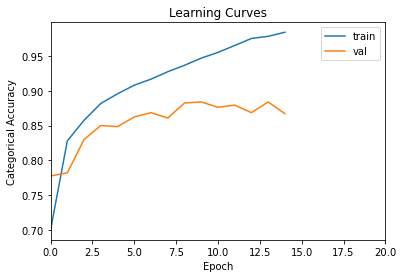

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 19s 202ms/step - loss: 0.5095 - categorical_accuracy: 0.7486 - val_loss: 0.4388 - val_categorical_accuracy: 0.8022
Epoch 2/20
91/91 [==============================] - 19s 207ms/step - loss: 0.3551 - categorical_accuracy: 0.8475 - val_loss: 0.3633 - val_categorical_accuracy: 0.8485
Epoch 3/20
91/91 [==============================] - 19s 213ms/step - loss: 0.2934 - categorical_accuracy: 0.8760 - val_loss: 0.3704 - val_categorical_accuracy: 0.8563
Epoch 4/20
91/91 [==============================] - 18s 202ms/step - loss: 0.2580 - categorical_accuracy: 0.8952 - val_loss: 0.3240 - val_categorical_accuracy: 0.8594
Epoch 5/20
91/91 [==============================] - 18s 200ms/step - loss: 0.2309 - categorical_accuracy: 0.9061 - val_loss: 0.3449 - val_categorical_accuracy: 0.8516
Epoch 6/20
91/91 [==============================] - 21s 235ms/step - loss: 0.1968 - categorical_accuracy: 0.9229 - val_loss: 0.335

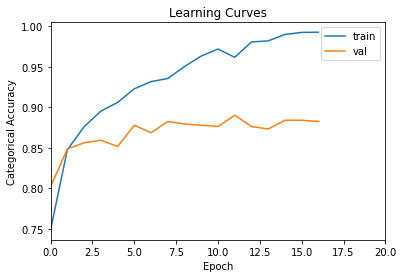

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 22s 238ms/step - loss: 0.6314 - categorical_accuracy: 0.6318 - val_loss: 0.5394 - val_categorical_accuracy: 0.7218
Epoch 2/20
91/91 [==============================] - 23s 254ms/step - loss: 0.4636 - categorical_accuracy: 0.7810 - val_loss: 0.4858 - val_categorical_accuracy: 0.7975
Epoch 3/20
91/91 [==============================] - 24s 268ms/step - loss: 0.3779 - categorical_accuracy: 0.8324 - val_loss: 0.4154 - val_categorical_accuracy: 0.8207
Epoch 4/20
91/91 [==============================] - 21s 235ms/step - loss: 0.3209 - categorical_accuracy: 0.8609 - val_loss: 0.3681 - val_categorical_accuracy: 0.8423
Epoch 5/20
91/91 [==============================] - 20s 215ms/step - loss: 0.2756 - categorical_accuracy: 0.8868 - val_loss: 0.3913 - val_categorical_accuracy: 0.8393
Epoch 6/20
91/91 [==============================] - 19s 210ms/step - loss: 0.2456 - categorical_accuracy: 0.8978 - val_loss: 0.336

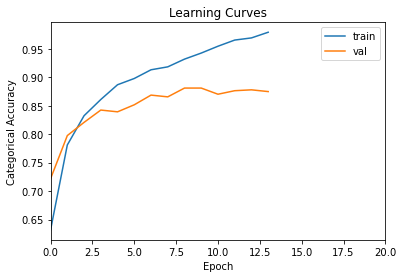

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 21s 223ms/step - loss: 0.5882 - categorical_accuracy: 0.6852 - val_loss: 0.4563 - val_categorical_accuracy: 0.7944
Epoch 2/20
91/91 [==============================] - 19s 207ms/step - loss: 0.3980 - categorical_accuracy: 0.8207 - val_loss: 0.4028 - val_categorical_accuracy: 0.8223
Epoch 3/20
91/91 [==============================] - 19s 205ms/step - loss: 0.3451 - categorical_accuracy: 0.8489 - val_loss: 0.4160 - val_categorical_accuracy: 0.8161
Epoch 4/20
91/91 [==============================] - 19s 208ms/step - loss: 0.3092 - categorical_accuracy: 0.8688 - val_loss: 0.3895 - val_categorical_accuracy: 0.8423
Epoch 5/20
91/91 [==============================] - 19s 213ms/step - loss: 0.2807 - categorical_accuracy: 0.8843 - val_loss: 0.3711 - val_categorical_accuracy: 0.8470
Epoch 6/20
91/91 [==============================] - 20s 217ms/step - loss: 0.2590 - categorical_accuracy: 0.8976 - val_loss: 0.361

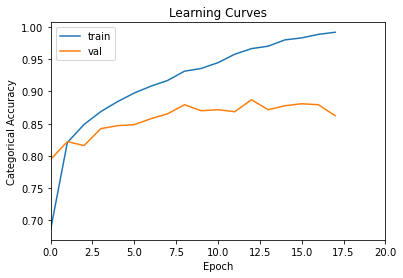

Model accuracy =  0.8840803503990173


In [114]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 2
patience = 5

accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(64, (3, 3),padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### 7th CNN model <a name="CNN4"></a>
    We will use two convolutional layers:
        -The first layer will have 32 3x3 filters,
        -The second layer will have 64 3x3 filters
    In addition, there are three max-pooling layers each of size 2 x 2.
    We add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries.
    Fully connected relu layer at the end (instead of linear), sigmoid last layer

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 24s 259ms/step - loss: 0.6169 - categorical_accuracy: 0.6437 - val_loss: 0.5111 - val_categorical_accuracy: 0.7543
Epoch 2/20
91/91 [==============================] - 22s 244ms/step - loss: 0.4585 - categorical_accuracy: 0.7900 - val_loss: 0.4513 - val_categorical_accuracy: 0.8006
Epoch 3/20
91/91 [==============================] - 19s 210ms/step - loss: 0.4117 - categorical_accuracy: 0.8145 - val_loss: 0.4243 - val_categorical_accuracy: 0.8068
Epoch 4/20
91/91 [==============================] - 19s 209ms/step - loss: 0.3666 - categorical_accuracy: 0.8372 - val_loss: 0.4331 - val_categorical_accuracy: 0.8130
Epoch 5/20
91/91 [==============================] - 21s 229ms/step - loss: 0.3377 - categorical_accuracy: 0.8549 - val_loss: 0.3830 - val_categorical_accuracy: 0.8346
Epoch 6/20
91/91 [==============================] - 20s 215ms/step - loss: 0.3122 - categorical_accuracy: 0.8652 - val_loss: 0.370

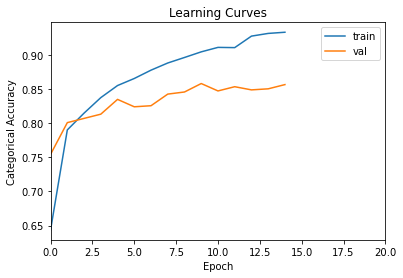

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 19s 203ms/step - loss: 0.5240 - categorical_accuracy: 0.7376 - val_loss: 0.4402 - val_categorical_accuracy: 0.8022
Epoch 2/20
91/91 [==============================] - 18s 203ms/step - loss: 0.3697 - categorical_accuracy: 0.8401 - val_loss: 0.4348 - val_categorical_accuracy: 0.8161
Epoch 3/20
91/91 [==============================] - 19s 206ms/step - loss: 0.3230 - categorical_accuracy: 0.8614 - val_loss: 0.3741 - val_categorical_accuracy: 0.8454
Epoch 4/20
91/91 [==============================] - 20s 215ms/step - loss: 0.2796 - categorical_accuracy: 0.8868 - val_loss: 0.3633 - val_categorical_accuracy: 0.8485
Epoch 5/20
91/91 [==============================] - 20s 221ms/step - loss: 0.2562 - categorical_accuracy: 0.8959 - val_loss: 0.3441 - val_categorical_accuracy: 0.8594
Epoch 6/20
91/91 [==============================] - 21s 226ms/step - loss: 0.2362 - categorical_accuracy: 0.9059 - val_loss: 0.352

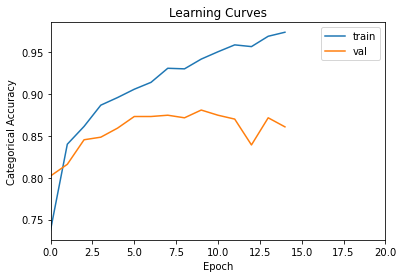

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 19s 206ms/step - loss: 0.5550 - categorical_accuracy: 0.7010 - val_loss: 0.4474 - val_categorical_accuracy: 0.7790
Epoch 2/20
91/91 [==============================] - 19s 205ms/step - loss: 0.3936 - categorical_accuracy: 0.8312 - val_loss: 0.4106 - val_categorical_accuracy: 0.8238
Epoch 3/20
91/91 [==============================] - 19s 209ms/step - loss: 0.3352 - categorical_accuracy: 0.8576 - val_loss: 0.3792 - val_categorical_accuracy: 0.8315
Epoch 4/20
91/91 [==============================] - 19s 213ms/step - loss: 0.3020 - categorical_accuracy: 0.8789 - val_loss: 0.3638 - val_categorical_accuracy: 0.8408
Epoch 5/20
91/91 [==============================] - 20s 220ms/step - loss: 0.2780 - categorical_accuracy: 0.8853 - val_loss: 0.3695 - val_categorical_accuracy: 0.8362
Epoch 6/20
91/91 [==============================] - 23s 248ms/step - loss: 0.2568 - categorical_accuracy: 0.8946 - val_loss: 0.341

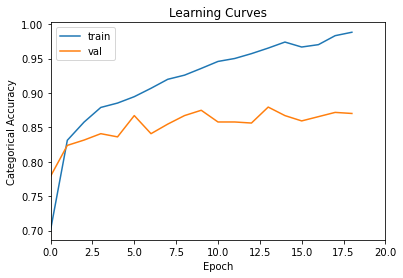

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 20s 218ms/step - loss: 0.5875 - categorical_accuracy: 0.6624 - val_loss: 0.4618 - val_categorical_accuracy: 0.7913
Epoch 2/20
91/91 [==============================] - 23s 258ms/step - loss: 0.4167 - categorical_accuracy: 0.8157 - val_loss: 0.4025 - val_categorical_accuracy: 0.8192
Epoch 3/20
91/91 [==============================] - 21s 231ms/step - loss: 0.3555 - categorical_accuracy: 0.8480 - val_loss: 0.3872 - val_categorical_accuracy: 0.8269
Epoch 4/20
91/91 [==============================] - 19s 207ms/step - loss: 0.2988 - categorical_accuracy: 0.8777 - val_loss: 0.3749 - val_categorical_accuracy: 0.8377
Epoch 5/20
91/91 [==============================] - 19s 208ms/step - loss: 0.2831 - categorical_accuracy: 0.8837 - val_loss: 0.3368 - val_categorical_accuracy: 0.8454
Epoch 6/20
91/91 [==============================] - 19s 209ms/step - loss: 0.2466 - categorical_accuracy: 0.9026 - val_loss: 0.346

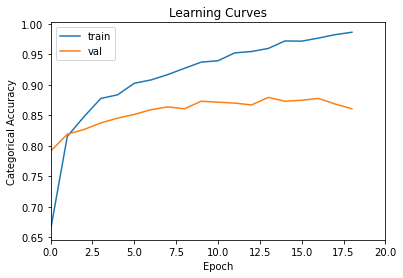

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 22s 242ms/step - loss: 0.6003 - categorical_accuracy: 0.6704 - val_loss: 0.4937 - val_categorical_accuracy: 0.7682
Epoch 2/20
91/91 [==============================] - 22s 237ms/step - loss: 0.4445 - categorical_accuracy: 0.7979 - val_loss: 0.4460 - val_categorical_accuracy: 0.8083
Epoch 3/20
91/91 [==============================] - 22s 237ms/step - loss: 0.3810 - categorical_accuracy: 0.8281 - val_loss: 0.4076 - val_categorical_accuracy: 0.8130
Epoch 4/20
91/91 [==============================] - 20s 221ms/step - loss: 0.3280 - categorical_accuracy: 0.8631 - val_loss: 0.3822 - val_categorical_accuracy: 0.8269
Epoch 5/20
91/91 [==============================] - 19s 211ms/step - loss: 0.3069 - categorical_accuracy: 0.8717 - val_loss: 0.3720 - val_categorical_accuracy: 0.8284
Epoch 6/20
91/91 [==============================] - 19s 210ms/step - loss: 0.2826 - categorical_accuracy: 0.8839 - val_loss: 0.358

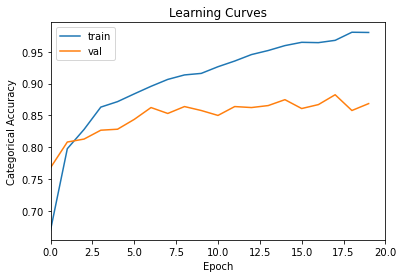

Model accuracy =  0.8794435858726501


In [115]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 2
patience = 5

accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='relu')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='sigmoid')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### Test first model with different batch sizes

In [118]:
#Define parameters (increasing the batchsize)
batch_size = 128
epochs = 20
num_classes = 2
patience = 5

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
46/46 [==============================] - 21s 439ms/step - loss: 0.5683 - categorical_accuracy: 0.7010 - val_loss: 0.4577 - val_categorical_accuracy: 0.7975
Epoch 2/20
46/46 [==============================] - 21s 454ms/step - loss: 0.3982 - categorical_accuracy: 0.8223 - val_loss: 0.4124 - val_categorical_accuracy: 0.8207
Epoch 3/20
46/46 [==============================] - 17s 376ms/step - loss: 0.3582 - categorical_accuracy: 0.8405 - val_loss: 0.3887 - val_categorical_accuracy: 0.8315
Epoch 4/20
46/46 [==============================] - 17s 370ms/step - loss: 0.3249 - categorical_accuracy: 0.8643 - val_loss: 0.3874 - val_categorical_accuracy: 0.8331
Epoch 5/20
46/46 [==============================] - 17s 368ms/step - loss: 0.2865 - categorical_accuracy: 0.8815 - val_loss: 0.3713 - val_categorical_accuracy: 0.8393
Epoch 6/20
46/46 [==============================] - 17s 374ms/step - loss: 0.2647 - categorical_accuracy: 0.8947 - val_loss: 0.362

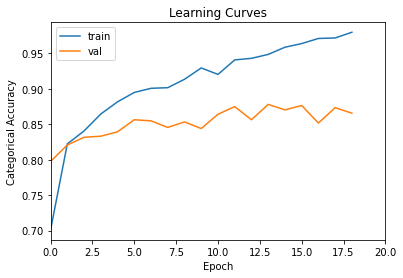

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
46/46 [==============================] - 18s 383ms/step - loss: 0.6310 - categorical_accuracy: 0.6356 - val_loss: 0.5347 - val_categorical_accuracy: 0.7079
Epoch 2/20
46/46 [==============================] - 18s 384ms/step - loss: 0.4587 - categorical_accuracy: 0.7843 - val_loss: 0.4328 - val_categorical_accuracy: 0.8037
Epoch 3/20
46/46 [==============================] - 17s 368ms/step - loss: 0.3615 - categorical_accuracy: 0.8441 - val_loss: 0.3986 - val_categorical_accuracy: 0.8207
Epoch 4/20
46/46 [==============================] - 17s 368ms/step - loss: 0.3208 - categorical_accuracy: 0.8592 - val_loss: 0.3848 - val_categorical_accuracy: 0.8439
Epoch 5/20
46/46 [==============================] - 17s 368ms/step - loss: 0.2942 - categorical_accuracy: 0.8741 - val_loss: 0.3750 - val_categorical_accuracy: 0.8501
Epoch 6/20
46/46 [==============================] - 17s 369ms/step - loss: 0.2599 - categorical_accuracy: 0.8947 - val_loss: 0.343

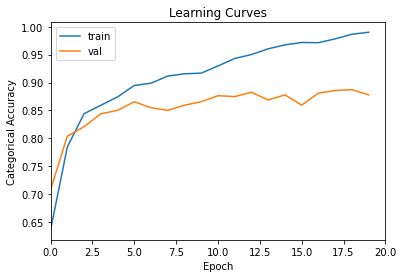

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
46/46 [==============================] - 19s 404ms/step - loss: 0.7220 - categorical_accuracy: 0.5444 - val_loss: 0.6344 - val_categorical_accuracy: 0.6553
Epoch 2/20
46/46 [==============================] - 18s 403ms/step - loss: 0.6012 - categorical_accuracy: 0.6665 - val_loss: 0.5511 - val_categorical_accuracy: 0.7002
Epoch 3/20
46/46 [==============================] - 18s 395ms/step - loss: 0.5138 - categorical_accuracy: 0.7472 - val_loss: 0.4622 - val_categorical_accuracy: 0.7821
Epoch 4/20
46/46 [==============================] - 17s 372ms/step - loss: 0.4307 - categorical_accuracy: 0.8077 - val_loss: 0.4336 - val_categorical_accuracy: 0.8099
Epoch 5/20
46/46 [==============================] - 17s 377ms/step - loss: 0.3740 - categorical_accuracy: 0.8369 - val_loss: 0.4209 - val_categorical_accuracy: 0.8114
Epoch 6/20
46/46 [==============================] - 17s 371ms/step - loss: 0.3441 - categorical_accuracy: 0.8497 - val_loss: 0.390

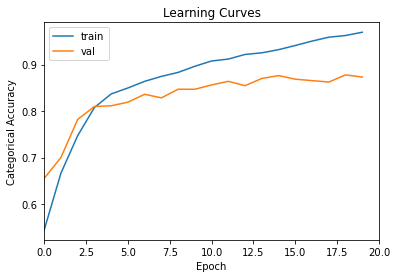

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
46/46 [==============================] - 18s 372ms/step - loss: 0.6069 - categorical_accuracy: 0.6600 - val_loss: 0.5205 - val_categorical_accuracy: 0.7434
Epoch 2/20
46/46 [==============================] - 17s 368ms/step - loss: 0.4400 - categorical_accuracy: 0.8020 - val_loss: 0.4487 - val_categorical_accuracy: 0.7944
Epoch 3/20
46/46 [==============================] - 18s 400ms/step - loss: 0.3644 - categorical_accuracy: 0.8417 - val_loss: 0.4504 - val_categorical_accuracy: 0.8037
Epoch 4/20
46/46 [==============================] - 18s 383ms/step - loss: 0.3342 - categorical_accuracy: 0.8581 - val_loss: 0.4082 - val_categorical_accuracy: 0.8315
Epoch 5/20
46/46 [==============================] - 17s 369ms/step - loss: 0.2878 - categorical_accuracy: 0.8757 - val_loss: 0.3652 - val_categorical_accuracy: 0.8393
Epoch 6/20
46/46 [==============================] - 17s 369ms/step - loss: 0.2677 - categorical_accuracy: 0.8923 - val_loss: 0.393

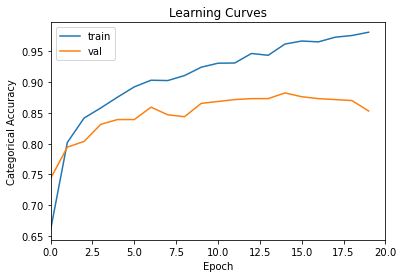

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
46/46 [==============================] - 17s 367ms/step - loss: 0.6123 - categorical_accuracy: 0.6536 - val_loss: 0.5031 - val_categorical_accuracy: 0.7558
Epoch 2/20
46/46 [==============================] - 17s 364ms/step - loss: 0.4390 - categorical_accuracy: 0.7984 - val_loss: 0.4252 - val_categorical_accuracy: 0.8053
Epoch 3/20
46/46 [==============================] - 17s 364ms/step - loss: 0.3851 - categorical_accuracy: 0.8319 - val_loss: 0.4212 - val_categorical_accuracy: 0.8006
Epoch 4/20
46/46 [==============================] - 17s 363ms/step - loss: 0.3459 - categorical_accuracy: 0.8559 - val_loss: 0.3873 - val_categorical_accuracy: 0.8253
Epoch 5/20
46/46 [==============================] - 17s 366ms/step - loss: 0.3113 - categorical_accuracy: 0.8662 - val_loss: 0.3982 - val_categorical_accuracy: 0.8300
Epoch 6/20
46/46 [==============================] - 19s 402ms/step - loss: 0.2923 - categorical_accuracy: 0.8844 - val_loss: 0.387

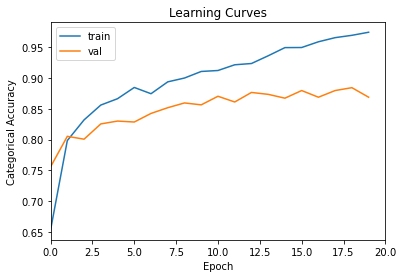

Model accuracy =  0.8778979778289795


In [119]:

accuracy = []
for i in range(5):
        #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    
    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer



    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)


In [120]:
#Define parameters (decreasing the batchsize)
batch_size = 32
epochs = 20
num_classes = 2
patience = 5

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
182/182 [==============================] - 21s 115ms/step - loss: 0.4868 - categorical_accuracy: 0.7606 - val_loss: 0.4210 - val_categorical_accuracy: 0.8161
Epoch 2/20
182/182 [==============================] - 21s 114ms/step - loss: 0.3325 - categorical_accuracy: 0.8592 - val_loss: 0.4141 - val_categorical_accuracy: 0.8145
Epoch 3/20
182/182 [==============================] - 22s 121ms/step - loss: 0.2738 - categorical_accuracy: 0.8885 - val_loss: 0.3693 - val_categorical_accuracy: 0.8516
Epoch 4/20
182/182 [==============================] - 21s 116ms/step - loss: 0.2476 - categorical_accuracy: 0.9006 - val_loss: 0.3292 - val_categorical_accuracy: 0.8624
Epoch 5/20
182/182 [==============================] - 21s 116ms/step - loss: 0.2173 - categorical_accuracy: 0.9112 - val_loss: 0.3338 - val_categorical_accuracy: 0.8655
Epoch 6/20
182/182 [==============================] - 22s 118ms/step - loss: 0.1810 - categorical_accuracy: 0.9311 - val

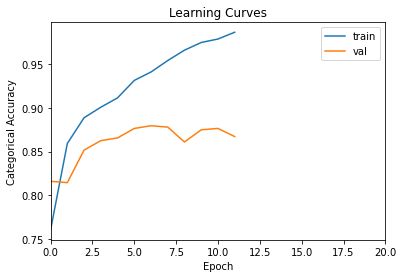

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
182/182 [==============================] - 21s 116ms/step - loss: 0.4947 - categorical_accuracy: 0.7584 - val_loss: 0.3996 - val_categorical_accuracy: 0.8145
Epoch 2/20
182/182 [==============================] - 21s 113ms/step - loss: 0.3575 - categorical_accuracy: 0.8430 - val_loss: 0.3648 - val_categorical_accuracy: 0.8346
Epoch 3/20
182/182 [==============================] - 22s 122ms/step - loss: 0.2940 - categorical_accuracy: 0.8739 - val_loss: 0.3482 - val_categorical_accuracy: 0.8516
Epoch 4/20
182/182 [==============================] - 21s 114ms/step - loss: 0.2530 - categorical_accuracy: 0.8966 - val_loss: 0.3453 - val_categorical_accuracy: 0.8547
Epoch 5/20
182/182 [==============================] - 22s 123ms/step - loss: 0.2259 - categorical_accuracy: 0.9061 - val_loss: 0.3345 - val_categorical_accuracy: 0.8748
Epoch 6/20
182/182 [==============================] - 21s 114ms/step - loss: 0.1948 - categorical_accuracy: 0.9200 - val

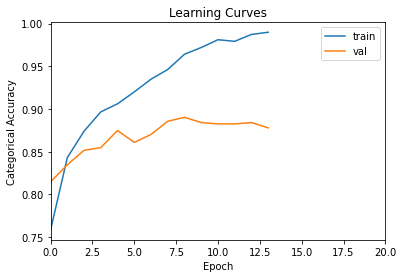

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
182/182 [==============================] - 23s 124ms/step - loss: 0.5261 - categorical_accuracy: 0.7366 - val_loss: 0.4493 - val_categorical_accuracy: 0.7805
Epoch 2/20
182/182 [==============================] - 22s 123ms/step - loss: 0.3816 - categorical_accuracy: 0.8290 - val_loss: 0.3999 - val_categorical_accuracy: 0.8114
Epoch 3/20
182/182 [==============================] - 21s 116ms/step - loss: 0.3203 - categorical_accuracy: 0.8630 - val_loss: 0.3583 - val_categorical_accuracy: 0.8516
Epoch 4/20
182/182 [==============================] - 21s 118ms/step - loss: 0.2707 - categorical_accuracy: 0.8896 - val_loss: 0.3601 - val_categorical_accuracy: 0.8439
Epoch 5/20
182/182 [==============================] - 21s 118ms/step - loss: 0.2440 - categorical_accuracy: 0.8954 - val_loss: 0.3273 - val_categorical_accuracy: 0.8686
Epoch 6/20
182/182 [==============================] - 21s 118ms/step - loss: 0.2092 - categorical_accuracy: 0.9164 - val

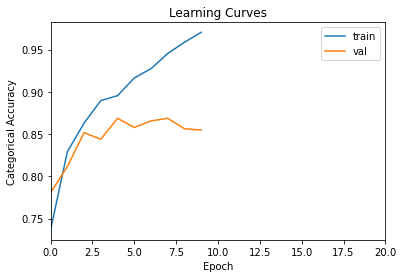

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
182/182 [==============================] - 24s 132ms/step - loss: 0.5515 - categorical_accuracy: 0.7089 - val_loss: 0.4330 - val_categorical_accuracy: 0.8037
Epoch 2/20
182/182 [==============================] - 24s 134ms/step - loss: 0.3740 - categorical_accuracy: 0.8324 - val_loss: 0.3907 - val_categorical_accuracy: 0.8130
Epoch 3/20
182/182 [==============================] - 23s 126ms/step - loss: 0.3106 - categorical_accuracy: 0.8674 - val_loss: 0.4017 - val_categorical_accuracy: 0.8223
Epoch 4/20
182/182 [==============================] - 23s 127ms/step - loss: 0.2772 - categorical_accuracy: 0.8817 - val_loss: 0.3508 - val_categorical_accuracy: 0.8624
Epoch 5/20
182/182 [==============================] - 22s 121ms/step - loss: 0.2410 - categorical_accuracy: 0.9054 - val_loss: 0.3432 - val_categorical_accuracy: 0.8609
Epoch 6/20
182/182 [==============================] - 23s 127ms/step - loss: 0.2137 - categorical_accuracy: 0.9133 - val

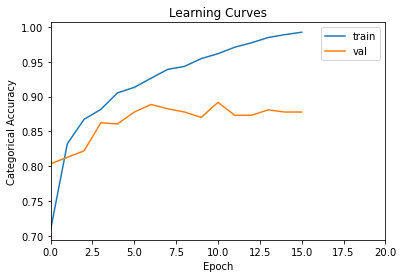

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
182/182 [==============================] - 22s 117ms/step - loss: 0.5525 - categorical_accuracy: 0.7108 - val_loss: 0.4265 - val_categorical_accuracy: 0.8006
Epoch 2/20
182/182 [==============================] - 21s 115ms/step - loss: 0.3840 - categorical_accuracy: 0.8339 - val_loss: 0.3750 - val_categorical_accuracy: 0.8284
Epoch 3/20
182/182 [==============================] - 22s 121ms/step - loss: 0.3151 - categorical_accuracy: 0.8640 - val_loss: 0.3459 - val_categorical_accuracy: 0.8594
Epoch 4/20
182/182 [==============================] - 27s 146ms/step - loss: 0.2772 - categorical_accuracy: 0.8827 - val_loss: 0.3443 - val_categorical_accuracy: 0.8470
Epoch 5/20
182/182 [==============================] - 23s 126ms/step - loss: 0.2455 - categorical_accuracy: 0.8971 - val_loss: 0.3556 - val_categorical_accuracy: 0.8563
Epoch 6/20
182/182 [==============================] - 21s 118ms/step - loss: 0.2130 - categorical_accuracy: 0.9136 - val

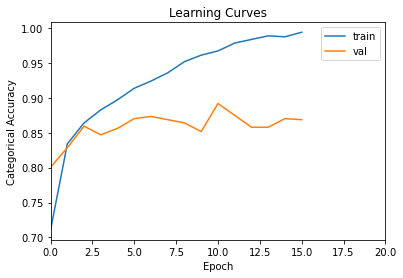

Model accuracy =  0.8902627229690552


In [121]:




accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    
    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer
    
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])


    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### Average Pooling

In [122]:
#Define parameters
batch_size = 64
epochs = 20
num_classes = 2
patience = 5

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 17s 183ms/step - loss: 0.6100 - categorical_accuracy: 0.6624 - val_loss: 0.5026 - val_categorical_accuracy: 0.7682
Epoch 2/20
91/91 [==============================] - 17s 183ms/step - loss: 0.4315 - categorical_accuracy: 0.8085 - val_loss: 0.4109 - val_categorical_accuracy: 0.8145
Epoch 3/20
91/91 [==============================] - 17s 186ms/step - loss: 0.3736 - categorical_accuracy: 0.8348 - val_loss: 0.3797 - val_categorical_accuracy: 0.8362
Epoch 4/20
91/91 [==============================] - 18s 194ms/step - loss: 0.3421 - categorical_accuracy: 0.8508 - val_loss: 0.4178 - val_categorical_accuracy: 0.8238
Epoch 5/20
91/91 [==============================] - 19s 209ms/step - loss: 0.3245 - categorical_accuracy: 0.8590 - val_loss: 0.3453 - val_categorical_accuracy: 0.8454
Epoch 6/20
91/91 [==============================] - 19s 212ms/step - loss: 0.2904 - categorical_accuracy: 0.8786 - val_loss: 0.381

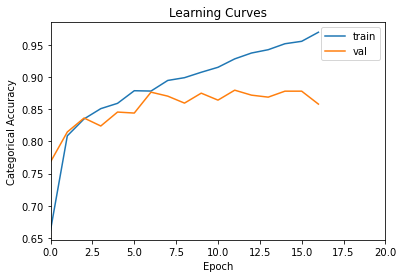

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 18s 195ms/step - loss: 0.6048 - categorical_accuracy: 0.6668 - val_loss: 0.4750 - val_categorical_accuracy: 0.7913
Epoch 2/20
91/91 [==============================] - 17s 182ms/step - loss: 0.4096 - categorical_accuracy: 0.8204 - val_loss: 0.4206 - val_categorical_accuracy: 0.8022
Epoch 3/20
91/91 [==============================] - 17s 187ms/step - loss: 0.3580 - categorical_accuracy: 0.8453 - val_loss: 0.4014 - val_categorical_accuracy: 0.8192
Epoch 4/20
91/91 [==============================] - 17s 184ms/step - loss: 0.3480 - categorical_accuracy: 0.8502 - val_loss: 0.3836 - val_categorical_accuracy: 0.8362
Epoch 5/20
91/91 [==============================] - 17s 184ms/step - loss: 0.3207 - categorical_accuracy: 0.8655 - val_loss: 0.3715 - val_categorical_accuracy: 0.8516
Epoch 6/20
91/91 [==============================] - 17s 183ms/step - loss: 0.2955 - categorical_accuracy: 0.8772 - val_loss: 0.394

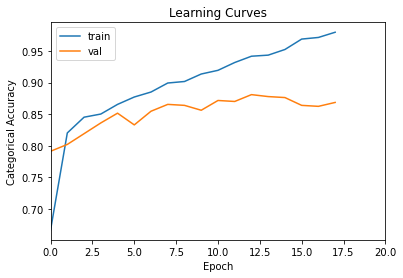

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 18s 187ms/step - loss: 0.5956 - categorical_accuracy: 0.6607 - val_loss: 0.4955 - val_categorical_accuracy: 0.7589
Epoch 2/20
91/91 [==============================] - 18s 195ms/step - loss: 0.4315 - categorical_accuracy: 0.8047 - val_loss: 0.4212 - val_categorical_accuracy: 0.8161
Epoch 3/20
91/91 [==============================] - 19s 213ms/step - loss: 0.3762 - categorical_accuracy: 0.8367 - val_loss: 0.3914 - val_categorical_accuracy: 0.8207
Epoch 4/20
91/91 [==============================] - 19s 212ms/step - loss: 0.3433 - categorical_accuracy: 0.8506 - val_loss: 0.3903 - val_categorical_accuracy: 0.8393
Epoch 5/20
91/91 [==============================] - 19s 204ms/step - loss: 0.3095 - categorical_accuracy: 0.8673 - val_loss: 0.3556 - val_categorical_accuracy: 0.8470
Epoch 6/20
91/91 [==============================] - 17s 192ms/step - loss: 0.2949 - categorical_accuracy: 0.8752 - val_loss: 0.377

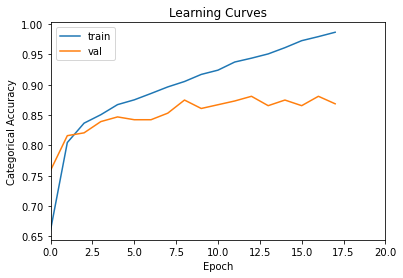

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 18s 196ms/step - loss: 0.6079 - categorical_accuracy: 0.6649 - val_loss: 0.5170 - val_categorical_accuracy: 0.7604
Epoch 2/20
91/91 [==============================] - 17s 187ms/step - loss: 0.4282 - categorical_accuracy: 0.8113 - val_loss: 0.4247 - val_categorical_accuracy: 0.8145
Epoch 3/20
91/91 [==============================] - 19s 209ms/step - loss: 0.3800 - categorical_accuracy: 0.8374 - val_loss: 0.4287 - val_categorical_accuracy: 0.8223
Epoch 4/20
91/91 [==============================] - 18s 194ms/step - loss: 0.3438 - categorical_accuracy: 0.8547 - val_loss: 0.3932 - val_categorical_accuracy: 0.8300
Epoch 5/20
91/91 [==============================] - 17s 192ms/step - loss: 0.3323 - categorical_accuracy: 0.8569 - val_loss: 0.3505 - val_categorical_accuracy: 0.8470
Epoch 6/20
91/91 [==============================] - 18s 196ms/step - loss: 0.2963 - categorical_accuracy: 0.8752 - val_loss: 0.363

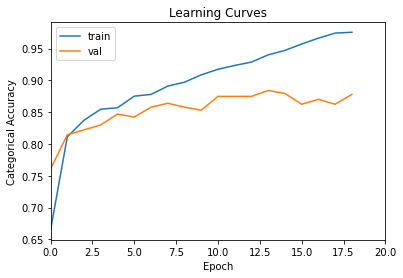

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 18s 195ms/step - loss: 0.5790 - categorical_accuracy: 0.6842 - val_loss: 0.5248 - val_categorical_accuracy: 0.7249
Epoch 2/20
91/91 [==============================] - 17s 187ms/step - loss: 0.4032 - categorical_accuracy: 0.8236 - val_loss: 0.4557 - val_categorical_accuracy: 0.8130
Epoch 3/20
91/91 [==============================] - 18s 193ms/step - loss: 0.3542 - categorical_accuracy: 0.8437 - val_loss: 0.3864 - val_categorical_accuracy: 0.8269
Epoch 4/20
91/91 [==============================] - 18s 195ms/step - loss: 0.3343 - categorical_accuracy: 0.8532 - val_loss: 0.3558 - val_categorical_accuracy: 0.8439
Epoch 5/20
91/91 [==============================] - 18s 194ms/step - loss: 0.2994 - categorical_accuracy: 0.8753 - val_loss: 0.3547 - val_categorical_accuracy: 0.8423
Epoch 6/20
91/91 [==============================] - 18s 194ms/step - loss: 0.2865 - categorical_accuracy: 0.8788 - val_loss: 0.337

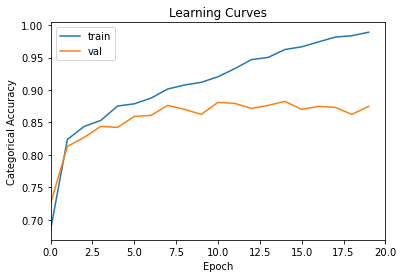

Model accuracy =  0.8809891939163208


In [123]:


accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    
    model.add(AveragePooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
                

    model.add(AveragePooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer



    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

### Test Dropout

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 22s 236ms/step - loss: 0.7275 - categorical_accuracy: 0.6012 - val_loss: 0.6235 - val_categorical_accuracy: 0.6182
Epoch 2/20
91/91 [==============================] - 21s 227ms/step - loss: 0.5870 - categorical_accuracy: 0.6761 - val_loss: 0.5723 - val_categorical_accuracy: 0.6708
Epoch 3/20
91/91 [==============================] - 21s 227ms/step - loss: 0.4971 - categorical_accuracy: 0.7597 - val_loss: 0.4690 - val_categorical_accuracy: 0.7883
Epoch 4/20
91/91 [==============================] - 21s 227ms/step - loss: 0.4293 - categorical_accuracy: 0.8037 - val_loss: 0.4380 - val_categorical_accuracy: 0.7975
Epoch 5/20
91/91 [==============================] - 21s 227ms/step - loss: 0.4072 - categorical_accuracy: 0.8133 - val_loss: 0.4859 - val_categorical_accuracy: 0.7558
Epoch 6/20
91/91 [==============================] - 21s 228ms/step - loss: 0.3755 - categorical_accuracy: 0.8357 - val_loss: 0.428

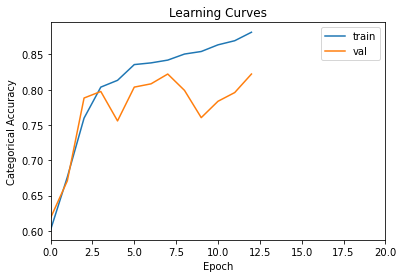

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 21s 226ms/step - loss: 0.7331 - categorical_accuracy: 0.5904 - val_loss: 0.6325 - val_categorical_accuracy: 0.6600
Epoch 2/20
91/91 [==============================] - 20s 223ms/step - loss: 0.5881 - categorical_accuracy: 0.6704 - val_loss: 0.5787 - val_categorical_accuracy: 0.7002
Epoch 3/20
91/91 [==============================] - 20s 223ms/step - loss: 0.5207 - categorical_accuracy: 0.7443 - val_loss: 0.5128 - val_categorical_accuracy: 0.7543
Epoch 4/20
91/91 [==============================] - 20s 223ms/step - loss: 0.4532 - categorical_accuracy: 0.7884 - val_loss: 0.4514 - val_categorical_accuracy: 0.7883
Epoch 5/20
91/91 [==============================] - 20s 223ms/step - loss: 0.4222 - categorical_accuracy: 0.8015 - val_loss: 0.4262 - val_categorical_accuracy: 0.8130
Epoch 6/20
91/91 [==============================] - 22s 242ms/step - loss: 0.3968 - categorical_accuracy: 0.8216 - val_loss: 0.464

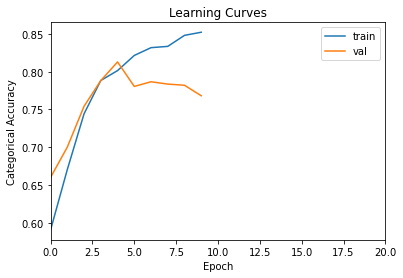

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 21s 227ms/step - loss: 0.6365 - categorical_accuracy: 0.6570 - val_loss: 0.5959 - val_categorical_accuracy: 0.6352
Epoch 2/20
91/91 [==============================] - 21s 228ms/step - loss: 0.5228 - categorical_accuracy: 0.7366 - val_loss: 0.5184 - val_categorical_accuracy: 0.7512
Epoch 3/20
91/91 [==============================] - 21s 225ms/step - loss: 0.4396 - categorical_accuracy: 0.7919 - val_loss: 0.4795 - val_categorical_accuracy: 0.7929
Epoch 4/20
91/91 [==============================] - 24s 259ms/step - loss: 0.4088 - categorical_accuracy: 0.8166 - val_loss: 0.4703 - val_categorical_accuracy: 0.7805
Epoch 5/20
91/91 [==============================] - 25s 272ms/step - loss: 0.3853 - categorical_accuracy: 0.8291 - val_loss: 0.4531 - val_categorical_accuracy: 0.7898
Epoch 6/20
91/91 [==============================] - 21s 228ms/step - loss: 0.3581 - categorical_accuracy: 0.8405 - val_loss: 0.433

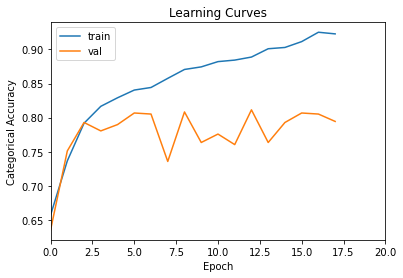

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 21s 229ms/step - loss: 0.6218 - categorical_accuracy: 0.6546 - val_loss: 0.6162 - val_categorical_accuracy: 0.6631
Epoch 2/20
91/91 [==============================] - 22s 244ms/step - loss: 0.5170 - categorical_accuracy: 0.7390 - val_loss: 0.5107 - val_categorical_accuracy: 0.7790
Epoch 3/20
91/91 [==============================] - 21s 228ms/step - loss: 0.4407 - categorical_accuracy: 0.7970 - val_loss: 0.4454 - val_categorical_accuracy: 0.7929
Epoch 4/20
91/91 [==============================] - 21s 228ms/step - loss: 0.3994 - categorical_accuracy: 0.8174 - val_loss: 0.4562 - val_categorical_accuracy: 0.7805
Epoch 5/20
91/91 [==============================] - 21s 231ms/step - loss: 0.3733 - categorical_accuracy: 0.8338 - val_loss: 0.4860 - val_categorical_accuracy: 0.7527
Epoch 6/20
91/91 [==============================] - 21s 229ms/step - loss: 0.3564 - categorical_accuracy: 0.8411 - val_loss: 0.464

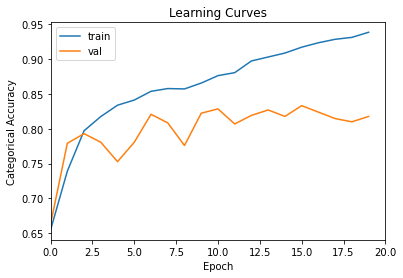

(5823, 50, 50, 1)
(647, 50, 50, 1)
Epoch 1/20
91/91 [==============================] - 23s 245ms/step - loss: 0.6606 - categorical_accuracy: 0.6330 - val_loss: 0.6327 - val_categorical_accuracy: 0.6770
Epoch 2/20
91/91 [==============================] - 20s 225ms/step - loss: 0.5415 - categorical_accuracy: 0.7230 - val_loss: 0.5753 - val_categorical_accuracy: 0.7295
Epoch 3/20
91/91 [==============================] - 21s 233ms/step - loss: 0.4758 - categorical_accuracy: 0.7735 - val_loss: 0.5163 - val_categorical_accuracy: 0.7790
Epoch 4/20
91/91 [==============================] - 21s 233ms/step - loss: 0.4264 - categorical_accuracy: 0.8061 - val_loss: 0.4598 - val_categorical_accuracy: 0.8176
Epoch 5/20
91/91 [==============================] - 21s 228ms/step - loss: 0.3957 - categorical_accuracy: 0.8223 - val_loss: 0.4645 - val_categorical_accuracy: 0.8053
Epoch 6/20
91/91 [==============================] - 21s 227ms/step - loss: 0.3775 - categorical_accuracy: 0.8278 - val_loss: 0.512

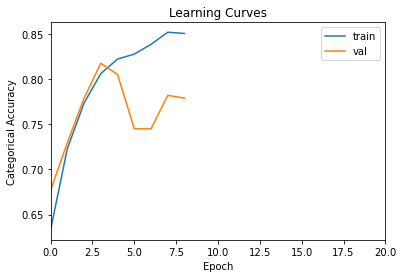

Model accuracy =  0.817619800567627


In [125]:
batch_size = 64
epochs = 20
num_classes = 2
patience = 5


accuracy = []
for i in range(5):
    #Define model
    model = Sequential()
    model.add(Dropout(0.3))
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer
    model.add(Dropout(0.3))
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear')) #Fully connected layer
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax')) #Output layer

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

    
    acc = model_CNN(model, epochs, batch_size, patience)
    accuracy.append(acc)

accuracy = np.median(accuracy)
print("Model accuracy = ", accuracy)

## 3) K-means Clustering <a name="Kmeans"></a>

In [127]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler

In [128]:
def kmeans_model(x_training_set, y_training_set):
    
    # Normalize the dataset
    X_train_n = X_train / 255.0

    # Cross-validation:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(x_training_set)
    
    
    kmeans = KMeans(
        init="random",
        n_clusters=2,
        n_init=10,
        max_iter=400,
        random_state=42
   )
    kmeans.fit(scaled_data)
            
    # Calculate accuracy
    acc = balanced_accuracy_score(y_training_set, kmeans.labels_)
    
    print(acc)

In [129]:
kmeans_model(X_train, Y_train)

0.5276243748944314


## Creating preditions using the best model

In [130]:
# Load the training set and the test set ---------------------------------------------------------
X_train = np.load("Xtrain_Classification_Part1.npy")
Y_train = np.load("Ytrain_Classification_Part1.npy")
X_test = np.load("Xtest_Classification_Part1.npy")

#Reshape data
X_train_CNN = X_train.reshape(-1, 50, 50, 1)
X_test_CNN = X_test.reshape(-1, 50, 50, 1)
print('X_train shape: ',X_train_CNN.shape)
print('X_test shape: ',X_test_CNN.shape)

X_train = X_train_CNN.astype('float32')
X_test = X_test_CNN.astype('float32')
X_train = X_train_CNN / 255.
X_test = X_test_CNN / 255.

# Change Y format to one-hot-encoding
y_train = onehotencoding(Y_train)


#Define parameters -----------------------------------------------------------------------------
batch_size = 64
epochs = 11
num_classes = 2

#Define model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same')) #Convolution layer
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same')) #Pooling layer

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear')) #Fully connected layer
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax')) #Output layer

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

# Train the model-------------------------------------------------------------------------------------------------
train = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=2)


# Classify the testing Set ----------------------------------------------------------------------------------------
predictions = model.predict(X_test)

# Find the class with maximum probability
y_test = []

for i in range(len(predictions)):
    y_test.append(np.argmax(predictions[i]))


np.save('y_test.npy', y_test)
print(np.shape(y_test))

X_train shape:  (6470, 50, 50, 1)
X_test shape:  (1164, 50, 50, 1)
Epoch 1/11
102/102 - 20s - loss: 0.6059 - categorical_accuracy: 0.6626
Epoch 2/11
102/102 - 19s - loss: 0.4382 - categorical_accuracy: 0.8034
Epoch 3/11
102/102 - 19s - loss: 0.3496 - categorical_accuracy: 0.8560
Epoch 4/11
102/102 - 19s - loss: 0.3139 - categorical_accuracy: 0.8658
Epoch 5/11
102/102 - 19s - loss: 0.2758 - categorical_accuracy: 0.8864
Epoch 6/11
102/102 - 19s - loss: 0.2399 - categorical_accuracy: 0.8975
Epoch 7/11
102/102 - 19s - loss: 0.2168 - categorical_accuracy: 0.9156
Epoch 8/11
102/102 - 19s - loss: 0.1961 - categorical_accuracy: 0.9229
Epoch 9/11
102/102 - 19s - loss: 0.1720 - categorical_accuracy: 0.9321
Epoch 10/11
102/102 - 19s - loss: 0.1497 - categorical_accuracy: 0.9440
Epoch 11/11
102/102 - 19s - loss: 0.1223 - categorical_accuracy: 0.9549
(1164,)
